In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 24 12:11:19 2023


Final Project Magnetospheres

@author: jmcle
"""

# import directories
import scipy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits import mplot3d
from scipy.optimize import fsolve, brentq, root
import pyspedas
from pytplot import tplot
#----------------------------------------------------------------------------#

In [3]:
import pickle
from pytplot import get_data
timerange = ['2016-05-15','2016-05-22']
timerange2= ['2016-01-01', '2016-02-01']
timerange3= ['2015-11-01','2016-01-02']
tr = timerange3
v=1

# #PSD
# #pyspedas.mms.dsp(probe=1, trange=timerange3, datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)
# pyspedas.mms.dsp(probe=1, trange=timerange3,varnames = ['mms1_dsp_bpsd_omni_fast_l2','mms1_dsp_epsd_omni'], datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)

# #metadata = get_data('mms1_dsp_bpsd_omni_fast_l2',metadata=True)
# dataB = get_data('mms1_dsp_bpsd_omni_fast_l2')
# dataBpsd = dataB[1]
# dataBtimes = dataB[0]
# data = get_data('mms1_dsp_epsd_omni')
# datapsd = data[1]
# datatimes = data[0]
# with open( 'dataPSD3' + '.pickle', 'wb') as handle:
#     pickle.dump([datapsd,datatimes,dataBpsd,dataBtimes], handle,
#                 protocol=pickle.HIGHEST_PROTOCOL)

# #positions:
# pyspedas.mms.mec(trange=timerange3, probe=1)
# datapos = get_data('mms1_mec_r_sm')
# positions = datapos.y
# distances = r(positions[:,0],positions[:,1],positions[:,2])

# # distance in data is in km
# distances = np.array(distances)
# #azimuthalangles = np.array(azs)

# positions = datapos[1]
# posx=positions[:,0]
# posy=positions[:,1]
# posz=positions[:,2]
# postime = datapos[0]


# # Write the dictionary with inversion data to a pickle file
# with open( 'dataposition3' + '.pickle', 'wb') as handle:
#     pickle.dump([posx,posy,posz,postime,distances], handle,
#                 protocol=pickle.HIGHEST_PROTOCOL)
    

        
#Bfield
pyspedas.mms.fgm(trange=timerange3, varnames = 'mms1_fgm_b_gse_srvy_l2' ,data_rate='srvy', probe=1, time_clip=True)
dataBfield = get_data('mms1_fgm_b_gse_srvy_l2')

Bdist = dataBfield.y[:,3]
times = dataBfield.times
Bdist = np.array(Bdist)
omega_e = 28*Bdist


with open( 'dataBfield3' + '.pickle', 'wb') as handle:
    pickle.dump([Bdist,omega_e,times], handle,
                protocol=pickle.HIGHEST_PROTOCOL)

# pyspedas.mms.fpi(center_measurement=True, 
#                  datatype=['dis-moms', 'des-moms'], 
#                  trange=timerange3,
#                  varnames=['mms1_des_numberdensity_fast','mms1_dis_numberdensity_fast'],
#                  probe=1)
# edensitydata = get_data('mms1_des_numberdensity_fast')
# edensity = edensitydata.y

# idensitydata = get_data('mms1_dis_numberdensity_fast')
# idensity = idensitydata.y
# # print(len(edensity))
# # print(min(edensity),max(edensity))
# # tlimit(['2015-11-01','2016-01-02'])
# # tplot(['mms1_des_numberdensity_fast']) 
# # plt.figure()
# # plt.plot(edensitydata.times,edensitydata.y)
# edensitytimes = edensitydata.times


# with open( 'dataDensity3' + '.pickle', 'wb') as handle:
#     pickle.dump([edensity,edensitytimes], handle,
#                 protocol=pickle.HIGHEST_PROTOCOL)
print('Done loading in data')

01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151101_v4.18.0.cdf
01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151102_v4.18.0.cdf
01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151103_v4.18.0.cdf
01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151104_v4.18.0.cdf
01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151105_v4.18.0.cdf
01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151106_v4.18.0.cdf
01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151107_v4.18.0.cdf
01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151108_v4.18.0.cdf
01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151109_v4.18.0.cdf
01-May-23 11:09:47: Loading pydata\mms1\fgm\srvy\l2\2015\11\mms1_fgm_srvy_l2_20151110_v4.18.0.cdf
01-May-23 11:09:47: 

MemoryError: Unable to allocate 778. MiB for an array with shape (50986567, 4) and data type float32

In [356]:

from pytplot import get_data
timerange = ['2016-05-15','2016-05-22']
timerange2= ['2016-01-01', '2016-02-01']
timerange3= ['2015-11-01','2016-01-02']
tr = timerange3
v=1

# #PSD
# #pyspedas.mms.dsp(probe=1, trange=timerange3, datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)
# pyspedas.mms.dsp(probe=1, trange=timerange3,varnames = ['mms1_dsp_bpsd_omni_fast_l2','mms1_dsp_epsd_omni'], datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)

# #metadata = get_data('mms1_dsp_bpsd_omni_fast_l2',metadata=True)
# dataB = get_data('mms1_dsp_bpsd_omni_fast_l2')
# dataBpsd = dataB[1]
# dataBtimes = dataB[0]
# data = get_data('mms1_dsp_epsd_omni')
# datapsd = data[1]
# datatimes = data[0]
# with open( 'dataPSD3' + '.pickle', 'wb') as handle:
#     pickle.dump([datapsd,datatimes,dataBpsd,dataBtimes], handle,
#                 protocol=pickle.HIGHEST_PROTOCOL)

# #positions:
# pyspedas.mms.mec(trange=timerange3, probe=1)
# datapos = get_data('mms1_mec_r_sm')
# positions = datapos.y
# distances = r(positions[:,0],positions[:,1],positions[:,2])

# # distance in data is in km
# distances = np.array(distances)
# #azimuthalangles = np.array(azs)

# positions = datapos[1]
# posx=positions[:,0]
# posy=positions[:,1]
# posz=positions[:,2]
# postime = datapos[0]


# # Write the dictionary with inversion data to a pickle file
# with open( 'dataposition3' + '.pickle', 'wb') as handle:
#     pickle.dump([posx,posy,posz,postime,distances], handle,
#                 protocol=pickle.HIGHEST_PROTOCOL)
    

        
#Bfield
pyspedas.mms.fgm(trange=timerange3, varnames = 'mms1_fgm_b_gse_srvy_l2' ,data_rate='srvy', probe=1, time_clip=True)
dataBfield = get_data('mms1_fgm_b_gse_srvy_l2')

Bdist = dataBfield.y[:,3]
times = dataBfield.times
Bdist = np.array(Bdist)
omega_e = 28*Bdist


with open( 'dataBfield3' + '.pickle', 'wb') as handle:
    pickle.dump([Bdist,omega_e,times], handle,
                protocol=pickle.HIGHEST_PROTOCOL)

# pyspedas.mms.fpi(center_measurement=True, 
#                  datatype=['dis-moms', 'des-moms'], 
#                  trange=timerange3,
#                  varnames=['mms1_des_numberdensity_fast','mms1_dis_numberdensity_fast'],
#                  probe=1)
# edensitydata = get_data('mms1_des_numberdensity_fast')
# edensity = edensitydata.y

# idensitydata = get_data('mms1_dis_numberdensity_fast')
# idensity = idensitydata.y
# # print(len(edensity))
# # print(min(edensity),max(edensity))
# # tlimit(['2015-11-01','2016-01-02'])
# # tplot(['mms1_des_numberdensity_fast']) 
# # plt.figure()
# # plt.plot(edensitydata.times,edensitydata.y)
# edensitytimes = edensitydata.times


# with open( 'dataDensity3' + '.pickle', 'wb') as handle:
#     pickle.dump([edensity,edensitytimes], handle,
#                 protocol=pickle.HIGHEST_PROTOCOL)
print('Done loading in data')
# ###################################
bintime = 10*60 #secs
i=1
# initialsec = timeslice[0]
# maxtime = timeslice[-1]
maxtime = times[-1]
initialsec = times[0]
multiples = int(round((maxtime-initialsec)/bintime))
print(multiples)
lenindex = len(times)
indexblock = int(round(lenindex/multiples))
print(type(indexblock))
binned_omega = []
binned_times = []
for i in np.arange(multiples):
    if i==0:
        avgomega = np.average(omega_e[0:((i+1)*indexblock)])
        avgtime = np.average(times[0:(i+1)*indexblock])
    else:
        avgomega = np.average(omega_e[i*indexblock:(i+1)*indexblock])
        avgtime = np.average(times[i*indexblock:(i+1)*indexblock])
    binned_omega.append(avgomega)
    binned_times.append(avgtime)
    
# plt.figure()
# plt.plot(binned_times,binned_omega)
# plt.plot(times,omega_e)
# plt.xlim([times[0],times[int(len(times)/30)]])
print('Done smoothing omega e')
######################
# times in omega array that overlap with times in psd:
timeslice = []
omegaslice = []
for i in np.arange(len(binned_times)):
    tdiffi = binned_times[i]-datatimes[0]
    tdifff = binned_times[i]-datatimes[-1]
    if tdiffi >=0 and tdifff<=0:
        timeslice.append(binned_times[i])
        omegaslice.append(binned_omega[i])
print('Done slicing omega e')
###################
densitythresh = 30 #cm^-3
################################################### smooth density curve
bintime = 10*60 #secs
i=1
# initialsec = timeslice[0]
# maxtime = timeslice[-1]
edentimes = edensitydata.times
maxtime = edentimes[-1]
initialsec = edentimes[0]
multiples = int(round((maxtime-initialsec)/bintime))
#print(multiples)
lenindex = len(edentimes)
indexblock = int(round(lenindex/multiples))
#print(type(indexblock))
binned_eden = []
binned_edentimes = []
for i in np.arange(multiples):
    if i==0:
        avgeden = np.average(edensity[0:((i+1)*indexblock)])
        avgtimeeden = np.average(edentimes[0:(i+1)*indexblock])
    else:
        avgeden = np.average(edensity[i*indexblock:(i+1)*indexblock])
        avgtimeeden = np.average(edentimes[i*indexblock:(i+1)*indexblock])
    binned_eden.append(avgeden)
    binned_edentimes.append(avgtimeeden)
    
# plt.figure(figsize = (10,6),dpi=100)
# plt.plot(edentimes,edensity)
# plt.plot(binned_edentimes,binned_eden)
# plt.plot(binned_edentimes,np.zeros(len(binned_edentimes))+densitythresh,'-')
# plt.legend(['data','fit','plasmasphere threshold'])
# v=1
# tr = timerange2
# plotfilename = "density_"+str(tr[0])+'_'+str(tr[1])+'_v'+str(v)+'.jpg'
# plt.savefig(plotfilename,bbox_inches='tight')

binned_eden =np.array(binned_eden)
thresharray = [densitythresh]
identhresh = findclosest(thresharray,binned_eden,0)
# print(identhresh)
# print(time_string(binned_edentimes[identhresh[0][0]]))
#plt.plot(binned_edentimes[identhresh[0][0]],binned_eden[identhresh[0][0]],'.')
dendiff = binned_eden-densitythresh
print('Done smoothing denisty')
###########################################################
#data: [0,:] - x axis values - time
#[1,:] - power value (color bar)
#[2,:] - y axis values - frequency (Hz)

print('Begin selecting chorus')
power_column_avged_array = []
powerarray = []
kepttimes=[]
for i in np.arange(len(datatimes)):
    denti  = findclosest(datatimes,binned_edentimes,i)
    dentii = denti[0][0]
    if dendiff[dentii]<=0:
        kepttimes.append(datatimes[i])
        
        avg_omega_index = findclosest(datatimes,timeslice,i)
        #print(avg_omega_index[0][0])
        avg_omega_e = omegaslice[avg_omega_index[0][0]]
        #print(avg_omega_e)
        powerarray = []
        for j in np.arange(len(data[2])):
            if data[2][j] > .1*avg_omega_e and data[2][j] <1*avg_omega_e:
                #print('averaging: '+str(data.times[i])+' at '+str(data[2][j]))
                power = data[1][i][j]
                powerarray.append(power)
            powerarray2 = np.array(powerarray)
        power_column_avged = np.mean(powerarray2)
            
        power_column_avged_array.append(power_column_avged)
        #print('for i: '+str(i)+' avg psd: '+str(power_column_avged))
        if i == 0:
            print('Starting...')
        elif i==np.round(len(data[0])/4):
            print('Quarter way...')
        elif i==np.round(len(data[0])/2):
            print('Half way...')
        elif i==np.round(3*len(data[0])/4):
            print('3/4 done.......')
        elif i == np.round(len(data[0]-1)):
            print('Finished')

powertimes = data.times
powertimes = time_string(data.times)
power_column_avged_array = np.array(power_column_avged_array)

# plt.figure(figsize=(8, 6), dpi=80)

# #plt.plot(powertimes,power_column_avged_array)
# plt.plot(kepttimes,power_column_avged_array)

# plt.figure(figsize=(8, 6), dpi=80)

# #plt.plot(powertimes,power_column_avged_array)
# plt.plot(time_string(kepttimes),power_column_avged_array)


01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\epsd\2015\11\mms1_dsp_fast_l2_epsd_20151101_v0.6.3.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\epsd\2015\11\mms1_dsp_fast_l2_epsd_20151102_v0.6.3.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\epsd\2015\11\mms1_dsp_fast_l2_epsd_20151103_v0.6.3.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\epsd\2015\11\mms1_dsp_fast_l2_epsd_20151104_v0.6.7.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\epsd\2015\11\mms1_dsp_fast_l2_epsd_20151105_v0.6.5.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\epsd\2015\11\mms1_dsp_fast_l2_epsd_20151106_v0.6.4.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\epsd\2015\11\mms1_dsp_fast_l2_epsd_20151107_v0.6.4.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\epsd\2015\11\mms1_dsp_fast_l2_epsd_20151108_v0.6.3.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\epsd\2015\11\mms1_dsp_fast_l2_epsd_20151109_v0.6.3.cdf
01-May-23 09:54:53: Loading pydata\mm

01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\bpsd\2015\11\mms1_dsp_fast_l2_bpsd_20151116_v2.1.1.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\bpsd\2015\11\mms1_dsp_fast_l2_bpsd_20151117_v2.1.1.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\bpsd\2015\11\mms1_dsp_fast_l2_bpsd_20151118_v2.1.1.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\bpsd\2015\11\mms1_dsp_fast_l2_bpsd_20151119_v2.1.1.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\bpsd\2015\11\mms1_dsp_fast_l2_bpsd_20151120_v2.1.1.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\bpsd\2015\11\mms1_dsp_fast_l2_bpsd_20151121_v2.1.1.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\bpsd\2015\11\mms1_dsp_fast_l2_bpsd_20151122_v2.1.1.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\bpsd\2015\11\mms1_dsp_fast_l2_bpsd_20151123_v2.1.1.cdf
01-May-23 09:54:53: Loading pydata\mms1\dsp\fast\l2\bpsd\2015\11\mms1_dsp_fast_l2_bpsd_20151124_v2.1.1.cdf
01-May-23 09:54:53: Loading pydata\mm

01-May-23 10:04:23: Downloading mms1_fgm_srvy_l2_20151129_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2015\11
01-May-23 10:04:43: Downloading mms1_fgm_srvy_l2_20151130_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2015\11
01-May-23 10:05:11: Downloading mms1_fgm_srvy_l2_20151201_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2015\12
01-May-23 10:05:50: Downloading mms1_fgm_srvy_l2_20151202_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2015\12
01-May-23 10:06:22: Downloading mms1_fgm_srvy_l2_20151203_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2015\12
01-May-23 10:06:55: Downloading mms1_fgm_srvy_l2_20151204_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2015\12
01-May-23 10:07:37: Downloading mms1_fgm_srvy_l2_20151205_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2015\12
01-May-23 10:08:11: Downloading mms1_fgm_srvy_l2_20151206_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2015\12
01-May-23 10:08:29: Downloading mms1_fgm_srvy_l2_20151207_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2015\12
01-May-23 10:08:47: Downloading mms1_fgm_srvy_l2_201512

MemoryError: Unable to allocate 778. MiB for an array with shape (50986567, 4) and data type float32

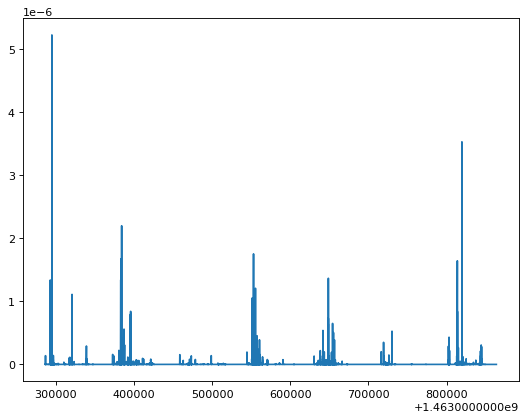

In [340]:

plt.figure(figsize=(8, 6), dpi=80)

#plt.plot(powertimes,power_column_avged_array)
plt.plot(kepttimes,power_column_avged_array)

[    42   2918   2930   2934   2974   2976   3020   3047   3071   3074
   3093   3099   3111   3113   3117   3150   3182   3202   3205   3235
   3252   3363   3371   3373   3377   3379   3403   3405   3570   4050
   4080   4083   4086   4107   4118   4122   4130   5051   5103  15098
  15616  17024  26238  30364  30741  31570  31576  34740  35878  35926
  35940  35984  35989  35994  36020  36027  36040  36042  36056  36058
  36086  36102  36105  36199  36369  36377  36380  36382  36405  36409
  36425  36429  36435  36490  36496  36498  36511  36527  36890  38012
  38069  38072  38366  40438  42042  42059  42071  42081  42084  42106
  42124  42131  42137  42148  42152  42160  42165  42186  42188  42191
  42232  42251  42254  42262  42376  61442  68794  81571  92145  95536
  95551  95553  95559  95561  95606  95860  95885  95887  95890  95947
  95952  95955  95965  96022  96073  96134  96173  96179  96313  96350
  96391  96955  96966  96998  97002  97154  97156  97575  98017  98549
  9856

IndexError: index 2918 is out of bounds for axis 0 with size 255

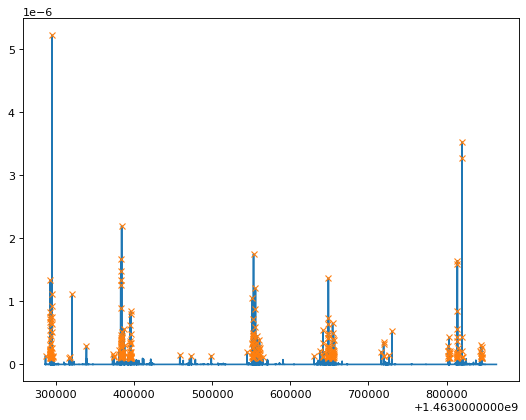

In [349]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(power_column_avged_array, height=1e-7)
print(peaks)
kepttimes = np.array(kepttimes)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(kepttimes,power_column_avged_array)
plt.plot(kepttimes[peaks],power_column_avged_array[peaks],'x')
# plotfilename = "psdintensity_"+str(tr[0])+'_'+str(tr[1])+'_v'+str(v)+'.jpg'
# plt.savefig(plotfilename,bbox_inches='tight')

wavestimes = kepttimes[peaks]
wavespsd = power_column_avged_array[peaks]

from pyspedas import time_string
postimewaves = []
poswaveii = []
peaksi = np.array(peaks)
for i in np.arange(len(wavestimes)):
    ptw = findclosest(wavestimes,postime,i)
    print(ptw)
    postimewaves.append(postime[ptw[0][0]])
    poswaveii.append(ptw[0][0])
# print(postimewaves)
# print(wavestimes)
print(len(poswaveii))
print(len(peaks))

plt.figure()
plt.plot(posx,posy)
plt.plot(posx[0],posy[0],'k.')
plt.text(posx[0],posy[0],'t = 0')
#plt.plot(posx[1000],posy[1000],'k.')
print(time_string(postime[1000]))
#plt.text(posx[1000],posy[1000],'t = '+str(time_string(postime[1000]))[-15:-7])

for i in np.arange(len(postimewaves)):
    plt.plot(posx[poswaveii[i]],posy[poswaveii[i]],'rx')
    #plt.text(posx[0],posy[0],'t = 0')
    
# plotfilename = "orbitdist_"+str(tr[0])+'_'+str(tr[1])+'_v'+str(v)+'.jpg'
# plt.savefig(plotfilename,bbox_inches='tight')



In [354]:
print(len(poswaveii))
print(len(peaks))
#print(len(postimewaves))
#print(posx[poswaveii])
print(time_string(wavestimes[0]),time_string(wavestimes[-1]))
print(time_string(kepttimes[0]),time_string(kepttimes[-1]))
print(time_string(postime[0]),time_string(postime[-1]))

print(timerange3)

1
255
2016-05-15 04:28:36.164153 2016-05-21 15:34:08.957535
2016-05-15 04:27:12.163118 2016-05-21 20:49:49.185724
2015-11-01 00:00:00.000000 2016-01-01 23:59:30.000000
['2015-11-01', '2016-01-02']


In [131]:
import pickle
from pytplot import get_data
timerange = ['2016-05-15','2016-05-22']
timerange2= ['2016-01-01', '2016-02-01']
timerange3= ['2015-11-01','2016-01-02']
tr = timerange3
v=1

#PSD
pyspedas.mms.dsp(probe=1, trange=timerange3, datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)
metadata = get_data('mms1_dsp_bpsd_omni_fast_l2',metadata=True)
data = get_data('mms1_dsp_bpsd_omni_fast_l2')
datapsd = data[1]
datatimes = data[0]
with open( 'dataPSD3' + '.pickle', 'wb') as handle:
    pickle.dump([datapsd,datatimes], handle,
                protocol=pickle.HIGHEST_PROTOCOL)

#positions:
pyspedas.mms.mec(trange=timerange3, probe=1)
datapos = get_data('mms1_mec_r_sm')
positions = datapos.y
distances = []
angles =[]
#azs=[]
for i in np.arange(len(positions)):
    dist = r(positions[i,0],positions[i,1],positions[i,2])
    
    distances.append(dist)
    #angl = np.arctan2(positions[i,2],np.sqrt(positions[i,0]**2+positions[i,1]**2))
    angl = np.arctan2(positions[i,1],positions[i,0])
    angles.append(angl)
#     az = np.arctan2(positions[i,1],positions[i,0])
#     azs.append(azs)
# distance in data is in km
distances = np.array(distances)
thetaangles = np.array(angles)
#azimuthalangles = np.array(azs)

postime = datapos[0]
posx =[]
posy = []
posz = []
#azs=[]
for i in np.arange(len(positions)):
    x = positions[i,0]
    y = positions[i,1]
    z = positions[i,2]
    posx.append(x)
    posy.append(y)
    posz.append(z)

# Write the dictionary with inversion data to a pickle file
with open( 'dataposition3' + '.pickle', 'wb') as handle:
    pickle.dump([posx,posy,posz,postime,distances,angles], handle,
                protocol=pickle.HIGHEST_PROTOCOL)
    

        
#Bfield
pyspedas.mms.fgm(trange=timerange3, data_rate='srvy', probe=1, time_clip=True)
dataBfield = get_data('mms1_fgm_b_gse_srvy_l2_bvec')
# Calculate omegas
Bdist = []
Bdist2 = []
times = []
nans=0
for i in np.arange(len(dataBfield[0])):
    if np.isnan(dataBfield.y[i][0]) == False:
        t = dataBfield[0][i]
        times.append(t)
        Bx = dataBfield.y[i][0] #B componets
        By = dataBfield.y[i][1] #B componets
        Bz = dataBfield.y[i][2] #B componets
        B = r(Bx,By,Bz)
        Bdist.append(B)
    else:
        nans +=1
    Bx2 = dataBfield.y[i][0] #B componets
    By2 = dataBfield.y[i][1] #B componets
    Bz2 = dataBfield.y[i][2] #B componets
    B2 = r(Bx2,By2,Bz2)
    Bdist2.append(B2)
    
Bdist = np.array(Bdist)
omega_e = 28*Bdist

Bdist2 = np.array(Bdist2)
omega_e2 = 28*Bdist2

Bnans = dataBfield.y
omega_e_nans = 28*Bnans
timesnan = dataBfield[0]

with open( 'dataBfield3' + '.pickle', 'wb') as handle:
    pickle.dump([Bdist,omega_e,times, Bdist2,omega_e2,Bnans,omega_e_nans,timesnan], handle,
                protocol=pickle.HIGHEST_PROTOCOL)


30-Apr-23 11:57:34: Downloading mms1_dsp_fast_l2_epsd_20160101_v0.6.3.cdf to pydata\mms1\dsp\fast\l2\epsd\2016\01
30-Apr-23 11:57:36: Downloading mms1_dsp_fast_l2_epsd_20160102_v0.6.4.cdf to pydata\mms1\dsp\fast\l2\epsd\2016\01
30-Apr-23 11:57:36: Downloading mms1_dsp_fast_l2_epsd_20160103_v0.6.3.cdf to pydata\mms1\dsp\fast\l2\epsd\2016\01
30-Apr-23 11:57:37: Downloading mms1_dsp_fast_l2_epsd_20160104_v0.6.3.cdf to pydata\mms1\dsp\fast\l2\epsd\2016\01
30-Apr-23 11:57:37: Downloading mms1_dsp_fast_l2_epsd_20160105_v0.6.3.cdf to pydata\mms1\dsp\fast\l2\epsd\2016\01
30-Apr-23 11:57:37: Downloading mms1_dsp_fast_l2_epsd_20160106_v0.6.5.cdf to pydata\mms1\dsp\fast\l2\epsd\2016\01
30-Apr-23 11:57:37: Downloading mms1_dsp_fast_l2_epsd_20160107_v0.6.3.cdf to pydata\mms1\dsp\fast\l2\epsd\2016\01
30-Apr-23 11:57:38: Downloading mms1_dsp_fast_l2_epsd_20160108_v0.6.4.cdf to pydata\mms1\dsp\fast\l2\epsd\2016\01
30-Apr-23 11:57:38: Downloading mms1_dsp_fast_l2_epsd_20160109_v0.6.4.cdf to pydata\mms1

30-Apr-23 11:59:47: Downloading mms1_mec_srvy_l2_epht89q_20160104_v2.1.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2016\01
30-Apr-23 11:59:47: Downloading mms1_mec_srvy_l2_epht89q_20160105_v2.1.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2016\01
30-Apr-23 11:59:47: Downloading mms1_mec_srvy_l2_epht89q_20160106_v2.1.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2016\01
30-Apr-23 11:59:47: Downloading mms1_mec_srvy_l2_epht89q_20160107_v2.1.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2016\01
30-Apr-23 11:59:48: Downloading mms1_mec_srvy_l2_epht89q_20160108_v2.1.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2016\01
30-Apr-23 11:59:48: Downloading mms1_mec_srvy_l2_epht89q_20160109_v2.1.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2016\01
30-Apr-23 11:59:48: Downloading mms1_mec_srvy_l2_epht89q_20160110_v2.1.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2016\01
30-Apr-23 11:59:48: Downloading mms1_mec_srvy_l2_epht89q_20160111_v2.1.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2016\01
30-Apr-23 11:59:48: Downloading mms1_mec

30-Apr-23 12:03:33: Downloading mms1_fgm_srvy_l2_20160126_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2016\01
30-Apr-23 12:03:39: Downloading mms1_fgm_srvy_l2_20160127_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2016\01
30-Apr-23 12:03:45: Downloading mms1_fgm_srvy_l2_20160128_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2016\01
30-Apr-23 12:03:51: Downloading mms1_fgm_srvy_l2_20160129_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2016\01
30-Apr-23 12:03:56: Downloading mms1_fgm_srvy_l2_20160130_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2016\01
30-Apr-23 12:04:02: Downloading mms1_fgm_srvy_l2_20160131_v4.18.0.cdf to pydata\mms1\fgm\srvy\l2\2016\01


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.


30-Apr-23 12:12:14: Time clip was applied to: mms1_fgm_b_gse_srvy_l2
30-Apr-23 12:14:48: Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
30-Apr-23 12:17:27: Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
30-Apr-23 12:22:07: Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
30-Apr-23 12:24:23: Time clip was applied to: mms1_fgm_flag_srvy_l2
30-Apr-23 12:24:24: Time clip was applied to: mms1_fgm_r_gse_srvy_l2
30-Apr-23 12:24:25: Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
30-Apr-23 12:27:18: Time clip was applied to: mms1_fgm_hirange_srvy_l2
30-Apr-23 12:29:55: Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
30-Apr-23 12:32:23: Time clip was applied to: mms1_fgm_stemp_srvy_l2
30-Apr-23 12:34:47: Time clip was applied to: mms1_fgm_etemp_srvy_l2
30-Apr-23 12:37:22: Time clip was applied to: mms1_fgm_mode_srvy_l2
30-Apr-23 12:37:22: Time clip error: No pytplot names were provided.
30-Apr-23 12:37:57: Loaded variables:
30-Apr-23 12:37:57: Epoch
30-Apr-23 12:37:57: mms1_fgm_b_gs

In [ ]:
with open( 'dataPSDvars' + '.pickle', 'wb') as handle:
    pickle.dump([datapsd,datatimes], handle,
                protocol=pickle.HIGHEST_PROTOCOL)

In [315]:
print(nans)
print(nans/len(times))
print(len(data[2]))
pyspedas.mms.fgm(trange=timerange, varnames = 'mms1_fgm_b_gse_srvy_l2' ,data_rate='srvy', probe=1, time_clip=True)
dataBfield = get_data('mms1_fgm_b_gse_srvy_l2')
Bdistest = dataBfield.y[:,3]
omega_etest = 28*Bdistest
# postime = datapos[0]
# print(len(postime))
# with open( 'dataposition2' + '.pickle', 'wb') as handle:
#     pickle.dump([posx,posy,posz,postime,distances,angles], handle,
#                 protocol=pickle.HIGHEST_PROTOCOL)

468267
0.05717783854004178
88


01-May-23 01:58:21: Loading pydata\mms1\fgm\srvy\l2\2016\05\mms1_fgm_srvy_l2_20160515_v4.39.0.cdf
01-May-23 01:58:21: Loading pydata\mms1\fgm\srvy\l2\2016\05\mms1_fgm_srvy_l2_20160516_v4.39.0.cdf
01-May-23 01:58:21: Loading pydata\mms1\fgm\srvy\l2\2016\05\mms1_fgm_srvy_l2_20160517_v4.39.0.cdf
01-May-23 01:58:21: Loading pydata\mms1\fgm\srvy\l2\2016\05\mms1_fgm_srvy_l2_20160518_v4.39.0.cdf
01-May-23 01:58:21: Loading pydata\mms1\fgm\srvy\l2\2016\05\mms1_fgm_srvy_l2_20160519_v4.39.0.cdf
01-May-23 01:58:21: Loading pydata\mms1\fgm\srvy\l2\2016\05\mms1_fgm_srvy_l2_20160520_v4.40.0.cdf
01-May-23 01:58:21: Loading pydata\mms1\fgm\srvy\l2\2016\05\mms1_fgm_srvy_l2_20160521_v4.40.0.cdf
01-May-23 01:59:39: Time clip was applied to: mms1_fgm_b_gse_srvy_l2
01-May-23 01:59:48: Loaded variables:
01-May-23 01:59:48: mms1_fgm_b_gse_srvy_l2
01-May-23 01:59:48: mms1_fgm_b_dmpa_srvy_l2_bvec
01-May-23 01:59:48: mms1_fgm_b_dmpa_srvy_l2_btot
01-May-23 01:59:48: mms1_fgm_b_gse_srvy_l2_bvec
01-May-23 01:59:48

(8279226, 4)
8279226
[494.59424 494.5757  494.52887 494.5154  494.48947 494.43823 494.40698
 494.3843  494.346  ]


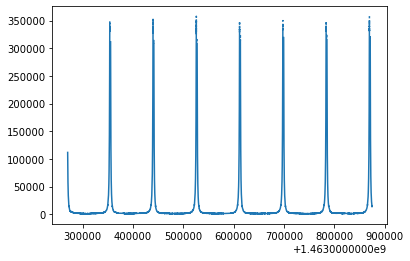

In [332]:
#tplot('mms1_fgm_b_gse_srvy_l2')
print(np.shape(dataBfield.y))
print(len(dataBfield.y[:,3]))
print(dataBfield.y[:,3][-10:-1])
Bdistest = dataBfield.y[:,3]
omega_etest = 28*Bdistest
plt.figure()
plt.plot(dataBfield.times,omega_etest)

(89280, 3)
89280
[72207.93716495 72229.15496994 72250.31733952 ... 76403.97092482
 76402.95943743 76401.89786597]


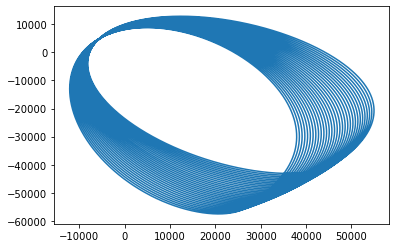

In [337]:
print(np.shape(datapos[1]))
positionstest = datapos[1]
print(len(positionstest[:,0]))
posxtest=positionstest[:,0]
posytest=positionstest[:,1]
plt.figure()
plt.plot(posxtest,posytest)
dist = r(positions[:,0],positions[:,1],positions[:,2])
print(dist)

In [298]:
# read in pickle data
with open('dataposition.pickle', 'rb') as handle:
            posx,posy,posz,postime,distances,angles = pickle.load(handle)
        
with open('dataBfield.pickle', 'rb') as handle:
            Bdist,omega_e,times, Bdist2,omega_e2,Bnans,omega_e_nans,timesnan = pickle.load(handle)
        
with open('dataPSD.pickle', 'rb') as handle:
            datapsd,datatimes = pickle.load(handle)
pyspedas.mms.dsp(probe=1,varnames=['mms1_dsp_epsd_omni'],datatype=['epsd', 'bpsd'],trange=timerange, data_rate='fast', level='l2', time_clip=True)
data = get_data('mms1_dsp_epsd_omni')
datapsd = data[1]
datatimes = data[0]


01-May-23 00:59:47: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160515_v0.6.4.cdf
01-May-23 00:59:47: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160516_v0.6.3.cdf
01-May-23 00:59:47: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160517_v0.6.3.cdf
01-May-23 00:59:47: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160518_v0.6.3.cdf
01-May-23 00:59:47: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160519_v0.6.2.cdf
01-May-23 00:59:47: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160520_v0.6.3.cdf
01-May-23 00:59:47: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160521_v0.6.3.cdf
01-May-23 00:59:47: Loading pydata\mms1\dsp\fast\l2\bpsd\2016\05\mms1_dsp_fast_l2_bpsd_20160515_v2.1.5.cdf
01-May-23 00:59:47: Loading pydata\mms1\dsp\fast\l2\bpsd\2016\05\mms1_dsp_fast_l2_bpsd_20160516_v2.1.4.cdf
01-May-23 00:59:47: Loading pydata\mm

In [300]:
print(np.shape(data[0]))

(214979,)


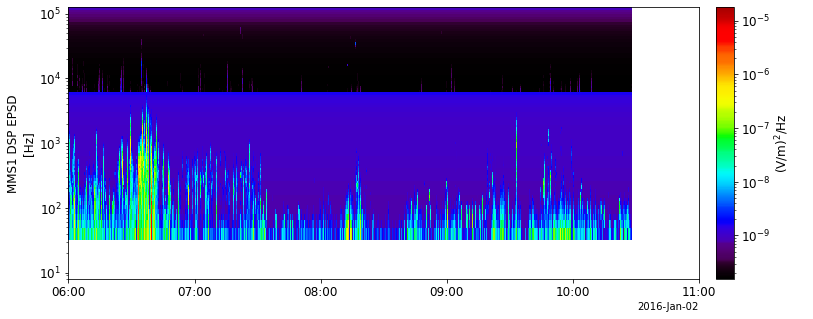

No data found in the time range: mms1_dsp_bpsd_omni_fast_l2


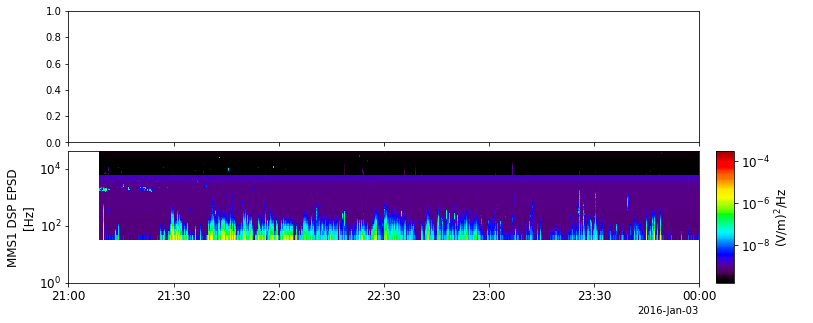

In [272]:

#%% load in fast PSD magnetic and electric plots example
from pytplot import options
from pytplot import tlimit
#pyspedas.mms.dsp(probe=1, trange=['2016-05-20 19:00:00', '2016-05-20 20:45:00'], datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)



options('mms1_dsp_bpsd_omni_fast_l2', 'zrange', [1e-5, 1e-10])

tlimit(['2016-01-02/06:00', '2016-01-02/11:00'])
tplot(['mms1_dsp_epsd_omni'])
from pytplot import get_data
# metadata = get_data('mms1_dsp_bpsd_omni_fast_l2',metadata=True)
# data = get_data('mms1_dsp_bpsd_omni_fast_l2')


options('mms1_dsp_bpsd_omni_fast_l2', 'yrange', [1, 40000])
options('mms1_dsp_epsd_omni', 'yrange', [1, 40000])
#y range is frequency 
# z range is the color bar
#tplot(['mms1_dsp_bpsd_omni_fast_l2', 'mms1_dsp_epsd_omni'], xsize=12)


# lwrband = [0.1*omega_e,0.5*omega_e]
# upband = [0.5*omega_e,1*omega_e]
# avg_omega_e = np.mean(omega_e)

# options('mms1_dsp_bpsd_omni_fast_l2', 'yrange', [.1*avg_omega_e, 1*avg_omega_e])
# options('mms1_dsp_epsd_omni', 'yrange', [.5*avg_omega_e, 1*avg_omega_e])
#y range is frequency 
# z range is the color bar
tlimit(['2016-01-02/21:00:00', '2016-01-03'])
tplot(['mms1_dsp_bpsd_omni_fast_l2', 'mms1_dsp_epsd_omni'], xsize=12)



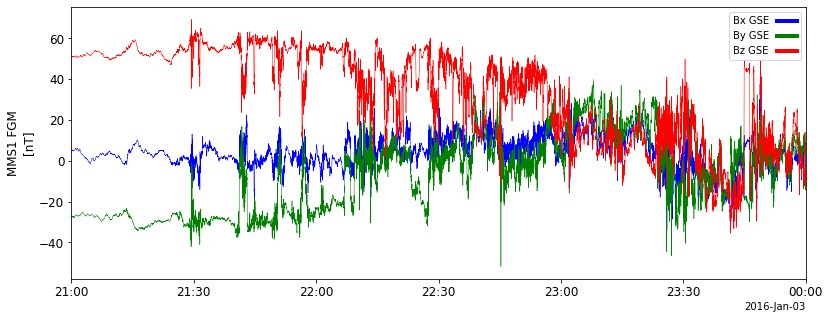

In [138]:
tlimit(['2016-01-02/21:00:00', '2016-01-03'])
tplot(['mms1_fgm_b_gse_srvy_l2_bvec'])

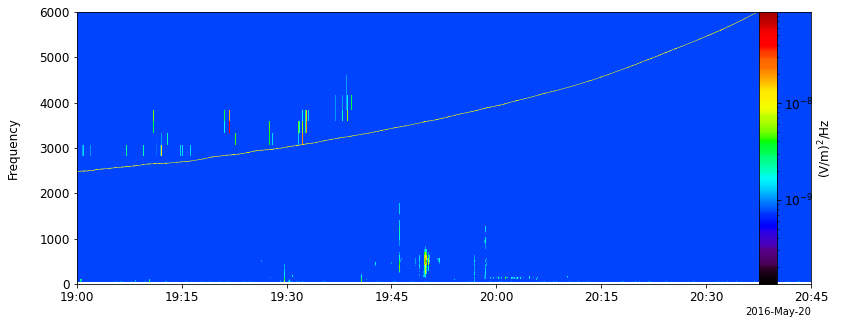

In [304]:
from pytplot import store_data
store_data('fcenans', data={'y': omega_e_nans, 'x': timesnan})
store_data('fce', data={'y': omega_e, 'x': times})
     
#store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fce'])
store_data('psdwithfce', data=['mms1_dsp_epsd_omni', 'fce'])
options('psdwithfce', 'ytitle', 'Frequency')
options('fce', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'white'])
options('fce','color','yellow')
#options('psdwithfce', 'legend_names', ['psd', 'fce'])
options('fce','yrange',[0,6000])
#tlimit(['2016-01-02/21:00:00', '2016-01-03'])
tlimit(timechorus)
tplot('psdwithfce')


1008
<class 'int'>


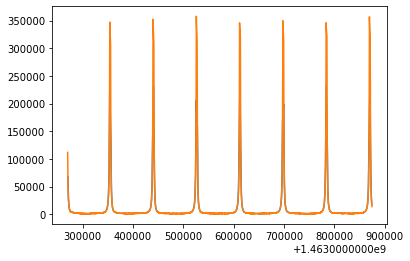

In [331]:


###################################
bintime = 10*60 #secs
i=1
# initialsec = timeslice[0]
# maxtime = timeslice[-1]
maxtime = times[-1]
initialsec = times[0]
multiples = int(round((maxtime-initialsec)/bintime))
print(multiples)
lenindex = len(times)
indexblock = int(round(lenindex/multiples))
print(type(indexblock))
binned_omega = []
binned_times = []
for i in np.arange(multiples):
    if i==0:
        avgomega = np.average(omega_e[0:((i+1)*indexblock)])
        avgtime = np.average(times[0:(i+1)*indexblock])
    else:
        avgomega = np.average(omega_e[i*indexblock:(i+1)*indexblock])
        avgtime = np.average(times[i*indexblock:(i+1)*indexblock])
    binned_omega.append(avgomega)
    binned_times.append(avgtime)
    
plt.figure()
plt.plot(binned_times,binned_omega)
plt.plot(times,omega_e)
#plt.xlim([times[0],times[int(len(times)/30)]])

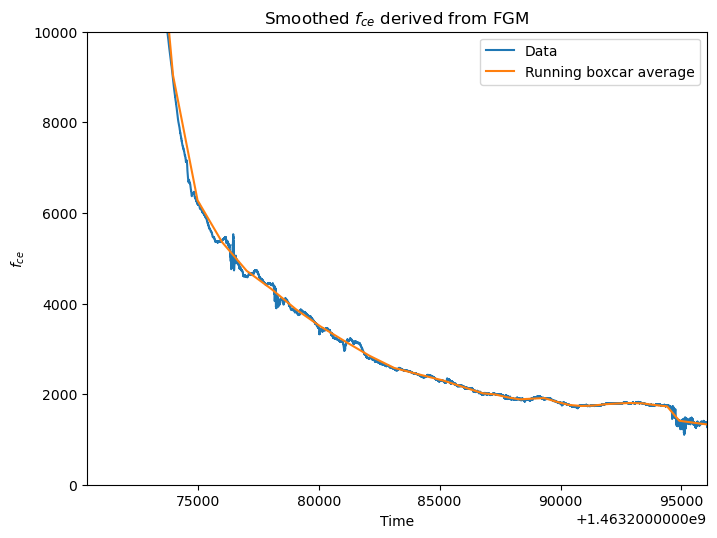

In [302]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(times,omega_e)
plt.plot(binned_times,binned_omega)
#plt.xlim([260000+1.463e9,360000+1.463e9])
plt.xlim([times[0],times[int(len(times)/29)+1]])
plt.ylim([0,10000])
plt.title('Smoothed $f_{ce}$ derived from FGM')
plt.xlabel('Time')
plt.ylabel('$f_{ce}$')
plt.legend(['Data','Running boxcar average'])

In [305]:
# times in omega array that overlap with times in psd:
timeslice = []
omegaslice = []
for i in np.arange(len(binned_times)):
    tdiffi = binned_times[i]-datatimes[0]
    tdifff = binned_times[i]-datatimes[-1]
    if tdiffi >=0 and tdifff<=0:
        timeslice.append(binned_times[i])
        omegaslice.append(binned_omega[i])
        
print(len(timeslice))


store_data('fceSlice', data={'y': omegaslice, 'x': timeslice})

store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fceSlice'])
store_data('psdwithfce', data=['mms1_dsp_bpsd_omni', 'fceSlice'])

options('psdwithfce', 'ytitle', 'Frequency')
options('fceSlice', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'white'])
options('fceSlice','color','white')
options('fceSlice','thick',1.5)
#options('psdwithfce', 'legend_names', ['psd', 'fce'])

tlimit(['2016-01-02/21:00:00', '2016-01-03'])
tlimit(timechorus)
options('fceSlice','yrange',[0,6000])
tplot('psdwithfce')

982


KeyError: 'mms1_dsp_bpsd_omni'

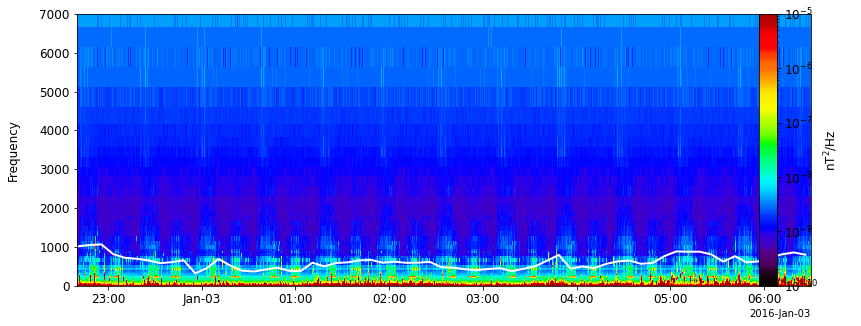

In [247]:
# from pytplot import del_data
# del_data(['mms1_dsp_bpsd_omni_fast_l2','fceSlice','psdwithfce'])
# pyspedas.mms.dsp(probe=1, trange=timerange2,varnames = 'mms1_dsp_bpsd_omni_fast_l2', datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)
store_data('fceSlice', data={'y': omegaslice, 'x': timeslice})

#store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fceSlice'])
store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fceSlice'])
options('psdwithfce', 'ytitle', 'Frequency')
options('fceSlice', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'white'])
options('fceSlice','color','white')
options('fceSlice','thick',2)
#options('psdwithfce', 'legend_names', ['psd', 'fce'])
#tlimit(['2016-01-02/22:40:00', '2016-01-03/06:30:00'])
options('fceSlice','yrange',[0,7000])

options('fceSlice', 'x_interp', False)
options('mms1_dsp_bpsd_omni_fast_l2', 'y_interp', False)
options('mms1_dsp_bpsd_omni_fast_l2', 'zrange', [1e-10, 1e-5])

tplot('psdwithfce')


In [307]:
pyspedas.mms.fpi(center_measurement=True, 
                 datatype=['dis-moms', 'des-moms'], 
                 trange=['2015-11-01','2016-01-02'],
                 varsnames=['mms1_des_numberdensity_fast','mms1_dis_numberdensity_fast'],
                 probe=1)
edensitydata = get_data('mms1_des_numberdensity_fast')
edensity = edensitydata.y

idensitydata = get_data('mms1_dis_numberdensity_fast')
idensity = idensitydata.y
print(len(edensity))
print(min(edensity),max(edensity))
tlimit(['2015-11-01','2016-01-02'])
tplot(['mms1_des_numberdensity_fast']) 
plt.figure()
plt.plot(edensitydata.times,edensitydata.y)
edensitytimes = edensitydata.times


with open( 'dataDensity1' + '.pickle', 'wb') as handle:
    pickle.dump([edensity,edensitytimes], handle,
                protocol=pickle.HIGHEST_PROTOCOL)

01-May-23 01:09:23: Downloading mms1_fpi_fast_l2_dis-moms_20151101020000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:24: Downloading mms1_fpi_fast_l2_dis-moms_20151101040000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:24: Downloading mms1_fpi_fast_l2_dis-moms_20151101060000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:24: Downloading mms1_fpi_fast_l2_dis-moms_20151101080000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:25: Downloading mms1_fpi_fast_l2_dis-moms_20151101100000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:25: Downloading mms1_fpi_fast_l2_dis-moms_20151101120000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:25: Downloading mms1_fpi_fast_l2_dis-moms_20151101140000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:26: Downloading mms1_fpi_fast_l2_dis-moms_20151102020000_v3.3.0.cdf to pydata\mms1\fpi\f

01-May-23 01:09:45: Downloading mms1_fpi_fast_l2_dis-moms_20151109140000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:45: Downloading mms1_fpi_fast_l2_dis-moms_20151110020000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:46: Downloading mms1_fpi_fast_l2_dis-moms_20151110040000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:46: Downloading mms1_fpi_fast_l2_dis-moms_20151110060000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:46: Downloading mms1_fpi_fast_l2_dis-moms_20151110080000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:47: Downloading mms1_fpi_fast_l2_dis-moms_20151110100000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:47: Downloading mms1_fpi_fast_l2_dis-moms_20151110120000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:09:47: Downloading mms1_fpi_fast_l2_dis-moms_20151110140000_v3.3.0.cdf to pydata\mms1\fpi\f

01-May-23 01:11:00: Downloading mms1_fpi_fast_l2_dis-moms_20151118020000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:11:02: Downloading mms1_fpi_fast_l2_dis-moms_20151118040000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:11:04: Downloading mms1_fpi_fast_l2_dis-moms_20151118060000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:11:05: Downloading mms1_fpi_fast_l2_dis-moms_20151118080000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:11:07: Downloading mms1_fpi_fast_l2_dis-moms_20151118100000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:11:08: Downloading mms1_fpi_fast_l2_dis-moms_20151118120000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:11:08: Downloading mms1_fpi_fast_l2_dis-moms_20151118140000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:11:10: Downloading mms1_fpi_fast_l2_dis-moms_20151119000000_v3.3.0.cdf to pydata\mms1\fpi\f

01-May-23 01:12:23: Downloading mms1_fpi_fast_l2_dis-moms_20151126040000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:12:24: Downloading mms1_fpi_fast_l2_dis-moms_20151126060000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:12:25: Downloading mms1_fpi_fast_l2_dis-moms_20151126080000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:12:26: Downloading mms1_fpi_fast_l2_dis-moms_20151126100000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:12:27: Downloading mms1_fpi_fast_l2_dis-moms_20151126120000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:12:29: Downloading mms1_fpi_fast_l2_dis-moms_20151126140000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:12:29: Downloading mms1_fpi_fast_l2_dis-moms_20151127000000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\11
01-May-23 01:12:31: Downloading mms1_fpi_fast_l2_dis-moms_20151127020000_v3.3.0.cdf to pydata\mms1\fpi\f

01-May-23 01:14:09: Downloading mms1_fpi_fast_l2_dis-moms_20151204020000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:14:10: Downloading mms1_fpi_fast_l2_dis-moms_20151204040000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:14:12: Downloading mms1_fpi_fast_l2_dis-moms_20151204060000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:14:13: Downloading mms1_fpi_fast_l2_dis-moms_20151204080000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:14:14: Downloading mms1_fpi_fast_l2_dis-moms_20151204100000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:14:15: Downloading mms1_fpi_fast_l2_dis-moms_20151204120000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:14:19: Downloading mms1_fpi_fast_l2_dis-moms_20151204220000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:14:20: Downloading mms1_fpi_fast_l2_dis-moms_20151205000000_v3.4.0.cdf to pydata\mms1\fpi\f

01-May-23 01:15:17: Downloading mms1_fpi_fast_l2_dis-moms_20151212040000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:15:17: Downloading mms1_fpi_fast_l2_dis-moms_20151212060000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:15:17: Downloading mms1_fpi_fast_l2_dis-moms_20151212080000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:15:17: Downloading mms1_fpi_fast_l2_dis-moms_20151212100000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:15:18: Downloading mms1_fpi_fast_l2_dis-moms_20151212120000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:15:18: Downloading mms1_fpi_fast_l2_dis-moms_20151212220000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:15:18: Downloading mms1_fpi_fast_l2_dis-moms_20151213000000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:15:19: Downloading mms1_fpi_fast_l2_dis-moms_20151213020000_v3.4.0.cdf to pydata\mms1\fpi\f

01-May-23 01:16:09: Downloading mms1_fpi_fast_l2_dis-moms_20151220080000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:16:11: Downloading mms1_fpi_fast_l2_dis-moms_20151220100000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:16:12: Downloading mms1_fpi_fast_l2_dis-moms_20151220120000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:16:13: Downloading mms1_fpi_fast_l2_dis-moms_20151220220000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:16:14: Downloading mms1_fpi_fast_l2_dis-moms_20151221000000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:16:15: Downloading mms1_fpi_fast_l2_dis-moms_20151221020000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:16:16: Downloading mms1_fpi_fast_l2_dis-moms_20151221040000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:16:17: Downloading mms1_fpi_fast_l2_dis-moms_20151221060000_v3.4.0.cdf to pydata\mms1\fpi\f

01-May-23 01:17:27: Downloading mms1_fpi_fast_l2_dis-moms_20151228080000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:17:28: Downloading mms1_fpi_fast_l2_dis-moms_20151228100000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:17:28: Downloading mms1_fpi_fast_l2_dis-moms_20151228200000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:17:29: Downloading mms1_fpi_fast_l2_dis-moms_20151228220000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:17:30: Downloading mms1_fpi_fast_l2_dis-moms_20151229000000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:17:31: Downloading mms1_fpi_fast_l2_dis-moms_20151229020000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:17:32: Downloading mms1_fpi_fast_l2_dis-moms_20151229040000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\dis-moms\2015\12
01-May-23 01:17:33: Downloading mms1_fpi_fast_l2_dis-moms_20151229060000_v3.4.0.cdf to pydata\mms1\fpi\f

01-May-23 01:18:34: Downloading mms1_fpi_fast_l2_des-moms_20151104160000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:34: Downloading mms1_fpi_fast_l2_des-moms_20151105020000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:35: Downloading mms1_fpi_fast_l2_des-moms_20151105040000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:35: Downloading mms1_fpi_fast_l2_des-moms_20151105060000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:35: Downloading mms1_fpi_fast_l2_des-moms_20151105080000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:35: Downloading mms1_fpi_fast_l2_des-moms_20151105100000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:36: Downloading mms1_fpi_fast_l2_des-moms_20151105120000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:37: Downloading mms1_fpi_fast_l2_des-moms_20151105140000_v3.3.0.cdf to pydata\mms1\fpi\f

01-May-23 01:18:54: Downloading mms1_fpi_fast_l2_des-moms_20151113100000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:55: Downloading mms1_fpi_fast_l2_des-moms_20151113120000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:55: Downloading mms1_fpi_fast_l2_des-moms_20151113140000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:55: Downloading mms1_fpi_fast_l2_des-moms_20151114000000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:55: Downloading mms1_fpi_fast_l2_des-moms_20151114020000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:55: Downloading mms1_fpi_fast_l2_des-moms_20151114040000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:56: Downloading mms1_fpi_fast_l2_des-moms_20151114060000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:18:56: Downloading mms1_fpi_fast_l2_des-moms_20151114080000_v3.3.0.cdf to pydata\mms1\fpi\f

01-May-23 01:19:12: Downloading mms1_fpi_fast_l2_des-moms_20151121120000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:13: Downloading mms1_fpi_fast_l2_des-moms_20151121140000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:13: Downloading mms1_fpi_fast_l2_des-moms_20151122000000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:15: Downloading mms1_fpi_fast_l2_des-moms_20151122020000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:15: Downloading mms1_fpi_fast_l2_des-moms_20151122040000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:16: Downloading mms1_fpi_fast_l2_des-moms_20151122060000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:16: Downloading mms1_fpi_fast_l2_des-moms_20151122080000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:16: Downloading mms1_fpi_fast_l2_des-moms_20151122100000_v3.3.0.cdf to pydata\mms1\fpi\f

01-May-23 01:19:33: Downloading mms1_fpi_fast_l2_des-moms_20151129140000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:33: Downloading mms1_fpi_fast_l2_des-moms_20151129220000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:33: Downloading mms1_fpi_fast_l2_des-moms_20151130000000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:33: Downloading mms1_fpi_fast_l2_des-moms_20151130020000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:33: Downloading mms1_fpi_fast_l2_des-moms_20151130040000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:34: Downloading mms1_fpi_fast_l2_des-moms_20151130060000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:34: Downloading mms1_fpi_fast_l2_des-moms_20151130080000_v3.3.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\11
01-May-23 01:19:38: Downloading mms1_fpi_fast_l2_des-moms_20151130100000_v3.3.0.cdf to pydata\mms1\fpi\f

01-May-23 01:20:35: Downloading mms1_fpi_fast_l2_des-moms_20151207120000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:20:35: Downloading mms1_fpi_fast_l2_des-moms_20151207220000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:20:36: Downloading mms1_fpi_fast_l2_des-moms_20151208000000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:20:37: Downloading mms1_fpi_fast_l2_des-moms_20151208020000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:20:37: Downloading mms1_fpi_fast_l2_des-moms_20151208040000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:20:38: Downloading mms1_fpi_fast_l2_des-moms_20151208060000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:20:39: Downloading mms1_fpi_fast_l2_des-moms_20151208080000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:20:40: Downloading mms1_fpi_fast_l2_des-moms_20151208100000_v3.4.0.cdf to pydata\mms1\fpi\f

01-May-23 01:21:04: Downloading mms1_fpi_fast_l2_des-moms_20151215220000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:21:05: Downloading mms1_fpi_fast_l2_des-moms_20151216000000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:21:05: Downloading mms1_fpi_fast_l2_des-moms_20151216020000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:21:05: Downloading mms1_fpi_fast_l2_des-moms_20151216040000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:21:05: Downloading mms1_fpi_fast_l2_des-moms_20151216060000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:21:07: Downloading mms1_fpi_fast_l2_des-moms_20151216080000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:21:10: Downloading mms1_fpi_fast_l2_des-moms_20151216100000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:21:12: Downloading mms1_fpi_fast_l2_des-moms_20151216220000_v3.4.0.cdf to pydata\mms1\fpi\f

01-May-23 01:22:32: Downloading mms1_fpi_fast_l2_des-moms_20151224000000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:22:32: Downloading mms1_fpi_fast_l2_des-moms_20151224020000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:22:32: Downloading mms1_fpi_fast_l2_des-moms_20151224040000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:22:33: Downloading mms1_fpi_fast_l2_des-moms_20151224060000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:22:33: Downloading mms1_fpi_fast_l2_des-moms_20151224080000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:22:33: Downloading mms1_fpi_fast_l2_des-moms_20151224100000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:22:33: Downloading mms1_fpi_fast_l2_des-moms_20151224200000_v3.4.0.cdf to pydata\mms1\fpi\fast\l2\des-moms\2015\12
01-May-23 01:22:34: Downloading mms1_fpi_fast_l2_des-moms_20151224220000_v3.4.0.cdf to pydata\mms1\fpi\f

01-May-23 01:23:54: Loading pydata\mms1\fpi\fast\l2\des-moms\2016\01\mms1_fpi_fast_l2_des-moms_20160101020000_v3.3.0.cdf
01-May-23 01:23:54: Loading pydata\mms1\fpi\fast\l2\des-moms\2016\01\mms1_fpi_fast_l2_des-moms_20160101040000_v3.3.0.cdf
01-May-23 01:23:54: Loading pydata\mms1\fpi\fast\l2\des-moms\2016\01\mms1_fpi_fast_l2_des-moms_20160101060000_v3.3.0.cdf
01-May-23 01:23:54: Loading pydata\mms1\fpi\fast\l2\des-moms\2016\01\mms1_fpi_fast_l2_des-moms_20160101080000_v3.3.0.cdf
01-May-23 01:23:54: Loading pydata\mms1\fpi\fast\l2\des-moms\2016\01\mms1_fpi_fast_l2_des-moms_20160101100000_v3.3.0.cdf
01-May-23 01:23:54: Loading pydata\mms1\fpi\fast\l2\des-moms\2016\01\mms1_fpi_fast_l2_des-moms_20160101200000_v3.3.0.cdf
01-May-23 01:23:54: Loading pydata\mms1\fpi\fast\l2\des-moms\2016\01\mms1_fpi_fast_l2_des-moms_20160101220000_v3.3.1.cdf


KeyboardInterrupt: 

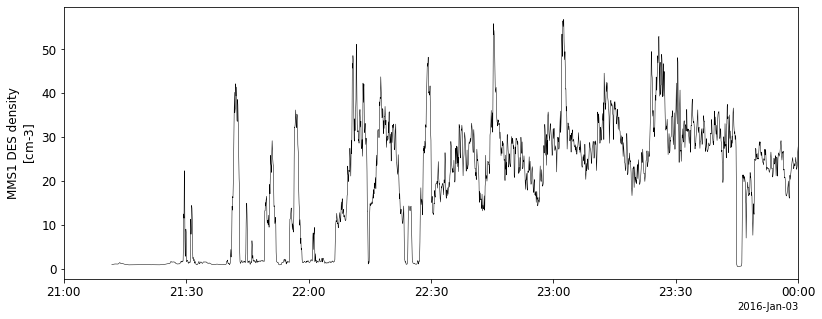

In [149]:
tlimit(['2016-01-02/21:00:00', '2016-01-03'])
options('mms1_des_numberdensity_fast', 'ylog', False)
tplot(['mms1_des_numberdensity_fast']) 

9669
<class 'int'>
(array([6845], dtype=int64),)
2016-02-15 01:33:58.966487


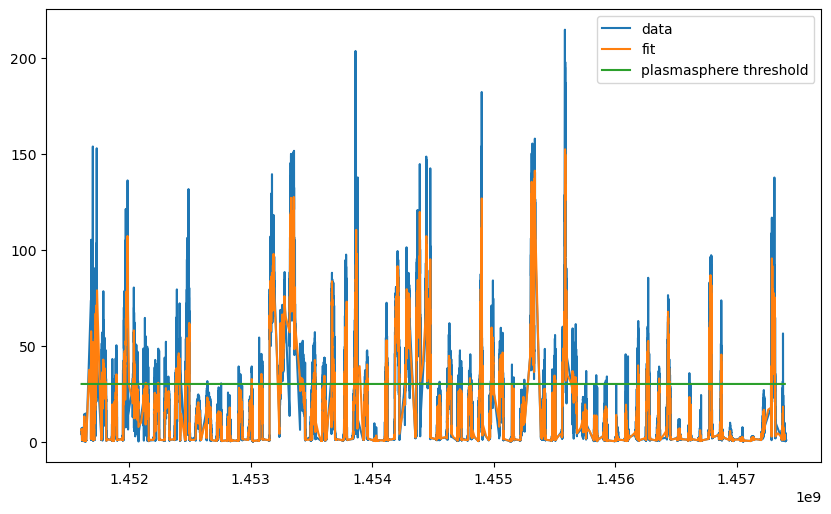

In [206]:
densitythresh = 30 #cm^-3
################################################### smooth density curve
bintime = 10*60 #secs
i=1
# initialsec = timeslice[0]
# maxtime = timeslice[-1]
edentimes = edensitydata.times
maxtime = edentimes[-1]
initialsec = edentimes[0]
multiples = int(round((maxtime-initialsec)/bintime))
print(multiples)
lenindex = len(edentimes)
indexblock = int(round(lenindex/multiples))
print(type(indexblock))
binned_eden = []
binned_edentimes = []
for i in np.arange(multiples):
    if i==0:
        avgeden = np.average(edensity[0:((i+1)*indexblock)])
        avgtimeeden = np.average(edentimes[0:(i+1)*indexblock])
    else:
        avgeden = np.average(edensity[i*indexblock:(i+1)*indexblock])
        avgtimeeden = np.average(edentimes[i*indexblock:(i+1)*indexblock])
    binned_eden.append(avgeden)
    binned_edentimes.append(avgtimeeden)
    
plt.figure(figsize = (10,6),dpi=100)
plt.plot(edentimes,edensity)
plt.plot(binned_edentimes,binned_eden)
plt.plot(binned_edentimes,np.zeros(len(binned_edentimes))+densitythresh,'-')
plt.legend(['data','fit','plasmasphere threshold'])
v=1
tr = timerange2
plotfilename = "density_"+str(tr[0])+'_'+str(tr[1])+'_v'+str(v)+'.jpg'
plt.savefig(plotfilename,bbox_inches='tight')

binned_eden =np.array(binned_eden)
thresharray = [densitythresh]
identhresh = findclosest(thresharray,binned_eden,0)
print(identhresh)
print(time_string(binned_edentimes[identhresh[0][0]]))
#plt.plot(binned_edentimes[identhresh[0][0]],binned_eden[identhresh[0][0]],'.')
dendiff = binned_eden-densitythresh

Starting...
Quarter way...
Half way...
3/4 done.......


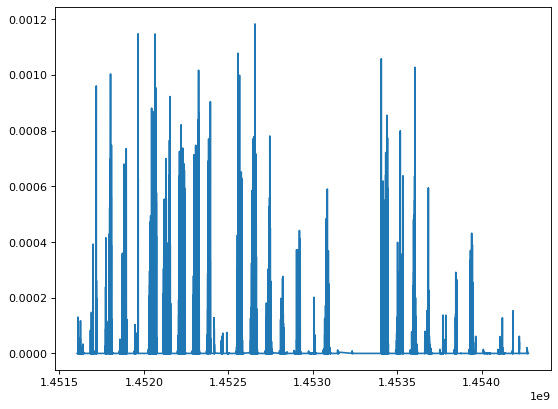

In [185]:
#data: [0,:] - x axis values - time
#[1,:] - power value (color bar)
#[2,:] - y axis values - frequency (Hz)


power_column_avged_array = []
powerarray = []
kepttimes=[]
for i in np.arange(len(datatimes)):
    denti  = findclosest(datatimes,binned_edentimes,i)
    dentii = denti[0][0]
    if dendiff[dentii]<=0:
        kepttimes.append(datatimes[i])
        
        avg_omega_index = findclosest(datatimes,timeslice,i)
        #print(avg_omega_index[0][0])
        avg_omega_e = omegaslice[avg_omega_index[0][0]]
        #print(avg_omega_e)
        powerarray = []
        for j in np.arange(len(data[2])):
            if data[2][j] > .1*avg_omega_e and data[2][j] <1*avg_omega_e:
                #print('averaging: '+str(data.times[i])+' at '+str(data[2][j]))
                power = data[1][i][j]
                powerarray.append(power)
            powerarray2 = np.array(powerarray)
        power_column_avged = np.mean(powerarray2)
            
        power_column_avged_array.append(power_column_avged)
        #print('for i: '+str(i)+' avg psd: '+str(power_column_avged))
        if i == 0:
            print('Starting...')
        elif i==np.round(len(data[0])/4):
            print('Quarter way...')
        elif i==np.round(len(data[0])/2):
            print('Half way...')
        elif i==np.round(3*len(data[0])/4):
            print('3/4 done.......')
        elif i == np.round(len(data[0]-1)):
            print('Finished')

powertimes = data.times
powertimes = time_string(data.times)
power_column_avged_array = np.array(power_column_avged_array)

plt.figure(figsize=(8, 6), dpi=80)

#plt.plot(powertimes,power_column_avged_array)
plt.plot(kepttimes,power_column_avged_array)

# plt.figure(figsize=(8, 6), dpi=80)

# #plt.plot(powertimes,power_column_avged_array)
# plt.plot(time_string(kepttimes),power_column_avged_array)


[ 31882  31885  35765  40009  40562  40801  40889  40934  41002  42202
  42324  42454  42558  42565  42646  42664  43616  43854  44002  44061
  44426  45036  45039  63298  63329  66016  68877  78841  78844  78955
  79048  79126  79169  79186  79219  82825  83239  85287  85384  85464
  85494  88437  88656  88689  88692  89479  89483  89833  90142  90158
  90297  90312  90940  92536  93414  93712  94150  94190  94230  94239
  94390  94535  94607  94752  94806  94812  95252  95260  95277  95287
  96773  96911  96941  97417  97489  97491  97596  97600  97640  97642
  98094  98435  98576  98925  99184  99426 102628 104451 105049 105066
 105190 105368 105403 107364 108473 108507 108521 108547 109356 109372
 117647 118632 118701 118708 118729 118801 118812 119204 119341 119348
 119563 119616 119636 120173 120238 120248 120308 128753 129336 129491
 132977 134036 134749 136219 136274 136388 136711 137736 137756 138062
 138780 139180 139303 140830 141388 141392 141483 141519 141624 141780
 14204

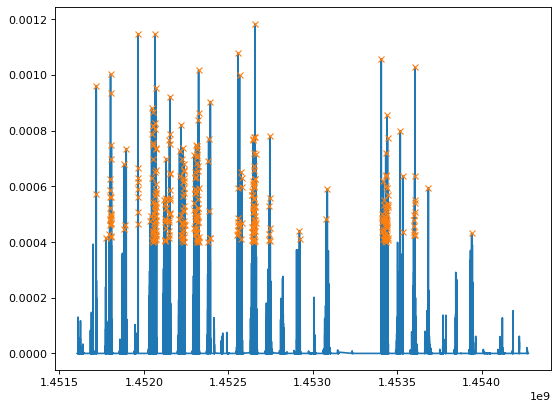

In [207]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(power_column_avged_array, height=1e-4)
print(peaks)
kepttimes = np.array(kepttimes)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(kepttimes,power_column_avged_array)
plt.plot(kepttimes[peaks],power_column_avged_array[peaks],'x')
plotfilename = "psdintensity_"+str(tr[0])+'_'+str(tr[1])+'_v'+str(v)+'.jpg'
plt.savefig(plotfilename,bbox_inches='tight')

wavestimes = kepttimes[peaks]
wavespsd = power_column_avged_array[peaks]



351
89280
2016-01-01 08:20:00.000000


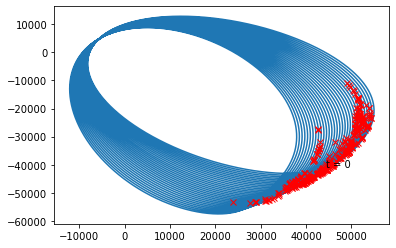

In [255]:

from pyspedas import time_string
postimewaves = []
poswaveii = []
peaksi = np.array(peaks)
for i in np.arange(len(wavestimes)):
    ptw = findclosest(wavestimes,postime,i)
    postimewaves.append(postime[ptw[0][0]])
    poswaveii.append(ptw[0][0])
# print(postimewaves)
# print(wavestimes)
print(len(poswaveii))
print(len(postime))

plt.figure()
plt.plot(posx,posy)
plt.plot(posx[0],posy[0],'k.')
plt.text(posx[0],posy[0],'t = 0')
#plt.plot(posx[1000],posy[1000],'k.')
print(time_string(postime[1000]))
#plt.text(posx[1000],posy[1000],'t = '+str(time_string(postime[1000]))[-15:-7])

for i in np.arange(len(postimewaves)):
    plt.plot(posx[poswaveii[i]],posy[poswaveii[i]],'rx')
    #plt.text(posx[0],posy[0],'t = 0')
    
plotfilename = "orbitdist_"+str(tr[0])+'_'+str(tr[1])+'_v'+str(v)+'.jpg'
plt.savefig(plotfilename,bbox_inches='tight')


In [200]:

with open( 'time2results' + '.pickle', 'wb') as handle:
    pickle.dump([poswaveii,power_column_avged_array,kepttimes,wavestimes,wavespsd], handle,
                protocol=pickle.HIGHEST_PROTOCOL)


30-Apr-23 21:17:30: Loading pydata\mms1\mec\srvy\l2\epht89q\2015\11\mms1_mec_srvy_l2_epht89q_20151101_v2.0.0.cdf
30-Apr-23 21:17:30: Downloading mms1_mec_srvy_l2_epht89q_20151102_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:17:31: Downloading mms1_mec_srvy_l2_epht89q_20151103_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:17:31: Downloading mms1_mec_srvy_l2_epht89q_20151104_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:17:31: Downloading mms1_mec_srvy_l2_epht89q_20151105_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:17:32: Downloading mms1_mec_srvy_l2_epht89q_20151106_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:17:32: Downloading mms1_mec_srvy_l2_epht89q_20151107_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:17:32: Downloading mms1_mec_srvy_l2_epht89q_20151108_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:17:32: Downloading mms1_mec_srvy_l

30-Apr-23 21:18:46: Downloading mms2_mec_srvy_l2_epht89q_20151108_v2.0.0.cdf to pydata\mms2\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:18:48: Downloading mms2_mec_srvy_l2_epht89q_20151109_v2.0.0.cdf to pydata\mms2\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:18:49: Downloading mms2_mec_srvy_l2_epht89q_20151110_v2.0.0.cdf to pydata\mms2\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:18:51: Downloading mms2_mec_srvy_l2_epht89q_20151111_v2.0.0.cdf to pydata\mms2\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:18:52: Downloading mms2_mec_srvy_l2_epht89q_20151112_v2.0.0.cdf to pydata\mms2\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:18:53: Downloading mms2_mec_srvy_l2_epht89q_20151113_v2.0.0.cdf to pydata\mms2\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:18:55: Downloading mms2_mec_srvy_l2_epht89q_20151114_v2.1.0.cdf to pydata\mms2\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:18:56: Downloading mms2_mec_srvy_l2_epht89q_20151115_v2.1.0.cdf to pydata\mms2\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:18:57: Downloading mms2_mec

30-Apr-23 21:19:29: Downloading mms3_mec_srvy_l2_epht89q_20151115_v2.1.0.cdf to pydata\mms3\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:19:29: Downloading mms3_mec_srvy_l2_epht89q_20151116_v2.1.0.cdf to pydata\mms3\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:19:30: Downloading mms3_mec_srvy_l2_epht89q_20151117_v2.1.0.cdf to pydata\mms3\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:19:30: Downloading mms3_mec_srvy_l2_epht89q_20151118_v2.1.0.cdf to pydata\mms3\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:19:30: Downloading mms3_mec_srvy_l2_epht89q_20151119_v2.1.0.cdf to pydata\mms3\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:19:30: Downloading mms3_mec_srvy_l2_epht89q_20151120_v2.1.0.cdf to pydata\mms3\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:19:31: Downloading mms3_mec_srvy_l2_epht89q_20151121_v2.1.0.cdf to pydata\mms3\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:19:31: Downloading mms3_mec_srvy_l2_epht89q_20151122_v2.1.0.cdf to pydata\mms3\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:19:31: Downloading mms3_mec

30-Apr-23 21:20:15: Downloading mms4_mec_srvy_l2_epht89q_20151122_v2.1.0.cdf to pydata\mms4\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:20:15: Downloading mms4_mec_srvy_l2_epht89q_20151123_v2.1.0.cdf to pydata\mms4\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:20:15: Downloading mms4_mec_srvy_l2_epht89q_20151124_v2.1.0.cdf to pydata\mms4\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:20:15: Downloading mms4_mec_srvy_l2_epht89q_20151125_v2.1.0.cdf to pydata\mms4\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:20:15: Downloading mms4_mec_srvy_l2_epht89q_20151126_v2.1.0.cdf to pydata\mms4\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:20:16: Downloading mms4_mec_srvy_l2_epht89q_20151127_v2.1.0.cdf to pydata\mms4\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:20:16: Downloading mms4_mec_srvy_l2_epht89q_20151128_v2.1.0.cdf to pydata\mms4\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:20:16: Downloading mms4_mec_srvy_l2_epht89q_20151129_v2.1.0.cdf to pydata\mms4\mec\srvy\l2\epht89q\2015\11
30-Apr-23 21:20:16: Downloading mms4_mec

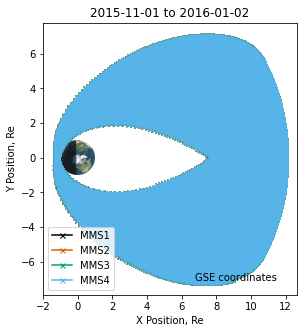

In [196]:
from pyspedas.mms.mms_orbit_plot import mms_orbit_plot
mms_orbit_plot(trange=['2015-11-01','2016-01-02'])

1451717825.80217
2016-01-08 23:41:05.518663 2016-01-08 23:59:17.533054


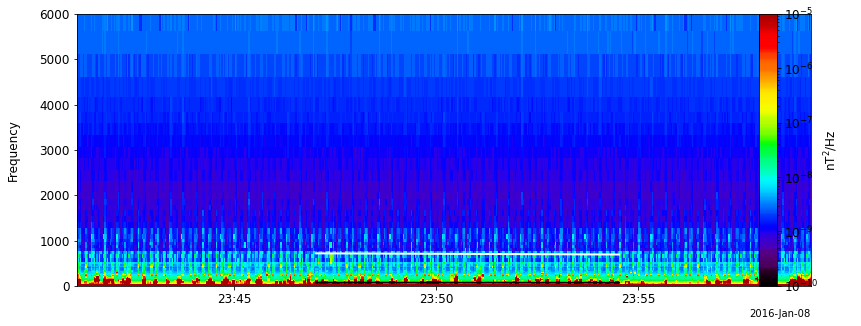

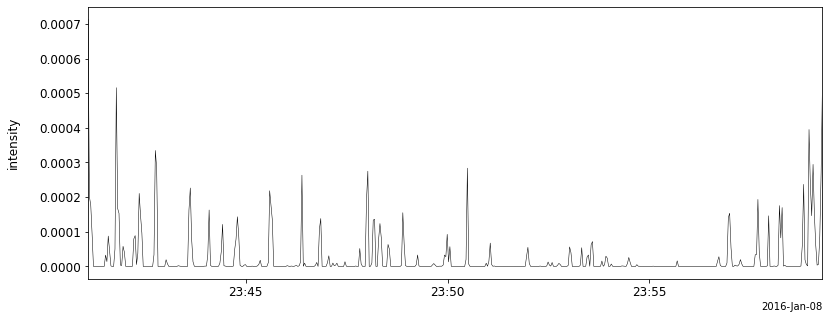

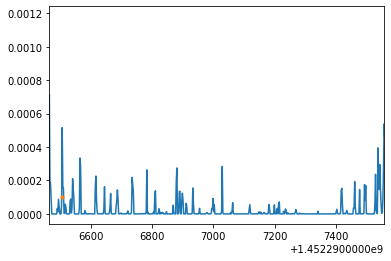

In [262]:
peak1 = 150
peak2 = 151
peak3 = 152
edge1 = wavestimes[peak1]
edge2 = wavestimes[peak3]
middle = wavestimes[peak2]

print(wavestimes[1])
from pyspedas import time_double
time_double('2015-10-16')
timepeak1 = time_string(edge1)
timepeak2 = time_string(edge2)
print(timepeak1,timepeak2)
omegaslice2 = np.array(omegaslice)
store_data('fceSlice', data={'y': omegaslice, 'x': timeslice})
store_data('fceSlicelwr', data={'y': .1*omegaslice2, 'x': timeslice})

store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fceSlicelwr','fceSlice'])
options('psdwithfce', 'ytitle', 'Frequency')
options('fceSlice', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'yellow','white'])
options('fceSlice','color','white')
options('fceSlice','thick',2)
options('fceSlicelwr','thick',2)
#options('psdwithfce', 'legend_names', ['psd', 'fce'])
#tlimit(['2016-01-02/22:40:00', '2016-01-02/23:00:00'])
tlimit([timepeak1, timepeak2])
options('fceSlice','yrange',[0,6000])

store_data('intensity', data={'y': power_column_avged_array, 'x': kepttimes})
tplot('psdwithfce')
tplot('intensity')


#plt.plot(powertimes,power_column_avged_array)
plt.plot(kepttimes,power_column_avged_array)
plt.xlim([edge1,edge2])
plt.plot([middle],[.0001],'.')

In [264]:
# read in pickle data
# with open('dataposition.pickle', 'rb') as handle:
#             posx,posy,posz,postime,distances,angles = pickle.load(handle)
        
with open('dataBfield.pickle', 'rb') as handle:
            Bdist,omega_e,times, Bdist2,omega_e2,Bnans,omega_e_nans,timesnan = pickle.load(handle)
        
# with open('dataPSD.pickle', 'rb') as handle:
#             datapsd,datatimes = pickle.load(handle)
        

In [287]:
timechorus = ['2016-05-20/19:00:00','2016-05-20/20:45:00']
omega_e2 = np.array(omega_e)
store_data('fceSlice', data={'y': omega_e, 'x': times})
store_data('fceSlicelwr', data={'y': .1*omega_e2, 'x': times})

pyspedas.mms.dsp(probe=[1,2,3,4], trange=timerange,varnames = ['mms1_dsp_bpsd_omni_fast_l2','mms2_dsp_bpsd_omni_fast_l2','mms3_dsp_bpsd_omni_fast_l2','mms4_dsp_bpsd_omni_fast_l2','mms1_dsp_epsd_omni','mms2_dsp_epsd_omni','mms3_dsp_epsd_omni','mms4_dsp_epsd_omni'], datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)

store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fceSlicelwr','fceSlice'])


01-May-23 00:32:33: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160515_v0.6.4.cdf
01-May-23 00:32:33: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160516_v0.6.3.cdf
01-May-23 00:32:33: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160517_v0.6.3.cdf
01-May-23 00:32:33: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160518_v0.6.3.cdf
01-May-23 00:32:33: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160519_v0.6.2.cdf
01-May-23 00:32:33: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160520_v0.6.3.cdf
01-May-23 00:32:33: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160521_v0.6.3.cdf
01-May-23 00:32:33: Loading pydata\mms1\dsp\fast\l2\bpsd\2016\05\mms1_dsp_fast_l2_bpsd_20160515_v2.1.5.cdf
01-May-23 00:32:33: Loading pydata\mms1\dsp\fast\l2\bpsd\2016\05\mms1_dsp_fast_l2_bpsd_20160516_v2.1.4.cdf
01-May-23 00:32:33: Loading pydata\mm

True

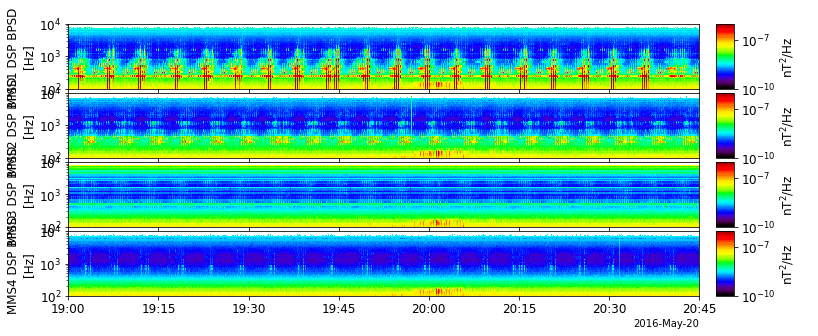

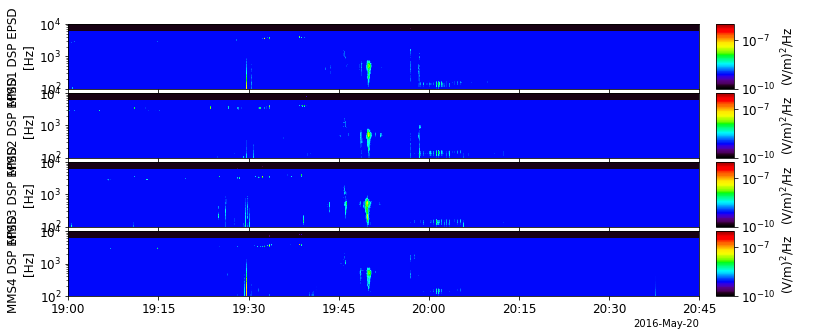

In [291]:


options('mms1_dsp_bpsd_omni_fast_l2','yrange',[100,1e4])
options('mms1_dsp_bpsd_omni_fast_l2', 'ylog', True)
options('mms1_dsp_bpsd_omni_fast_l2','zrange',[1e-10,1e-6])
options('mms2_dsp_bpsd_omni_fast_l2','yrange',[100,1e4])
options('mms2_dsp_bpsd_omni_fast_l2', 'ylog', True)
options('mms2_dsp_bpsd_omni_fast_l2','zrange',[1e-10,1e-6])
options('mms3_dsp_bpsd_omni_fast_l2','yrange',[100,1e4])
options('mms3_dsp_bpsd_omni_fast_l2', 'ylog', True)
options('mms3_dsp_bpsd_omni_fast_l2','zrange',[1e-10,1e-6])
options('mms4_dsp_bpsd_omni_fast_l2','yrange',[100,1e4])
options('mms4_dsp_bpsd_omni_fast_l2', 'ylog', True)
options('mms4_dsp_bpsd_omni_fast_l2','zrange',[1e-10,1e-6])


tplot(['mms1_dsp_bpsd_omni_fast_l2','mms2_dsp_bpsd_omni_fast_l2','mms3_dsp_bpsd_omni_fast_l2','mms4_dsp_bpsd_omni_fast_l2'])

#tplot('intensity')

tlimit(timechorus)
options('mms1_dsp_epsd_omni','yrange',[100,1e4])
options('mms1_dsp_epsd_omni', 'ylog', True)
options('mms1_dsp_epsd_omni','zrange',[1e-10,1e-6])
options('mms2_dsp_epsd_omni','yrange',[100,1e4])
options('mms2_dsp_epsd_omni', 'ylog', True)
options('mms2_dsp_epsd_omni','zrange',[1e-10,1e-6])
options('mms3_dsp_epsd_omni','yrange',[100,1e4])
options('mms3_dsp_epsd_omni', 'ylog', True)
options('mms3_dsp_epsd_omni','zrange',[1e-10,1e-6])
options('mms4_dsp_epsd_omni','yrange',[100,1e4])
options('mms4_dsp_epsd_omni', 'ylog', True)
options('mms4_dsp_epsd_omni','zrange',[1e-10,1e-6])
tplot(['mms1_dsp_epsd_omni','mms2_dsp_epsd_omni','mms3_dsp_epsd_omni','mms4_dsp_epsd_omni'])

#plt.plot(powertimes,power_column_avged_array)
# plt.plot(kepttimes,power_column_avged_array)
# plt.xlim([edge1,edge2])
# plt.plot([middle],[.0001],'.')

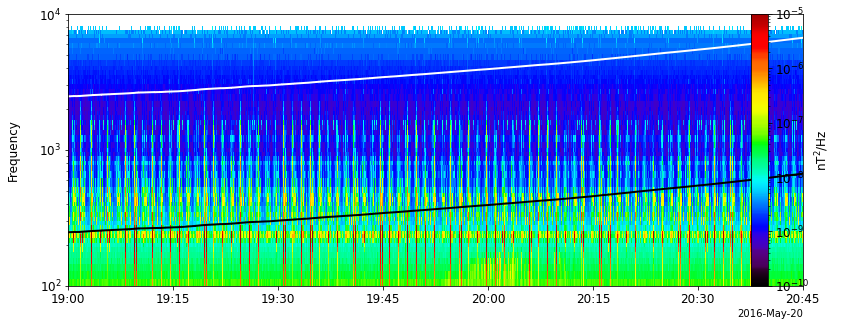

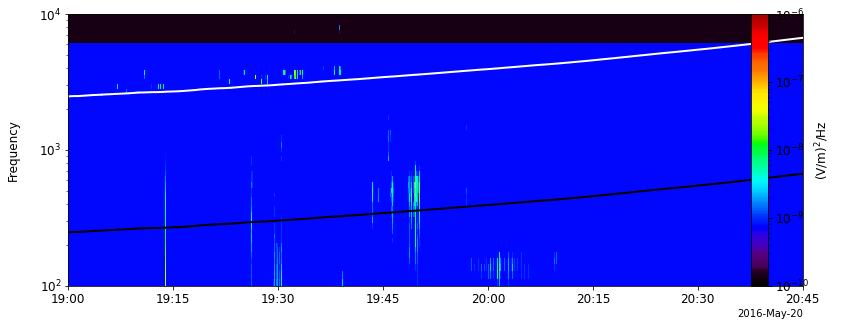

In [296]:
store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fceSlicelwr','fceSlice'])

options('psdwithfce', 'ytitle', 'Frequency')
options('fceSlice', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'yellow','white'])
options('fceSlice','color','white')
options('fceSlice','thick',2)
options('fceSlicelwr','thick',2)
#options('psdwithfce', 'legend_names', ['psd', 'fce'])
#tlimit(['2016-01-02/22:40:00', '2016-01-02/23:00:00'])
tlimit(timechorus)
options('fceSlice','yrange',[100,1e4])
options('mms1_dsp_bpsd_omni_fast_l2', 'ylog', True)
options('fceSlice', 'ylog', True)
options('mms1_dsp_bpsd_omni_fast_l2','zrange',[1e-10,1e-5])

#store_data('intensity', data={'y': power_column_avged_array, 'x': kepttimes})
tplot('psdwithfce')


store_data('psdwithfce', data=['mms3_dsp_epsd_omni', 'fceSlicelwr','fceSlice'])

options('psdwithfce', 'ytitle', 'Frequency')
options('fceSlice', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'yellow','white'])
options('fceSlice','color','white')
options('fceSlice','thick',2)
options('fceSlicelwr','thick',2)
#options('psdwithfce', 'legend_names', ['psd', 'fce'])
#tlimit(['2016-01-02/22:40:00', '2016-01-02/23:00:00'])
tlimit(timechorus)
options('fceSlice','yrange',[100,1e4])
options('mms3_dsp_epsd_omni', 'ylog', True)
options('fceSlice', 'ylog', True)
options('mms3_dsp_epsd_omni','zrange',[1e-10,1e-6])

#store_data('intensity', data={'y': power_column_avged_array, 'x': kepttimes})
tplot('psdwithfce')

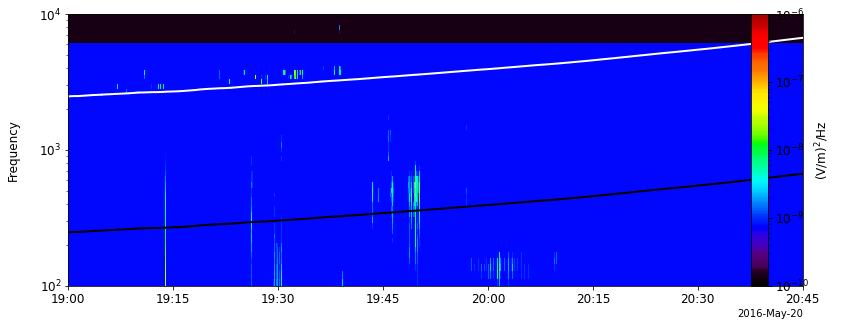

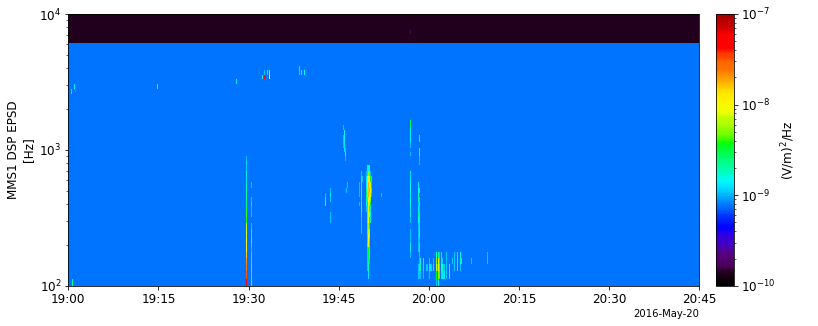

In [294]:
options('psdwithfce', 'ytitle', 'Frequency')
options('fceSlice', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'yellow','white'])
options('fceSlice','color','white')
options('fceSlice','thick',2)
options('fceSlicelwr','thick',2)
#options('psdwithfce', 'legend_names', ['psd', 'fce'])
#tlimit(['2016-01-02/22:40:00', '2016-01-02/23:00:00'])
tlimit(timechorus)
options('fceSlice','yrange',[100,1e4])
options('mms1_dsp_bpsd_omni_fast_l2', 'ylog', True)
options('fceSlice', 'ylog', True)
options('mms1_dsp_bpsd_omni_fast_l2','zrange',[1e-10,1e-5])

#store_data('intensity', data={'y': power_column_avged_array, 'x': kepttimes})
tplot('psdwithfce')
#tplot('intensity')

tlimit(timechorus)
options('mms1_dsp_epsd_omni','yrange',[100,1e4])
options('mms1_dsp_epsd_omni', 'ylog', True)
options('mms1_dsp_epsd_omni','zrange',[1e-10,1e-7])
tplot('mms1_dsp_epsd_omni')

#plt.plot(powertimes,power_column_avged_array)
# plt.plot(kepttimes,power_column_avged_array)
# plt.xlim([edge1,edge2])
# plt.plot([middle],[.0001],'.')

30-Apr-23 11:27:16: Loading pydata\mms1\scm\srvy\l2\scsrvy\2016\05\mms1_scm_srvy_l2_scsrvy_20160520_v2.2.2.cdf
30-Apr-23 11:27:29: Time clip was applied to: mms1_scm_acb_gse_scsrvy_srvy_l2
30-Apr-23 11:27:29: Loaded variables:
30-Apr-23 11:27:29: mms1_scm_acb_gse_scsrvy_srvy_l2


mms1_scm_acb_gse_scsrvy_srvy_l2_?_dpwrspc is currently not in pytplot.
mms1_scm_acb_gse_scsrvy_srvy_l2_?_dpwrspc is currently not in pytplot.


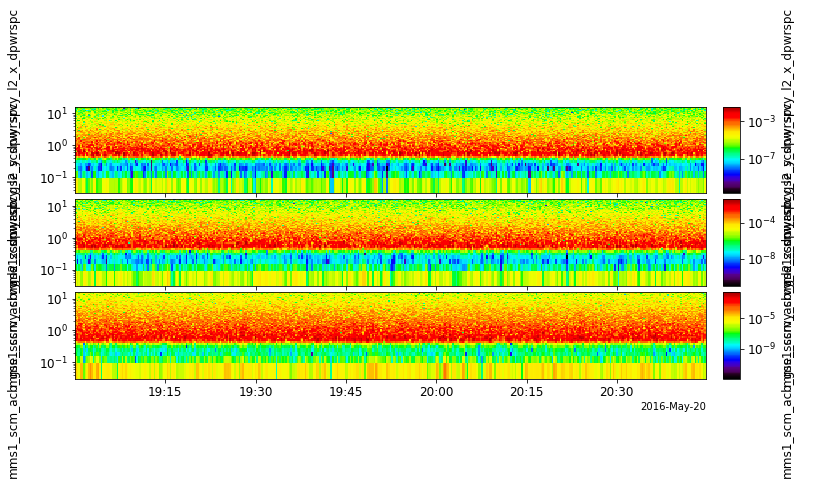

In [127]:
pyspedas.mms.scm(trange=['2016-05-20 19:00:00', '2016-05-20 20:45:00'], time_clip=True)


from pyspedas import tdpwrspc 
tdpwrspc('mms1_scm_acb_gse_scsrvy_srvy_l2', nboxpoints=512, nshiftpoints=512, binsize=1)
options('mms1_scm_acb_gse_scsrvy_srvy_l2_?_dpwrspc','zrange',[1e-5,1e-10])
options('mms1_scm_acb_gse_scsrvy_srvy_l2_?_dpwrspc','yrange',[0,10])
tplot('mms1_scm_acb_gse_scsrvy_srvy_l2_?_dpwrspc')

29-Apr-23 23:07:20: Loading pydata\mms1\mec\srvy\l2\epht89q\2015\10\mms1_mec_srvy_l2_epht89q_20151015_v2.0.0.cdf
29-Apr-23 23:07:20: Loading pydata\mms2\mec\srvy\l2\epht89q\2015\10\mms2_mec_srvy_l2_epht89q_20151015_v2.0.0.cdf
29-Apr-23 23:07:20: Loading pydata\mms3\mec\srvy\l2\epht89q\2015\10\mms3_mec_srvy_l2_epht89q_20151015_v2.0.0.cdf
29-Apr-23 23:07:20: Loading pydata\mms4\mec\srvy\l2\epht89q\2015\10\mms4_mec_srvy_l2_epht89q_20151015_v2.0.0.cdf
29-Apr-23 23:07:25: Loaded variables:
29-Apr-23 23:07:25: mms1_mec_dipole_tilt
29-Apr-23 23:07:25: mms1_mec_gmst
29-Apr-23 23:07:25: mms1_mec_mlat
29-Apr-23 23:07:25: mms1_mec_mlt
29-Apr-23 23:07:25: mms1_mec_l_dipole
29-Apr-23 23:07:25: mms1_mec_quat_eci_to_bcs
29-Apr-23 23:07:25: mms1_mec_quat_eci_to_dbcs
29-Apr-23 23:07:25: mms1_mec_quat_eci_to_dmpa
29-Apr-23 23:07:25: mms1_mec_quat_eci_to_smpa
29-Apr-23 23:07:25: mms1_mec_quat_eci_to_dsl
29-Apr-23 23:07:25: mms1_mec_quat_eci_to_ssl
29-Apr-23 23:07:25: mms1_mec_L_vec
29-Apr-23 23:07:25: mm

29-Apr-23 23:07:26: mms4_mec_v_sm
29-Apr-23 23:07:26: mms4_mec_quat_eci_to_sm
29-Apr-23 23:07:26: mms4_mec_r_gse
29-Apr-23 23:07:26: mms4_mec_v_gse
29-Apr-23 23:07:26: mms4_mec_quat_eci_to_gse
29-Apr-23 23:07:26: mms4_mec_r_gse2000
29-Apr-23 23:07:26: mms4_mec_v_gse2000
29-Apr-23 23:07:26: mms4_mec_quat_eci_to_gse2000
29-Apr-23 23:07:26: mms4_mec_geod_lat
29-Apr-23 23:07:26: mms4_mec_geod_lon
29-Apr-23 23:07:26: mms4_mec_geod_height
29-Apr-23 23:07:26: mms4_mec_r_sun_de421_eci
29-Apr-23 23:07:26: mms4_mec_r_moon_de421_eci
29-Apr-23 23:07:26: mms4_mec_fieldline_type
29-Apr-23 23:07:26: mms4_mec_bsc_gsm
29-Apr-23 23:07:26: mms4_mec_loss_cone_angle_s
29-Apr-23 23:07:26: mms4_mec_loss_cone_angle_n
29-Apr-23 23:07:26: mms4_mec_pfs_geod_latlon
29-Apr-23 23:07:26: mms4_mec_pfn_geod_latlon
29-Apr-23 23:07:26: mms4_mec_pfs_gsm
29-Apr-23 23:07:26: mms4_mec_bfs_gsm
29-Apr-23 23:07:26: mms4_mec_pfn_gsm
29-Apr-23 23:07:26: mms4_mec_bfn_gsm
29-Apr-23 23:07:26: mms4_mec_pmin_gsm
29-Apr-23 23:07:26: m

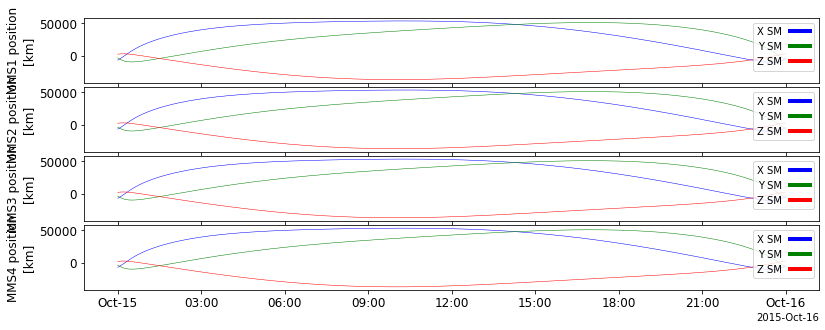

In [2]:
'BEGIN TESTING TIME SCALE'
# load in data

r = lambda x,y,z: np.sqrt(x**2 + y**2 + z**2)

#positions:
pyspedas.mms.mec(trange=['2015-10-15', '2015-10-16'], probe=[1, 2, 3, 4])
tplot('mms?_mec_r_sm')
from pytplot import get_data
data = get_data('mms1_mec_r_sm')
positions = data.y


In [13]:
#%% Find positions and angles

# find distance from the earth:

distances = []
angles =[]
#azs=[]
for i in np.arange(len(positions)):
    dist = r(positions[i,0],positions[i,1],positions[i,2])
    
    distances.append(dist)
    #angl = np.arctan2(positions[i,2],np.sqrt(positions[i,0]**2+positions[i,1]**2))
    angl = np.arctan2(positions[i,1],positions[i,0])
    angles.append(angl)
#     az = np.arctan2(positions[i,1],positions[i,0])
#     azs.append(azs)
# distance in data is in km
distances = np.array(distances)
thetaangles = np.array(angles)
#azimuthalangles = np.array(azs)

postime = data[0]
print(np.shape(data[0]))
print(postime[0:10])
# print(distances[0:10])
# print(len(thetaangles))
# print(thetaangles[0:10])
# print(thetaangles[-10:-1])
# print(max(thetaangles),min(thetaangles))
# #print(azimuthalangles[0:10])


posx =[]
posy = []
posz = []
#azs=[]
for i in np.arange(len(positions)):
    x = positions[i,0]
    y = positions[i,1]
    z = positions[i,2]
    posx.append(x)
    posy.append(y)
    posz.append(z)
    
# # B field at that point:
# B0 = 3e-5 #T
# R_s = 6.3e6 # R_e (m)
# Bfield = lambda r: B0*(R_s/r)**3
# Bfield = lambda r,angles: B0*(R_s/r)**3*(1+3*(np.sin(thetaangles))**2)
# Bdist = Bfield(distances*1e3+R_s,thetaangles)

# q = 1.6e-19 # charge 
# m_e = 9.1e-31 # mass of electron
# omega_e = q*Bdist/(2*np.pi*m_e)

# omega_e = 28*Bdist*1e9

print(posx[0:10],posy[0:10],posz[0:10])

(2880,)
[1.44486720e+09 1.44486723e+09 1.44486726e+09 1.44486729e+09
 1.44486732e+09 1.44486735e+09 1.44486738e+09 1.44486741e+09
 1.44486744e+09 1.44486747e+09]
[-6732.110431712925, -6553.570426956698, -6370.164717247793, -6181.97210414512, -5989.086231917524, -5791.613124255345, -5589.6743238692, -5383.403924042368, -5172.949018629032, -4958.467704304909] [-3419.1239673395435, -3639.5444821430897, -3857.263734576961, -4072.086781372177, -4283.821243735144, -4492.281069802856, -4697.284012291885, -4898.655519057542, -5096.228865650516, -5289.847181011268] [2340.9856620043965, 2391.126373263119, 2439.4314423536753, 2485.83972619963, 2530.2935063062164, 2572.739423000187, 2613.1281521749224, 2651.41529705682, 2687.5615430561984, 2721.533054094026]


30-Apr-23 00:54:01: Loading pydata\mms1\fgm\srvy\l2\2015\10\mms1_fgm_srvy_l2_20151015_v4.18.0.cdf
30-Apr-23 00:54:01: Loading pydata\mms2\fgm\srvy\l2\2015\10\mms2_fgm_srvy_l2_20151015_v4.18.0.cdf
30-Apr-23 00:54:01: Loading pydata\mms3\fgm\srvy\l2\2015\10\mms3_fgm_srvy_l2_20151015_v4.18.0.cdf
30-Apr-23 00:54:01: Loading pydata\mms4\fgm\srvy\l2\2015\10\mms4_fgm_srvy_l2_20151015_v4.18.0.cdf


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms4_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms4_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms4_fgm_rdeltahalf_srvy_l2 is currently not in pytplo

30-Apr-23 00:54:31: Time clip was applied to: mms1_fgm_b_gse_srvy_l2
30-Apr-23 00:54:36: Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
30-Apr-23 00:54:42: Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
30-Apr-23 00:54:47: Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
30-Apr-23 00:54:53: Time clip was applied to: mms1_fgm_flag_srvy_l2
30-Apr-23 00:54:53: Time clip was applied to: mms1_fgm_r_gse_srvy_l2
30-Apr-23 00:54:53: Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
30-Apr-23 00:54:59: Time clip was applied to: mms1_fgm_hirange_srvy_l2
30-Apr-23 00:55:07: Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
30-Apr-23 00:55:13: Time clip was applied to: mms1_fgm_stemp_srvy_l2
30-Apr-23 00:55:20: Time clip was applied to: mms1_fgm_etemp_srvy_l2
30-Apr-23 00:55:26: Time clip was applied to: mms1_fgm_mode_srvy_l2
30-Apr-23 00:55:26: Time clip error: No pytplot names were provided.
30-Apr-23 00:55:31: Time clip was applied to: mms2_fgm_b_gse_srvy_l2
30-Apr-23 00:55:36: Time cli

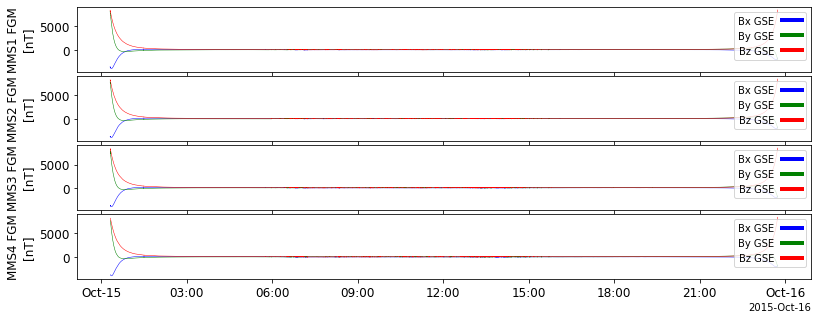

variable(times=array([1.44486721e+09, 1.44486721e+09, 1.44486721e+09, ...,
       1.44495360e+09, 1.44495360e+09, 1.44495360e+09]), y=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32))


In [53]:
#%% B field Data

## Burst data
# mms_fgm = pyspedas.mms.fgm(probe=1, trange=['2015-10-15', '2015-10-16'], data_rate='brst')

# tplot(['mms1_fgm_b_gse_brst_l2', 'mms1_fgm_b_gsm_brst_l2'])
# mms_fgm = pyspedas.mms.fgm(trange=['2015-10-16/13:05:30', '2015-10-16/13:07:30'], data_rate='brst')

# tplot(['mms1_fgm_b_gse_brst_l2', 'mms1_fgm_b_gsm_brst_l2'])

#######################################
# Survey mode FGM

#trange = ['2016-11-23', '2016-11-24']
trange = ['2015-10-15', '2015-10-16']
pyspedas.mms.fgm(trange=trange, data_rate='srvy', probe=1, time_clip=True)

# tplot(['mms1_fgm_b_gse_brst_l2_bvec', 
#        'mms2_fgm_b_gse_brst_l2_bvec', 
#        'mms3_fgm_b_gse_brst_l2_bvec', 
#        'mms4_fgm_b_gse_brst_l2_bvec'])
tplot(['mms1_fgm_b_gse_srvy_l2_bvec', 
       'mms2_fgm_b_gse_srvy_l2_bvec', 
       'mms3_fgm_b_gse_srvy_l2_bvec', 
       'mms4_fgm_b_gse_srvy_l2_bvec'])

#############################################
# dont want SCM for B field
# pyspedas.mms.scm(trange=['2015-10-16', '2015-10-16/3:00'], time_clip=True)
# tplot('mms1_scm_acb_gse_scsrvy_srvy_l2', xsize=12, ysize=5)

# from pyspedas.mms.mms_load_brst_segments import mms_load_brst_segments
# from pyspedas.mms.mms_load_fast_segments import mms_load_fast_segments
# from pyspedas.mms.mms_load_sroi_segments import mms_load_sroi_segments

# mms_load_brst_segments(trange=['2015-10-16', '2015-10-17'])
# mms_load_fast_segments(trange=['2015-10-16', '2015-10-17'])
# mms_load_sroi_segments(trange=['2015-10-16', '2015-10-17'], probe=1)


# from pytplot import tplot_names
# tvars = tplot_names()
# from pytplot import get_data
dataBfield = get_data('mms1_fgm_b_gse_srvy_l2_bvec')
# Bfield measurements from fgm
print(dataBfield)


In [55]:
# Calculate omegas
Bdist = []
Bdist2 = []
times = []
for i in np.arange(len(dataBfield[0])):
    if np.isnan(dataBfield.y[i][0]) == False:
        t = dataBfield[0][i]
        times.append(t)
        Bx = dataBfield.y[i][0] #B componets
        By = dataBfield.y[i][1] #B componets
        Bz = dataBfield.y[i][2] #B componets
        B = r(Bx,By,Bz)
        Bdist.append(B)
    Bx2 = dataBfield.y[i][0] #B componets
    By2 = dataBfield.y[i][1] #B componets
    Bz2 = dataBfield.y[i][2] #B componets
    B2 = r(Bx2,By2,Bz2)
    Bdist2.append(B2)
    
Bdist = np.array(Bdist)
omega_e = 28*Bdist

Bdist2 = np.array(Bdist2)
omega_e2 = 28*Bdist2

from pyspedas import time_string
timestamp = time_string(dataBfield.times)


In [57]:
#Bnans = r(dataBfield.y[:][0],dataBfield.y[:][1],dataBfield.y[:][2])
Bnans = dataBfield.y

omega_e_nans = 28*Bnans
for i in np.arange(len(dataBfield[0])):
        Bx = dataBfield.y[i][0] #B componets
        By = dataBfield.y[i][1] #B componets
        Bz = dataBfield.y[i][2] #B componets
print(omega_e_nans[100])
#print(omega_e_nans)

[nan nan nan]


30-Apr-23 01:46:24: Loading pydata\mms1\dsp\fast\l2\epsd\2016\05\mms1_dsp_fast_l2_epsd_20160520_v0.6.3.cdf
30-Apr-23 01:46:24: Loading pydata\mms1\dsp\fast\l2\bpsd\2016\05\mms1_dsp_fast_l2_bpsd_20160520_v2.1.4.cdf
30-Apr-23 01:46:25: Time clip was applied to: mms1_dsp_bpsd_scm1_fast_l2
30-Apr-23 01:46:25: Time clip was applied to: mms1_dsp_bpsd_scm2_fast_l2
30-Apr-23 01:46:25: Time clip was applied to: mms1_dsp_bpsd_scm3_fast_l2
30-Apr-23 01:46:25: Time clip was applied to: mms1_dsp_bpsd_omni_fast_l2
30-Apr-23 01:46:26: Time clip was applied to: mms1_dsp_epsd_x
30-Apr-23 01:46:26: Time clip was applied to: mms1_dsp_epsd_y
30-Apr-23 01:46:26: Time clip was applied to: mms1_dsp_epsd_z
30-Apr-23 01:46:26: Time clip was applied to: mms1_dsp_epsd_omni
30-Apr-23 01:46:26: Loaded variables:
30-Apr-23 01:46:26: mms1_dsp_bpsd_scm1_fast_l2
30-Apr-23 01:46:26: mms1_dsp_bpsd_scm2_fast_l2
30-Apr-23 01:46:26: mms1_dsp_bpsd_scm3_fast_l2
30-Apr-23 01:46:26: mms1_dsp_bpsd_omni_fast_l2
30-Apr-23 01:46:2

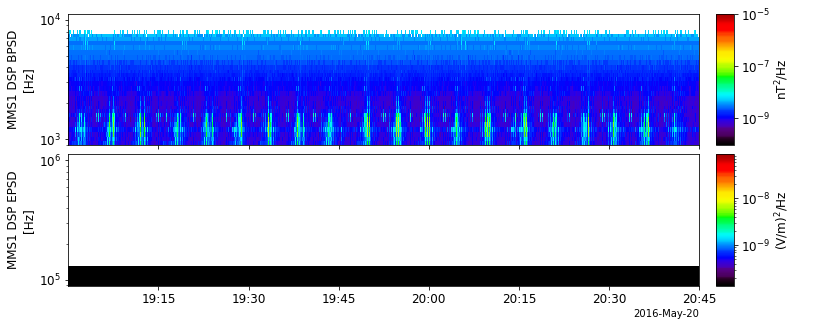

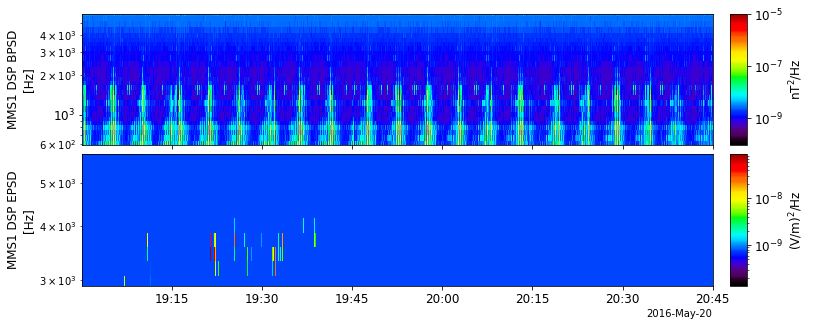

In [81]:

#%% load in fast PSD magnetic and electric plots example
from pytplot import options
pyspedas.mms.dsp(probe=1, trange=['2016-05-20 19:00:00', '2016-05-20 20:45:00'], datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)
#pyspedas.mms.dsp(probe=1, datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)

options('mms1_dsp_bpsd_omni_fast_l2', 'zrange', [1e-5, 1e-10])
tplot(['mms1_dsp_bpsd_omni_fast_l2', 'mms1_dsp_epsd_omni'])
from pytplot import get_data
metadata = get_data('mms1_dsp_bpsd_omni_fast_l2',metadata=True)
data = get_data('mms1_dsp_bpsd_omni_fast_l2')


options('mms1_dsp_bpsd_omni_fast_l2', 'yrange', [1, 40000])
options('mms1_dsp_epsd_omni', 'yrange', [1, 40000])
#y range is frequency 
# z range is the color bar
#tplot(['mms1_dsp_bpsd_omni_fast_l2', 'mms1_dsp_epsd_omni'], xsize=12)


lwrband = [0.1*omega_e,0.5*omega_e]
upband = [0.5*omega_e,1*omega_e]
avg_omega_e = np.mean(omega_e)

options('mms1_dsp_bpsd_omni_fast_l2', 'yrange', [.1*avg_omega_e, 1*avg_omega_e])
options('mms1_dsp_epsd_omni', 'yrange', [.5*avg_omega_e, 1*avg_omega_e])
#y range is frequency 
# z range is the color bar
tplot(['mms1_dsp_bpsd_omni_fast_l2', 'mms1_dsp_epsd_omni'], xsize=12)



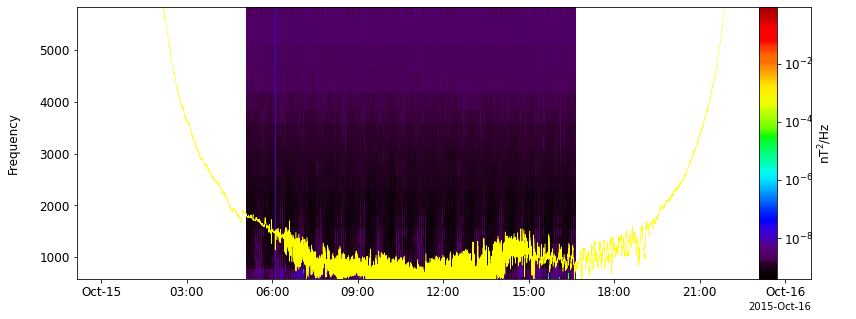

In [60]:
from pytplot import store_data
store_data('fcenans', data={'y': omega_e_nans, 'x': dataBfield[0]})
store_data('fce', data={'y': omega_e, 'x': times})
     
store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fce'])
options('psdwithfce', 'ytitle', 'Frequency')
options('fce', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'white'])
options('fce','color','yellow')
#options('psdwithfce', 'legend_names', ['psd', 'fce'])

tplot('psdwithfce')

In [34]:
'SCRATCH'
print(data[0])
print(data.y[200])
print(len(data[1]))
print(len(data.y))
print(len(times))
print(len(omega_e))
print(len(dataBfield[0]))
print(len(omega_e_nans[0]))

[1.44488553e+09 1.44488553e+09 1.44488553e+09 ... 1.44492721e+09
 1.44492721e+09 1.44492721e+09]
[4.0507790e-02 1.1574923e-03 2.7089277e-07 1.3391715e-07 9.0557307e-08
 6.0007082e-08 3.6397317e-08 2.4691799e-08 2.1240114e-08 1.8723938e-08
 1.3661434e-08 1.6344861e-08 2.5900196e-08 9.4728293e-08 4.5171871e-07
 1.4289311e-06 4.9460045e-06 8.9327468e-06 8.6961290e-06 7.8858857e-06
 5.2013411e-06 9.0295254e-07 6.4577996e-08 1.8162517e-08 1.3572582e-08
 4.0739607e-09 3.5752301e-09 4.5160582e-09 3.2774379e-09 2.1810145e-09
 2.5985762e-09 3.6895820e-09 2.2789393e-09 2.2575479e-09 2.3195030e-09
 2.4987634e-09 1.3695133e-09 1.5454121e-09 1.3395087e-09 1.3693655e-09
 1.0950770e-09 1.1387004e-09 1.3416724e-09 1.2995852e-09 1.2731166e-09
 1.4044278e-09 1.7567745e-09 1.7250530e-09 2.0777109e-09 1.8442985e-09
 2.5947897e-09 2.5533988e-09 2.6834457e-09 3.1693481e-09 0.0000000e+00
 0.0000000e+00]
20843
20843
1008330
1008330
1024822
3


In [138]:
'SCRATCH'
#timestampB = time_string(dataBfield.times)
print(timestampB[0])
print(timestampB[1])

# from tqdm.auto import tqdm
# import time 
# from time import sleep
# for i in np.arange(20):
#     time.sleep(0.1)
    
for i in tqdm(np.arange(0,5)):
    sleep(0.02)


#timestampB[0].hour
#print(dataBfield.times[1:10])
print(dataBfield[0])
print(dataBfield[0][0])
print(dataBfield[0][0]-dataBfield[0][1])
from pyspedas import time_datetime
type(time_datetime(dataBfield.times[0:10]))

#type(datetimeB)
#print(datetimeB[0].time)

# timesB = dataBfield[0] - dataBfield[0][0]
# print(timesB[0:10]) #seconds

# print(len(times))
# print(dataBfield[0][0]-dataBfield[0][1])
# print(times[5]-times[6])
# timesB = times - times[0]
# print(timesB[0:10])
# print(omega_e[100:110])

print(data[0][0])
print(time_datetime(data[0][0]))
timeslice = (times>=data[0][0]) & (times<=data[0][-1])
print(times[0]-data[0][0])
print(len(timeslice))
print(len(data[0]))



2015-10-15 00:00:12.218616
2015-10-15 00:00:12.343618


100%|██████████| 5/5 [00:00<00:00, 32.66it/s]

[1.44486721e+09 1.44486721e+09 1.44486721e+09 ... 1.44495360e+09
 1.44495360e+09 1.44495360e+09]
1444867212.218616
-0.12500214576721191
1444885525.8989708
2015-10-15 05:05:25.898971+00:00


-17197.79133272171
1008330
20843
666944


In [148]:
'ACTUALLY JUST SKIP THIS MESS'
#### Binning routine 
#timestampB = time_string(dataBfield.times)
#timesB = dataBfield[0] - dataBfield[0][0]
timesB = times - times[0]
omegas = omega_e

# times in omega array that overlap with times in psd:
timeslice = []
for i in np.arange(len(times)):
    tdiffi = times[i]-data[0][0]
    tdifff = times[i]-data[0][-1]
    if tdiffi >=0 and tdifff<=0:
        timeslice.append(times[i])
        
print(len(timeslice))

'##### bin energies per a set time period'
# tosec = lambda x: x.hour*3600+x.minute*60+x.second
bintime = 10*60 #secs
i=1
# initialsec = timeslice[0]
# maxtime = timeslice[-1]
maxtime = times[-1]
initialsec = times[0]
multiples = (maxtime-initialsec)/bintime
binned_omega = []
sumup_omega = 0
sumuptime = 0
binnedtimes = []
nextime = initialsec
for i in tqdm(np.arange(0,np.ceil(multiples))):
    m=0
    #sumup_omega = [0,0,0]
    sumup_omega = 0
    prevtime = nextime
    
    for n in np.arange(len(timesB)):
        secs = times[n]
        if secs>initialsec and secs<bintime+initialsec:
            sumuptime = sumuptime + times[n]
            sumup_omega = omegas[n]+sumup_omega
            
            
            m +=1
        elif secs< initialsec+ bintime*(i+1) and secs> i*bintime+initialsec:
            sumuptime = sumuptime + times[n]
            sumup_omega = omegas[n]+sumup_omega
            print(omegas[n])
            m +=1
    
    
    #print(sumup_omega, (sumuptime-prevtime))
    avgomega = sumup_omega/m
    print(m,avgomega)
    #print(avgomega)
    #print(avgomega,secs)
    nextime = secs
    timeinbin = .5*(prevtime+secs)
# Dont want to average the energy fluxes, want to sum them
    binned_omega.append(sumup_omega)
    binnedtimes.append(timeinbin)
    
    sleep(0.02)






666944


  1%|          | 1/141 [00:01<03:00,  1.29s/it]

4682 234902.0035882471
155585.65990732147
155563.26835848592
155541.44291413797
155517.77783206338
155493.48078540392
155470.47577983193
155446.3913958047
155422.90328970304
155398.7100671531
155375.01514630363
155351.04202689667
155326.7194887775
155302.0241766879
155276.57144595217
155252.19388719552
155228.48962935794
155203.66617833887
155178.38841224933
155154.16313904923
155129.14048964292
155104.81551765953
155080.00177296728
155052.7821107633
155026.56731570023
155001.96936785273
154976.50452823314
154950.19818064306
154926.20272815594
154902.1458177566
154878.23359454903
154854.42943634902
154830.18088718774
154806.2418681027
154781.3367087736
154756.71669920004
154732.54622353835
154708.0026028154
154684.4055323036
154660.01061389127
154635.3421710945
154611.72240093662
154587.4837778224
154562.8318054857
154539.00348920678
154514.99502589463
154489.96134924077
154465.49410366672
154441.84768803086
154417.8354738957
154393.46929664066
154368.7296587012
154345.12255155345
1543

115816.90639736022
115800.18681046732
115783.323660742
115766.85016653071
115749.27550986335
115732.94223480919
115716.38506990153
115699.33055722613
115681.72194615577
115664.63863068473
115647.84585712937
115630.37989102225
115613.76953106074
115595.37234885972
115578.167765219
115561.33153358767
115544.81209640554
115527.54934205828
115510.20776292242
115492.9553566537
115475.80880143616
115458.53757586883
115441.5040377548
115425.09163809507
115407.94763518633
115390.65891524979
115372.60713928577
115355.95506419147
115338.67509571787
115322.06169205136
115304.1241655986
115287.50244999793
115270.85517885172
115253.70345132565
115236.9258570085
115219.02822021356
115201.86819001852
115185.50885167817
115168.41804728552
115151.59566210966
115135.82479206199
115118.28437805863
115101.84803148237
115084.40807547761
115067.70224144851
115050.81941252787
115033.89432118072
115017.1194490357
115001.14435875381
114984.65470059677
114968.07342737715
114951.368707818
114934.95189964109
1149

89034.53324734338
89021.90404426254
89010.90011836006
88999.44375519328
88988.00563321161
88977.01811067648
88965.82775963205
88954.12635112696
88943.15395078273
88932.75323906704
88921.21860691106
88909.64099901014
88898.35456228915
88886.9920811217
88875.91429132484
88864.0395151884
88852.64897431372
88841.20262071634
88830.10292024628
88818.15007454636
88807.29092143103
88795.8055675795
88785.01779838775
88773.20975268292
88761.54579490193
88750.04902095447
88738.97179387226
88727.36343539268
88716.02978136293
88704.72974994488
88693.24305312923
88680.68057453359
88669.7071634711
88658.35882445284
88646.92042357642
88635.56595077759
88624.71752074493
88613.05120869527
88601.84005807604
88590.03931130306
88578.8508649862
88566.44243679535
88556.2614073214
88545.32669978875
88534.22614354827
88522.55569991432
88511.11834973267
88499.46235756243
88488.40173424521
88475.3910419441
88466.18263890587
88455.18226478966
88443.57048771514
88431.47296655446
88421.82534412408
88409.79695397415

  1%|▏         | 2/141 [00:03<03:41,  1.59s/it]

9482 172563.60369162943
79342.52302243857
79332.21790755786
79322.90353121633
79312.14995903136
79302.55822636123
79292.21893317254
79282.1480252404
79272.76608223305
79263.41337315048
79252.82252639672
79242.81129996735
79233.19349016856
79223.00489611531
79212.77987494317
79202.99250919573
79193.50929611627
79184.14539149386
79174.64150992982
79164.05422110707
79153.72155769628
79144.62747203636
79134.9353769852
79124.54143566957
79115.04287300467
79106.32867928183
79096.40275105742
79086.34396557536
79076.78529878239
79066.76179323776
79057.67658127652
79048.18362938719
79038.40575012418
79028.87515966115
79019.22799332195
79009.06659347407
78999.82578863551
78990.25465285544
78980.23901780792
78970.88616092502
78960.39297825203
78950.21680029236
78941.2507543603
78931.75438200287
78921.59188674287
78912.29075313924
78902.13100248906
78892.88033451728
78882.97976898374
78873.78312479984
78863.84647835232
78853.54608828854
78844.61283524208
78834.22205936094
78824.81547354494
78814.8

63707.163430575965
63699.61675711002
63692.38274902808
63685.3237109833
63678.224067367286
63670.676727191065
63662.44179849974
63655.292193745954
63649.02193566813
63640.52293132127
63633.85951374628
63625.89408373369
63619.056998162036
63611.84626021619
63604.585917769895
63597.1633751241
63590.26669551033
63581.60610513525
63574.912078444424
63566.57600974689
63559.38631900854
63551.405100562515
63544.63190141585
63537.73942402858
63530.56011898927
63523.04305084632
63515.66174283155
63508.133498984935
63501.411869230076
63493.95001276963
63487.00349922587
63479.597045650575
63472.67571044261
63465.89355205568
63459.030982468714
63452.359030583284
63445.07279306299
63437.81627424432
63430.79604025921
63423.49380268995
63416.966767851605
63410.27366614227
63402.73996483641
63395.01233410808
63388.97905486811
63380.610334408826
63373.68924952529
63367.83239349685
63360.55517286896
63353.46538590882
63346.50608467938
63339.14914749846
63332.455261306575
63325.420569002585
63317.9908724

49360.4558397225
49355.31852913448
49350.64018533066
49345.88170146336
49340.5122544537
49335.01167063589
49330.613210930176
49325.775094487304
49320.84207623247
49315.124981446235
49310.380801492895
49305.3995406955
49299.477426477315
49294.096780015185
49290.55339438709
49285.03854673893
49280.77065815574
49275.58684301212
49269.52754713697
49264.5334964388
49260.06787452765
49254.3926890407
49249.77616306805
49244.21885892289
49239.30687564523
49234.42705763756
49229.46246036763
49224.67324891097
49219.58898839835
49214.44216059024
49209.315751867114
49204.010298541936
49198.763878144106
49194.15983785858
49189.33916072576
49184.116758688426
49179.392603547334
49174.06367989442
49169.69215438285
49164.907074229544
49158.59170769805
49153.85958584229
49148.56531762692
49143.31268081003
49138.33737059715
49133.78973586887
49129.283227503416
49124.05596614856
49119.89181035935
49114.57144348188
49108.9436870235
49104.86685152454
49099.43647547456
49093.964864385984
49089.67667737929
49

  2%|▏         | 3/141 [00:04<03:52,  1.68s/it]

9482 146829.40670645438
46577.987841415976
46573.27430023067
46568.80183246439
46563.49690705011
46558.04576258856
46552.72106494879
46547.61309391851
46543.643030195584
46538.27354996896
46534.26888802067
46529.55114395188
46524.762213647555
46519.664131704405
46514.89440119376
46510.71702172855
46506.274692014216
46500.54097227145
46496.06585372077
46492.10391988889
46487.5944699721
46482.68698055276
46477.93502487849
46472.093563683644
46467.231158084156
46463.08367576901
46458.485139613156
46454.07279362803
46450.255312777124
46445.66649885121
46440.33689583736
46435.86590992724
46430.80709834881
46425.17197701565
46421.15494808213
46416.737285163974
46411.86405205187
46407.25118438933
46402.99759584577
46398.62484051655
46393.81914991199
46389.395034078574
46384.11590447781
46379.96463257525
46376.110936047146
46370.003123503004
46364.82194536426
46359.81122149003
46356.16658456384
46351.70625581494
46347.19622520275
46343.58237253118
46337.801530125704
46332.93906273127
46329.211

40031.60618409146
40027.919015793865
40024.65483715566
40020.169707606045
40015.913045204696
40013.12429695454
40008.58123389509
40004.82826846413
40000.70957709836
39997.24702135731
39993.21117451744
39990.181495051285
39985.8994644
39982.07440711066
39979.450104129995
39975.255287230575
39970.90434625715
39966.35925587993
39962.96911992954
39958.73121147954
39955.952437208616
39952.46175168721
39948.12110169757
39944.63681848746
39940.4196946005
39936.88116505848
39933.36020412086
39929.02339039724
39925.494868712296
39921.12182259282
39917.03334016199
39913.98536273048
39910.63151309047
39907.09993872915
39902.30918248307
39898.90204117639
39895.691476995
39891.53001867876
39888.12769571176
39884.83608951645
39881.84021393965
39878.69266825603
39873.93800379622
39869.85019439085
39866.41503232082
39862.612696781965
39858.973648371015
39854.94924332958
39851.44857557301
39847.212906345616
39842.56899861616
39840.021840800575
39836.21740903397
39832.20062863772
39828.00403888372
39823

35361.97147014051
35358.748722143966
35355.1754077474
35352.08327285129
35348.63756525937
35345.859085761265
35342.833949059175
35339.52537197971
35336.98381019888
35333.733755156616
35330.20358673627
35327.0001492564
35324.02680285148
35320.76739569939
35317.434348634015
35313.64598918134
35310.00030502461
35306.64428829112
35303.365201647364
35300.13248445079
35297.925152338015
35294.337390254776
35290.556087945726
35287.281250880565
35284.2506091856
35280.77832638762
35278.033169319344
35274.01347051592
35271.28500289853
35267.75002550623
35264.693267670154
35261.29412009554
35257.57631229176
35255.00324939229
35251.646994113355
35248.293865249834
35245.78198706496
35242.49397798509
35239.129779258736
35236.205927604264
35232.877394189396
35229.58690903185
35226.62312402877
35223.462860023465
35219.79558219549
35215.58675926175
35212.522119717105
35210.15235777217
35207.1592830371
35204.11712748067
35200.47555431489
35196.89113779324
35194.11394269298
35190.62273813883
35187.5771069

30970.323871382905
30967.546080678556
30964.954009675268
30961.764759730595
30959.705686057274
30955.855182874104
30953.85956496654
30952.72750510932
30949.074338824645
30946.68745069522
30945.09445907599
30940.982635760396
30939.083771901074
30935.67252674592
30933.53611215497
30931.295789191114
30928.285443369805
30925.403088543055
30923.585209281227
30920.82320277496
30918.14410766827
30915.7162179471
30912.979968026448
30909.72186641056
30906.913713303802
30904.642368945337
30901.538423921553
30899.310049647385
30896.84932943211
30894.054217867208
30891.74274703693
30889.48637796237
30887.136909736477
30884.5970930353
30882.373658258326
30879.463861347613
30876.547994150744
30873.866590950718
30871.331211840756
30868.675015744582
30866.921125667974
30863.960065940842
30861.587027712983
30858.571596890735
30855.318031047784
30853.34109530138
30850.457045575273
30847.97193298792
30845.399832593
30842.37652157347
30839.724334762224
30837.438909411216
30835.521435426366
30832.236620152

  3%|▎         | 4/141 [00:06<04:04,  1.78s/it]

9482 134958.23041012726
30044.278498849715
30041.470558136378
30038.910770274968
30037.491456638912
30034.7192737801
30032.27524823971
30029.365381727526
30026.963762235086
30024.628887087103
30021.335287451264
30019.08581389651
30017.021395486838
30013.421013464278
30010.75218329201
30008.770035855137
30006.25053407381
30003.341609102157
30001.06288424213
29998.46105838418
29996.486591851623
29993.718231407394
29990.796270373583
29987.939611071066
29986.302404542323
29983.2348700316
29980.245023231204
29978.070023825112
29975.657469131707
29973.2971317657
29971.036753690612
29968.23160425313
29965.335504491988
29963.300959564276
29960.72074024168
29958.57644032273
29955.601938802196
29953.466571425462
29950.071966627358
29947.297373168836
29945.445789007077
29943.58529354026
29940.593511891497
29937.928135996488
29935.28910610444
29932.560887170555
29929.820895873116
29926.990375146706
29924.408676806277
29921.376928409798
29919.254781196116
29916.61335270425
29914.887788482865
29912.

25811.204128578487
25809.39334658625
25807.04947555635
25804.941412609754
25802.42830997178
25800.44574099204
25797.868343686074
25795.952982497463
25794.39678157425
25792.23337746227
25790.154022679588
25787.8773362908
25786.29289545768
25784.048123904737
25782.067701573815
25780.36934220115
25778.554172027067
25775.633169568537
25773.33805931064
25770.935068104
25769.353924969033
25766.788181168424
25764.87970142786
25763.752350596722
25761.58809799046
25759.331870473055
25757.343843517247
25755.37778313572
25753.060525485314
25751.153027018387
25749.331851657524
25747.569399178017
25745.115295944644
25742.769065757817
25741.23066321385
25739.38768940657
25737.341861142115
25734.9000128483
25733.149662692795
25731.36892107191
25729.235407995697
25727.197907743946
25725.105842481484
25723.269349657454
25721.54757726185
25719.38263898197
25716.656393173238
25715.205432613657
25713.700152748363
25712.22541670339
25709.674229892848
25706.813449413596
25705.1109589791
25703.553504445656
2

22125.419963280154
22123.68715746244
22121.812269059
22120.302472910043
22118.625249728357
22117.14212040792
22115.5053616302
22113.573999829925
22112.29977412755
22111.3691820589
22109.60593174494
22108.54225829725
22106.669276365123
22104.904322683557
22103.622049968013
22102.246757522622
22100.903600295827
22099.240001951373
22097.460217244072
22096.097795985865
22093.978554008587
22092.87834248502
22091.078360570158
22090.18972047169
22088.40467478989
22086.76827194344
22085.036221989227
22083.036570325312
22081.311110770053
22079.842952938023
22078.67826510474
22076.297737400728
22074.901856029803
22073.450145154377
22072.4397068928
22070.835884588854
22069.917540531336
22067.725391489286
22065.704233099703
22064.53806938971
22062.984168334766
22061.24528157666
22059.93539008356
22058.265161061896
22056.79473840726
22055.200981560527
22053.541896053463
22051.776072039716
22050.19624721321
22048.85455641713
22047.231948902496
22045.735644869703
22043.777694280914
22042.404980853098

  4%|▎         | 5/141 [00:08<03:52,  1.71s/it]

9482 128652.01233734627
20872.374667752352
20870.901746550866
20869.38108145606
20868.403973895012
20867.071892427895
20865.280968252704
20863.836849272462
20863.563532059765
20861.328603992963
20859.420518433566
20858.93409186312
20857.522362531323
20856.48418771062
20854.207047953445
20853.366420272705
20851.77624267612
20849.571058395504
20848.36656910565
20846.866150742724
20845.521462128854
20843.950622661607
20843.043538000282
20841.35626607914
20839.66032591489
20837.973542108935
20836.313624729155
20835.51503223368
20834.314318828023
20832.0417674328
20831.03074154473
20829.94323670982
20828.51644729021
20826.95795700646
20825.90896191819
20824.11044431466
20822.410064179276
20821.299635235628
20819.645540634927
20816.903868908747
20815.41237691098
20815.02374578169
20813.07230084394
20811.972746434105
20809.71625231815
20808.575361853444
20806.763289471975
20805.192306535566
20802.902081792246
20801.979807180327
20800.67454857932
20798.98184330132
20797.710505299852
20796.4023

18532.407965546146
18530.87735358128
18530.25080406366
18529.105573096513
18528.08472394717
18526.838059535734
18525.87198456452
18524.560464569724
18523.502892020508
18522.32702695601
18521.444762924613
18520.012511300076
18518.59308069452
18517.96430970416
18516.53696136899
18515.043391564817
18513.65918419831
18512.028012559756
18510.960394309543
18510.13639357373
18508.690004615593
18508.460522952282
18507.523959580998
18505.906991671458
18504.729674824637
18503.88877681259
18501.70431460088
18500.507136182438
18499.294391325104
18498.434731976653
18496.95638444206
18496.058173604386
18494.845229453098
18493.445929258436
18492.543001634043
18492.31698144588
18491.340488375485
18489.35417264232
18488.12939679703
18487.696578504347
18485.82817296328
18484.670588993424
18483.478062803144
18482.302091051824
18481.51094301267
18480.31153594312
18478.115897176503
18477.257606764382
18476.107831553236
18475.182789865306
18474.097442664333
18472.973747900414
18471.243132055708
18470.937462

16376.195830380837
16375.236669146081
16374.442078254073
16373.731593282833
16372.733617517224
16371.87595538958
16371.542573471408
16369.943516741954
16368.919708095858
16367.53504667516
16367.659208381065
16367.153209329408
16365.421002978286
16364.196053288135
16363.63328132713
16362.436220183465
16361.180652942034
16360.12996959212
16359.135901639938
16358.716098651172
16358.148386609037
16356.465450540549
16354.789509292736
16354.86595109638
16353.651709033331
16352.17218214483
16351.398228600916
16349.828314347751
16349.204745025678
16347.969989402798
16346.299803849937
16345.689397114347
16344.879649580158
16344.077545520158
16342.82766484794
16342.04690303727
16340.694383554977
16340.31853073016
16339.21212720333
16337.561996949295
16336.844787854077
16336.24592143941
16334.814787277162
16334.155846976777
16333.2596838821
16332.391796639158
16330.99840521227
16329.842853401762
16329.445849273285
16327.591093184934
16327.415082365795
16326.180283139664
16324.922446452925
16324.0

  4%|▍         | 6/141 [00:10<03:53,  1.73s/it]

9482 125079.04549061465
15452.023201836975
15450.921642015383
15449.76596819176
15449.398967410285
15448.337415834809
15448.19389862125
15446.55948474527
15446.288960651606
15446.041735431312
15444.996606627112
15443.88177619866
15442.746072091915
15441.230777212488
15440.46731311232
15438.91212361923
15438.793611248826
15438.089149658359
15436.600659638028
15435.860274388222
15435.556428886142
15434.727926052516
15433.768722005872
15432.484704016037
15431.542446009546
15430.26581414442
15429.883237514907
15428.56818461705
15427.820073551007
15427.011520996397
15426.71797443138
15424.91866478122
15424.120583981588
15423.357778274672
15422.205474684393
15421.528393798033
15420.395597418636
15419.374412268175
15418.228078330609
15417.805777893758
15416.746991026022
15416.2460322109
15415.298864634542
15414.189563148571
15414.065262464217
15412.844290150453
15412.44452251969
15410.994455893366
15409.874243644406
15409.200287526428
15407.841155525508
15406.742703736141
15405.86101349226
15

14194.014951634239
14193.56088668289
14192.513596165938
14191.139478173889
14190.559351756587
14189.477563845228
14189.482316618349
14188.432308875424
14187.237676998815
14186.920289357147
14186.22692596994
14185.30361216065
14184.52638271716
14184.112459909029
14183.078057085357
14181.81630106976
14180.892034701948
14179.646424217332
14178.994989172295
14178.556692962202
14178.016856844575
14177.382777005914
14176.908333746074
14175.557221227686
14174.488218856955
14173.45648338318
14172.572752109732
14171.70996062894
14170.964579270967
14170.435421754853
14169.343547181814
14168.799046475808
14168.281333993971
14167.629236803798
14166.612501525915
14165.731076778284
14165.019578930121
14165.035371007853
14163.8763767479
14163.126577376
14162.422239818363
14161.16101499642
14161.012770555119
14160.439452109078
14159.20142398096
14159.467952944895
14158.268684920193
14157.009049046308
14156.255670584524
14155.617338094722
14154.904080550086
14154.465921717481
14153.780819158343
14152.9

12540.659923277062
12539.915626170023
12539.551095573821
12538.467342048949
12537.549292721113
12537.184818562502
12536.630077771952
12535.910584240582
12535.6012989525
12534.52148339492
12533.41515673836
12533.070124099248
12532.725728849922
12532.0918606128
12531.193098480408
12530.987264820194
12530.429296150825
12528.778353867292
12528.707134867469
12528.434588310787
12527.722887295755
12528.038018356254
12526.439126355355
12525.256678624877
12525.263792225122
12524.688335484814
12523.397117330289
12523.09920113769
12522.282961099172
12521.707025701928
12520.840867959307
12520.041527797392
12520.119614347585
12519.90366428259
12519.1408680776
12517.701181657747
12517.74961431273
12516.697808480467
12516.065797296564
12514.891624547623
12514.90854700598
12514.258795852387
12512.718471580665
12512.31663619824
12512.085285448724
12511.209432382504
12510.39192627487
12509.708512742234
12508.383051859704
12508.008316366644
12506.973419238464
12506.492249777599
12505.597064742955
12504.7

  5%|▍         | 7/141 [00:11<03:53,  1.74s/it]

9482 122856.5840318261
11924.250340164552
11924.650324351509
11923.828076851161
11923.300675828927
11922.791543705447
11922.14814238439
11921.175538864087
11919.876528543075
11919.186041910285
11919.423902030598
11918.281518186719
11917.710041537553
11917.040804700928
11916.74416875034
11916.935435708909
11916.343408363113
11915.288698850303
11915.329948543553
11914.681615450225
11914.587161302941
11914.109778681554
11914.063225996924
11913.013225752944
11912.796756748612
11912.24037303812
11911.19788848645
11910.542404373602
11909.100211897417
11908.43699977106
11908.167076453847
11907.737728169375
11907.483907664999
11906.503779390265
11906.591437616358
11905.886873673724
11904.87929121182
11903.948682740742
11903.687383315184
11903.20352788332
11902.766253337277
11902.831994180255
11901.851997519245
11901.20488038902
11900.933481275608
11899.809041683797
11898.834930654302
11899.097553074398
11898.192257366465
11896.794372427721
11896.766194804415
11896.267399080152
11895.2631877004

11007.858711520836
11007.42230922971
11006.921643298037
11006.319467725783
11005.737734959917
11005.402021731628
11004.547077138193
11004.236690158044
11004.032114271206
11003.33375588415
11003.31383911803
11002.287882899205
11001.894906997284
11001.549658485059
11000.942670959248
11000.209489146902
10999.673942320453
10999.38784888181
10998.670378973811
10998.187568784253
10997.621256510309
10996.984392513408
10996.437089745574
10995.607496615292
10995.09955502705
10994.475044337389
10993.710571170492
10993.391980884391
10992.415674267859
10992.156415908172
10991.649551237257
10991.272054829604
10990.451248803889
10989.349893481409
10989.453040664916
10988.498463074724
10988.069068856397
10987.33087295616
10986.983403755465
10986.783657072254
10986.087398055988
10985.432090098177
10984.630274254505
10983.986020672506
10983.695334282069
10983.06108866876
10982.387280332285
10981.669390416564
10981.448697577182
10980.479549714002
10979.866508316625
10979.263364845365
10978.223862326691


10045.724614394261
10045.862930705782
10045.447717799734
10045.234318406545
10045.018974736824
10044.601747054963
10044.534364373405
10043.703136837066
10043.015495632897
10042.780012506035
10042.26276391542
10041.725181969838
10041.85733007211
10041.076342111724
10040.525234810882
10040.825833339431
10040.543301176162
10039.908861094025
10039.311604697883
10038.877305637647
10037.963884792653
10037.95119380438
10037.436562901994
10037.041196136837
10036.584792787322
10036.16393029993
10035.850762519205
10035.811785095122
10034.944174034334
10034.051357722723
10033.626189802068
10032.592762891854
10032.154182852828
10032.053053420943
10031.598347023237
10031.306702911179
10030.60753701266
10030.112391645449
10029.42356388991
10029.00701468026
10028.887656503419
10028.430410286028
10027.73253478415
10026.866249756522
10026.454839419692
10026.091230563332
10025.655546888804
10025.231312126672
10024.525432511542
10023.977690368978
10023.383452684751
10022.850964051708
10022.137690325513
1

  6%|▌         | 8/141 [00:13<03:55,  1.77s/it]

9473 121503.73886007899
9591.837879252436
9591.482149294141
9591.201498669101
9590.17087056247
9590.207000498103
9589.826869099004
9589.272518162546
9589.210237836196
9589.064986291807
9588.713821834055
9588.357174484434
9587.305444666486
9586.928673863691
9586.28560980571
9586.154736110358
9585.929438243387
9585.39964054284
9584.986009163751
9584.393782667945
9584.095085965258
9583.30587758053
9582.869245352178
9582.696060997374
9582.317451884453
9581.690267666454
9581.155758526884
9580.784664804552
9579.85223717924
9579.173298183285
9578.70586511834
9578.52814478306
9577.960495033623
9577.614708671359
9576.745983275752
9576.328261491086
9575.882529821456
9575.174426985091
9574.920892564547
9574.496559314495
9573.70427258371
9573.287200931214
9572.823863935764
9572.167335673827
9571.529696797006
9571.154189239436
9570.79359410354
9570.122675857881
9568.951256614906
9568.722720100388
9568.207851311407
9567.55334856973
9566.941843906752
9566.308116075103
9565.786231693783
9565.350590671

9042.991529589512
9042.862569199162
9042.518050952218
9041.655272185602
9042.062940102294
9041.708219234803
9041.541465926073
9040.988166439905
9040.232407077772
9040.265915495365
9039.750040386807
9039.149140742891
9038.866979683538
9037.814521255466
9037.497071900132
9037.282827198667
9037.360494792414
9037.169177484438
9036.368571476232
9035.978789251116
9035.612043910067
9035.171043492226
9034.686772134486
9034.618259738072
9033.98642662636
9033.354025120609
9032.811382916554
9032.452966639465
9031.712753633905
9031.456886769107
9031.176224415656
9030.549914581727
9030.15321372309
9029.712820273378
9029.081435468917
9028.936121385892
9028.242002156332
9028.052137357306
9027.52746857919
9027.005154533865
9026.554566789828
9026.146350922103
9025.809617155066
9024.768969858067
9024.752995655068
9024.34842189532
9023.547413977718
9023.686308407443
9023.034008554767
9022.387920965644
9022.317347865774
9021.527533411107
9021.011443042149
9020.314739378291
9020.093377847774
9019.889849605

8383.557728474565
8383.306764101191
8383.196724491161
8382.53739443923
8382.302706690827
8382.197838095799
8382.368205432831
8382.220786759177
8381.980456890764
8381.255585010029
8380.792767629802
8380.843815548185
8380.118659651938
8380.67111448373
8380.740565847267
8380.244801764038
8379.73550675968
8379.17187096547
8379.101018204863
8378.492746808217
8378.262384942193
8377.947125462602
8377.169889181454
8376.99228963429
8376.893769961089
8376.428357682427
8376.122821960176
8375.984398101333
8375.302826522879
8374.955123853018
8374.44676661998
8374.141253460077
8373.480482207755
8373.08424486734
8373.218182861372
8372.781967162815
8372.763956690338
8371.99987257018
8371.644866603663
8371.013367021964
8370.567095343686
8370.177879075114
8369.841617402444
8369.725831181391
8369.452190638507
8368.982437307986
8368.531926194722
8368.417401970944
8367.457698920545
8367.115969720378
8366.6377611583
8366.661629401315
8366.281887071214
8365.748644130732
8365.18366489935
8364.758232903187
836

  6%|▋         | 9/141 [00:15<03:57,  1.80s/it]

9482 120410.00461017378
8011.479347761817
8011.316654423881
8011.572783911206
8011.281438615872
8011.093637692055
8010.737346666749
8010.948362104428
8010.2683814722
8010.1617622899175
8010.344551310214
8009.752985031809
8010.093968680627
8009.595483049277
8009.173053614741
8009.228053158071
8008.853055669101
8008.53956893814
8008.622009378787
8008.364519821166
8007.777124698609
8007.628019923265
8007.192790721851
8007.281988900009
8007.127236753434
8006.542937614442
8006.289831911
8005.219951447281
8004.818383980552
8004.49611028232
8004.181103061596
8003.974841022786
8003.740632455365
8003.603132859567
8003.240834480427
8003.1314711374
8002.700072008204
8002.0995390027
8001.765943230036
8001.224290952327
8000.9679943969
8000.676702997125
8000.467200466087
8000.2144452737175
7999.646652574087
7999.819634184009
7998.96803616692
7998.166735094497
7998.106431196226
7997.789556710055
7997.604027010244
7996.655638945646
7996.547541966675
7996.1152049506845
7995.543950071357
7994.9129048546

7718.221873047012
7717.767173748263
7717.470837611161
7717.2273569609815
7716.686459067091
7716.488565772423
7716.313430818266
7716.336062639537
7715.65566201847
7715.407248742866
7715.446066202077
7714.6643663835675
7714.27398636198
7714.523613156489
7714.24796437809
7713.764051084403
7713.300460606694
7712.936406066773
7713.003692547005
7712.265778330793
7712.037853512236
7711.802756033671
7711.859083705444
7711.66559714182
7711.000220102707
7710.618955480762
7710.07455157957
7709.32154417015
7708.994809434105
7709.387594585254
7709.057430299881
7708.437776842625
7708.224605924281
7707.923487717154
7707.536375452136
7707.085708632518
7706.9408254936825
7706.41674798321
7705.827506817528
7705.408299263695
7705.138113781402
7704.722221014313
7704.667315487066
7704.395311599497
7703.884120491834
7703.480305338437
7702.6608576707295
7702.754049914767
7702.1454667924
7701.412944177936
7700.983498271061
7700.980709839283
7700.407718288886
7700.123292435597
7699.667344388435
7698.7855377968

7225.371963956914
7224.89554301791
7224.827078814312
7224.91141074939
7224.583273289778
7225.002305274238
7224.721864633297
7224.836370205459
7224.094742971698
7223.660158431753
7223.977096742354
7224.118193611963
7223.6186359598
7223.49652864322
7223.623963350317
7223.170900706169
7222.755591396754
7222.674724997505
7222.462965446162
7222.806110666616
7222.141802039723
7221.8376021861795
7221.9391943869605
7221.644630809555
7221.181822438938
7221.142924073625
7220.465399012495
7220.461520509465
7220.329520500559
7220.27640777065
7219.797413119555
7219.67354118912
7220.0571885019235
7219.22071622899
7218.860415320514
7218.694430894006
7218.262776417536
7217.867984114405
7217.896111667439
7217.418075077881
7217.274203971313
7216.796525116586
7216.586136866762
7216.197598945052
7216.175953916873
7216.0925855787245
7215.864523217148
7215.78345226707
7215.5168947642405
7215.691606660763
7215.059679735186
7214.339046178794
7213.770362275447
7213.66624210777
7213.469041352272
7213.0170950511

  7%|▋         | 10/141 [00:17<03:57,  1.81s/it]

9482 119735.36860399519
6854.640806409607
6854.463668262531
6854.657434489253
6854.726812381967
6854.166602424875
6853.916241129381
6853.743148820078
6853.771225990373
6853.538669617894
6853.609427608204
6853.815840534386
6853.214261572796
6852.840883478346
6853.023815505954
6852.876792846059
6852.4041557225455
6852.385794330126
6852.187052498624
6851.620019727079
6851.48372486398
6851.744862401389
6851.46427494416
6851.269802566417
6851.347872730997
6850.724427232762
6850.417020526463
6850.833383455261
6850.149517491691
6850.39949344563
6849.975831905943
6849.7583498272
6850.043952513163
6849.757170593366
6849.339764639153
6849.390004304009
6848.872664135906
6848.474409718851
6848.766896551352
6848.616957585445
6848.107269816479
6847.809434110743
6847.205744443711
6847.1029899204495
6846.9522615982805
6846.104242147893
6845.749012617215
6846.463001134454
6845.621750485335
6845.5300576416375
6845.118090632091
6844.640825284139
6844.675509307286
6844.088472742105
6843.813966738685
6843.

6614.641636004709
6614.508253543091
6614.042185490373
6613.594349468518
6613.225453160338
6612.821717868505
6612.334856861768
6611.866219623311
6611.902491216174
6611.7636973483
6611.447997437436
6611.524399444139
6610.813111034965
6610.654063219948
6609.975446795304
6609.631718163664
6609.465405489674
6608.940100038427
6608.518249661554
6608.482217926147
6608.051281831851
6607.575183452045
6607.048927268565
6606.882668798868
6606.6708800693705
6606.605781169937
6606.596507053832
6605.93430872707
6605.757198888734
6605.716392801562
6605.3624304090845
6605.12011594398
6605.134843316473
6604.857345694088
6604.738722275912
6603.9509857941875
6603.656277800183
6603.678881215374
6603.401996163858
6603.217965318058
6603.328643805228
6602.783269189639
6602.348736458121
6602.284615746965
6602.54148506435
6602.43991414321
6602.137189946644
6601.695318249547
6601.870533823074
6601.30679995862
6601.107407727602
6601.201333889185
6601.090968204519
6600.93339250765
6601.048127369103
6600.8623840154

6230.934531772932
6230.820132385718
6230.817084506482
6230.612062096582
6230.170201388526
6230.373222642618
6230.4418403247
6230.135574454898
6230.245862047086
6230.312056312095
6229.760862091918
6229.244001355827
6229.406827728984
6229.587364742852
6229.305416781202
6229.637105791664
6229.378211487754
6229.095510200353
6229.146799858895
6229.1731083309505
6228.766867305191
6228.7184465144
6228.19271907146
6227.948494723283
6228.584427761018
6228.434512744036
6228.102810990984
6228.831504366148
6228.466433003166
6228.407127542892
6228.4461059604755
6227.595414264566
6227.623511796122
6227.560889755792
6227.2008305416675
6227.528736826759
6227.454508128807
6227.112769414726
6226.965896135842
6226.699460352436
6226.917338419891
6226.622830942473
6226.5017986588255
6226.444085509789
6226.10535836553
6226.4831566214625
6225.8729696917335
6226.230124366792
6226.4762571049505
6225.98111342779
6226.071124837546
6226.100507165333
6225.76049482005
6225.65810750912
6225.213017720192
6225.0412679

  8%|▊         | 11/141 [00:19<03:55,  1.81s/it]

9482 119235.9627878782
6011.4744764892885
6011.461996997659
6011.719104295954
6011.280429899767
6010.817596251152
6010.771493239304
6010.760068821484
6010.825266524728
6010.741348296512
6010.337890732008
6010.462538760965
6010.042150277013
6010.211236735806
6010.283574714229
6009.900793311294
6009.747958922194
6009.36485289787
6009.472611613815
6009.245170260276
6009.108775799541
6009.274882926028
6008.524396752535
6008.179217953943
6007.984766052919
6008.33474960816
6007.829834184109
6007.1033956691535
6007.2307641891075
6006.88102116459
6006.50296243802
6006.742748593857
6006.58059708849
6006.362507426417
6006.3548784411005
6006.21254708603
6006.026094069328
6006.009400755979
6005.975201535924
6005.074916846396
6005.085129700538
6005.486512393235
6005.15642421631
6004.225032702225
6004.498675892012
6004.293895494062
6004.084854917841
6003.783392943204
6003.557198874566
6002.961525095579
6002.9917228986
6002.949761430259
6002.876243027618
6002.394986966813
6001.828163805293
6001.38164

5879.574564263657
5879.0259006165015
5879.135673529653
5879.332199629451
5878.480343623963
5878.258612594838
5878.436851288001
5878.247405545001
5878.125818568649
5877.966267155326
5877.670594711605
5877.228717044769
5876.372748962365
5876.458517745334
5876.575336783143
5876.003810765924
5875.495258012797
5875.039646730461
5875.155906099806
5875.221205112842
5874.785050144361
5874.169582214865
5874.202413989364
5873.830339951652
5873.468682843944
5873.121079677334
5872.900994350434
5872.971322679981
5872.556984506867
5871.762747172507
5871.700681545147
5871.766446192991
5871.373533157173
5871.188610669333
5870.614860378806
5870.312218884423
5869.894647849301
5870.024255898792
5869.631246911085
5869.3966232058465
5868.9459636342535
5868.922020779174
5868.7727736204615
5867.850524901051
5867.656885127769
5867.740582837931
5867.487600657469
5867.0475027621815
5866.589300585701
5866.817775299994
5866.8515165857325
5866.50793934506
5866.556929474118
5866.0476677549395
5865.919919222262
5865

5606.620984174613
5606.296946882925
5606.281053804349
5606.0350681723885
5606.723865915611
5606.445692867538
5605.896524870343
5605.791682354259
5605.49453045679
5604.9261112812355
5605.098108503568
5604.696734494597
5604.769123476413
5604.398852830382
5603.9768803355755
5604.10198343633
5603.828814635555
5603.592339776871
5603.173568807069
5603.202168350189
5603.193848299661
5602.982442542536
5602.83786569678
5602.847915500904
5602.055854588018
5601.761215862748
5601.86768619884
5601.255804130254
5600.901124972794
5601.24792508841
5600.857844089804
5600.570044749438
5600.651473646486
5600.072952569582
5599.679346882407
5600.011649426552
5599.501969757382
5599.036804514462
5598.7915870075685
5599.013837209999
5598.976956549495
5598.6257672291795
5598.388817593006
5598.196535153667
5598.393141856119
5598.425689365307
5598.404059008983
5598.269649499809
5597.8315931610305
5597.853601423195
5597.386039501457
5597.5044831638115
5597.314215519035
5596.764098574088
5596.76922753026
5596.8618

  9%|▊         | 12/141 [00:21<03:56,  1.83s/it]

9482 118864.93310177913
5351.542976048569
5351.160404014179
5351.361443771886
5350.881616110621
5350.861441247799
5350.623286817729
5350.488023807944
5350.38190125621
5350.6666450756575
5350.361366886147
5350.611044226702
5350.341150870144
5350.1792607675725
5349.9485219793505
5349.830057911964
5349.903738853241
5349.577869726525
5349.449883760777
5350.043475868603
5349.610719284756
5348.882888271452
5348.759421588363
5348.793713281642
5349.089061726994
5348.9245030857055
5348.558112678735
5348.485735350982
5347.876163705325
5348.3083671773065
5348.207559331558
5347.616125662662
5347.8517459323075
5347.701454491368
5347.1179225154265
5347.201277125326
5347.26558639165
5346.994295577851
5346.56316065528
5346.65686145309
5346.553563670217
5345.863352103822
5345.863086671439
5345.8574711495185
5345.427862148362
5345.493536668133
5345.055731508114
5345.155180142639
5344.632645425456
5344.880471713555
5344.389007718337
5344.3971669942675
5344.257792865871
5343.534368521966
5343.610838905120

5134.8902923675
5135.081832113421
5134.374174159846
5134.12320101104
5134.565604804229
5134.3624816821175
5133.760706707829
5134.054137076945
5134.023903670036
5134.513188931782
5134.983057601796
5134.45624457514
5134.995983689232
5134.7940917654705
5134.473234526842
5134.518019087065
5134.587286656142
5134.460737148989
5134.396861588701
5134.635510367252
5135.194541201243
5134.903900259803
5134.734655513804
5134.705346445497
5134.8827482789875
5134.547026217435
5134.80112456057
5134.752608265992
5134.818634648857
5134.718100128299
5134.695341975181
5134.981240231065
5135.0351007649415
5134.728899283379
5134.690249176023
5134.093320927854
5135.027512279545
5135.071957049846
5135.082334249188
5135.105725659968
5134.899039729021
5135.175878035396
5135.211111763549
5134.951325899297
5134.955109620516
5134.990121903955
5135.138230172306
5135.132917061838
5135.240250768853
5135.558316449771
5135.770007843743
5134.8767391428055
5134.366211157962
5134.669303939971
5134.45775955828
5134.359092

4983.556495886507
4983.430809145646
4983.289924937484
4983.131915028623
4982.460583474748
4982.844044306492
4983.055373118604
4982.448648030385
4982.485220509041
4981.987198208155
4981.63026097852
4982.014577652755
4981.589732565243
4981.311535209755
4981.150136951761
4980.713413798722
4980.241384142446
4980.122920053337
4980.316589819742
4979.986168221089
4979.591324051469
4979.550990003107
4979.593495137518
4979.9973078082685
4979.703160291639
4979.422003510151
4979.301420479132
4978.658109946261
4978.509166473331
4978.504053382901
4978.040065171233
4978.41204114688
4978.658751741415
4978.840833785756
4978.168415088444
4978.593664773745
4978.631662563928
4978.241106555544
4978.3735545248255
4978.307208389704
4978.226323154407
4977.848881446389
4977.871165021745
4978.019280765259
4977.851477824182
4977.505883446501
4977.511124431907
4977.35393878726
4977.425122618886
4977.598787277479
4977.910626668281
4977.921465793891
4978.014474808268
4977.65243073296
4977.7960310535955
4977.741978

4780.664208265139
4780.9450068394335
4781.244323556042
4780.964005132285
4781.157775491104
4780.7807756875845
4781.126052349792
4780.849224143034


  9%|▉         | 13/141 [00:23<04:05,  1.92s/it]

9482 118558.79521261323
4781.020039058503
4781.116019511005
4780.989734855847
4780.871992932182
4780.801011024663
4780.449223646544
4780.72824096231
4780.4520230565395
4780.1288375522945
4779.809900097001
4780.425646467763
4780.325235014088
4780.167399982306
4780.067808917574
4779.7843188834795
4780.223440038798
4779.438885293953
4779.514328223677
4779.291322325108
4779.6252227742425
4779.618890058636
4779.685264868639
4779.135497374496
4778.724761744185
4778.942969182957
4779.056122722742
4778.751900047985
4778.358768577898
4777.941078042617
4778.414593179292
4778.212315975604
4777.898955448842
4778.0229189444035
4777.898791830412
4777.656308120643
4777.690512399701
4777.339985192872
4777.330707808751
4777.391132152228
4776.870680858132
4776.7283390044995
4776.882384581469
4776.416926086838
4776.45233620231
4776.293565445324
4776.083884720687
4775.503871341429
4775.442151642663
4775.4662926452675
4774.9836248346355
4775.193769312071
4774.983828090751
4774.499985346918
4774.29329669339

4704.667164750167
4704.289645973317
4704.3231512512675
4704.256910396754
4703.874955602227
4703.63267648425
4703.283674038
4702.926198603911
4702.945204582915
4703.223460413003
4702.614810833706
4702.334964526703
4701.9420712301435
4701.527193779901
4701.534647914836
4701.013441735987
4700.877615387598
4701.162828000623
4701.115097839782
4700.757242193442
4700.324278626505
4699.676612369939
4700.015534391287
4699.884017687081
4699.530989488191
4699.2042266327435
4699.219724249643
4698.910843873954
4698.709058042628
4698.83708948759
4698.905328659336
4698.767634894452
4698.25884948236
4698.413998494723
4697.986171467597
4697.500114563931
4697.795806149152
4697.4661832454885
4697.081294805694
4696.966946103098
4696.655075668527
4696.538035790229
4696.252154821619
4695.820239610476
4695.710468544885
4695.851047876813
4695.675643709946
4695.237277449626
4695.0091617240205
4695.6637564156645
4695.33685113058
4695.299631550283
4695.220480958001
4694.997308330293
4695.2673431716885
4695.14435

4532.003158138129
4532.411959934708
4532.308477382799
4532.07823320477
4531.933011359415
4531.770537173568
4531.764440269604
4531.64765145476
4531.742700529658
4532.089049489232
4531.775131531654
4532.1712571305015
4532.568653875715
4532.784662811428
4532.894642364995
4532.733899846942
4532.721130583547
4532.565627452827
4533.214107175537
4532.81985212862
4532.721706684467
4532.79013492958
4532.9730842008075
4532.637385348881
4532.613177411869
4532.746136002693
4532.961993552966
4533.140838615165
4533.016037098722
4532.918397969349
4532.510841474498
4532.675214679408
4532.908437487979
4532.835971817631
4533.008442804705
4532.862592661762
4533.088006430829
4533.349261726137
4533.222549094513
4532.977101733212
4532.980983535172
4532.911306648983
4532.836124297074
4532.435865858025
4532.263742867537
4532.124245837268
4532.850018171498
4532.438932185171
4532.285233457445
4532.390961188723
4532.604755041785
4532.223876493297
4532.085485611403
4532.0061617549745
4532.161841240635
4532.367190

4337.511269035644
4337.828204572444
4337.513914652616
4337.238841956302
4337.010609387921
4336.8529752291015
4336.701162072019
4336.716868847327
4336.427835513332
4336.437708849647
4336.128038799421
4335.965187204498
4336.033048922067
4335.857428278003
4335.329583203167
4335.159880383213
4335.5542472706275
4335.461435587949
4335.119880440272
4334.849534939071
4334.43165833794
4334.449918417626
4333.861153458358
4333.459575108107
4333.420059763091
4333.400749666481
4333.700881250828
4333.295572575257
4332.847860980146
4332.952890263401
4332.579376792643
4332.236614136926
4331.820823919784
4331.909872227363
4331.334664483337
4331.272988449073
4331.366992209684
4330.852506879613
4330.984255524785
4330.647100188676
4330.560451788142
4330.810074383281
4329.7953278252735
4329.930671274265
4329.776538529501
4329.542297060587
4329.167931448508
4329.094903367299
4329.194757777398
4328.34160727491
4328.192733280839
4328.618989126332
4328.6811846939445
4328.221239705708
4327.940279429288
4328.162

 10%|▉         | 14/141 [00:25<04:03,  1.92s/it]

9482 118286.96459278215
4295.05558671767
4294.873990800185
4294.322611255062
4294.606924343536
4294.66353010669
4294.122802305781
4294.15371791837
4294.049765501578
4294.0757800153915
4294.19380649429
4293.85014220986
4294.211446870229
4293.503454889242
4293.595989347581
4293.820493154859
4293.752494655535
4293.9027962344835
4293.63276739761
4293.3352723516755
4293.106146520983
4292.843615787602
4292.930026626585
4293.10425844006
4293.163503162751
4293.034821017286
4292.864639791312
4292.769337837687
4292.47209766334
4292.641492814365
4292.687801642707
4292.16777236525
4291.919701230602
4291.837250416421
4291.3381474258695
4291.569608114367
4291.144606101405
4290.831264762012
4290.74098740241
4290.776928302897
4290.667469166432
4290.509934568459
4290.390827845956
4290.0614292552345
4289.597003950882
4289.922773102797
4289.814140468915
4289.655278912002
4290.251211695322
4289.701740688577
4289.330250663915
4289.243428799954
4288.811109033071
4288.540340181739
4288.7681556615635
4288.262

4205.703333070876
4205.390324821075
4205.30452885743
4204.629724290423
4204.497100842268
4203.900220457723
4203.9774841323715
4203.9043093293585
4203.674562550419
4203.425187423249
4203.239360835584
4202.831619624445
4202.836991722574
4202.848033971368
4202.493506039266
4202.263924372655
4201.910486265438
4201.910692532411
4201.919879776635
4201.59571440812
4201.268000868304
4201.123986968078
4201.086263186002
4200.742086205554
4200.13860967525
4200.091059809404
4200.067726939662
4199.797939030614
4199.571203316798
4199.3317933314565
4199.0818155679935
4198.903198699878
4199.0082996752835
4198.677996899898
4198.472056239443
4198.083427848472
4197.948639082065
4197.379280125485
4197.202145143138
4197.86152647439
4197.886270184243
4197.450218117734
4197.313155376734
4197.166451907044
4196.520108852881
4196.0994924734
4196.030317909432
4196.15344551029
4196.0294072161405
4195.950622649729
4195.778304962512
4196.394350795525
4195.9598180995345
4196.008617051713
4195.705705945533
4195.59842

4108.604732886237
4108.150812208649
4108.11419809703
4107.951038193373
4107.9647131207075
4107.790259634969
4107.853609527653
4107.745260278988
4107.990579779428
4107.939547971929
4108.29495399088
4108.009678690804
4108.114531624779
4107.979926657179
4107.429930727738
4107.712982785172
4107.529622673492
4107.427847286172
4107.378753675324
4106.906907890505
4107.090994910161
4107.283423642939
4107.091374053022
4106.800030693668
4106.806131477848
4106.860778385946
4106.69509337064
4106.9491127334495
4106.824271095331
4106.08440731956
4106.198142870331
4106.136732766649
4105.703585530808
4105.7054875845415
4106.196532827632
4106.466041422298
4106.512912647057
4106.303054307372
4106.376053112783
4106.097838947376
4106.4410408283575
4106.5176611623465
4106.020013552346
4105.8996096922365
4106.066415155394
4106.233569205747
4106.432850767403
4106.250699768164
4106.107290070029
4106.247386222424
4106.000829621093
4105.838440984006
4105.88822167119
4105.790389565673
4106.061862536581
4105.9632

3936.625511411432
3936.5326532327263
3936.2239710837052
3936.4372815751067
3936.61801981564
3936.6086243121495
3936.050569601568
3936.253947613238
3936.5903402688373
3936.195981756056
3935.6321314807956
3935.9306582699232
3935.7413039340586
3935.7547213294793
3935.162824722468
3934.9794083046604
3934.966197474725
3935.0747895290856
3934.953623294761
3934.7461819838145
3934.522647501501
3934.286870611676
3933.929137871082
3934.203573761205
3933.8971785021536
3933.468752822512
3933.63128515225
3933.4895239074503
3933.719916107445
3933.3578986678986
3933.196695111904
3933.2162062599837
3932.9957877341485
3932.821214812705
3933.270516858622
3933.0240922131925
3932.5018038483886
3932.614913545684
3932.564653851538
3932.644360679491
3932.4554657684776
3932.2111587016284
3932.296191600075
3932.106736781394
3931.80879087039
3931.995741919102
3932.174155953656
3932.0463778227095
3932.4309535537323
3931.9012424923603
3931.8222043306364
3931.894175957338
3932.441882322916
3932.256016393688
3932.4

 11%|█         | 15/141 [00:27<04:01,  1.92s/it]

9482 118069.74279960005
3924.1009260633373
3924.5542498223203
3924.075953575646
3924.129727981167
3924.050114959985
3924.3875537805657
3924.600335665504
3924.737940685593
3924.9770289134044
3924.718691993603
3924.542094963725
3924.481516107894
3924.8477630461452
3924.8542492705874
3924.7664100498832
3925.013421175886
3925.4718679787893
3925.363622644653
3925.375346272408
3925.8548440398445
3926.139406345403
3925.882479216084
3925.5584781588504
3925.8740785382524
3925.9279656045014
3926.0279236304887
3925.96830004439
3925.8658495943246
3925.601542610688
3925.7630001799384
3925.9076304721075
3925.945878940853
3926.215928136595
3926.0441692283575
3926.135058018013
3926.3143106525395
3925.8819923983065
3925.8704735412166
3926.1708773289306
3926.1526531425347
3926.574961611734
3926.5767664696705
3926.188529475943
3926.8449941005633
3926.803224227233
3926.5083640924986
3926.2659407622878
3926.8965798950658
3926.8239452985117
3926.2720434497546
3926.962446886414
3927.0923591588553
3926.649287

3907.3085698669174
3907.8423462891415
3907.601844422008
3907.558841435644
3907.501375662787
3907.13923771134
3907.251476484304
3907.2150468482946
3906.770240834987
3906.3120409989633
3907.0976688007822
3907.1361409985225
3906.9349859093545
3907.3635192515844
3907.355753723855
3907.592810786279
3907.5331865879157
3907.616637157331
3908.081392060085
3907.4419845634993
3907.645992508222
3907.602349040109
3907.244200783742
3907.543928975525
3907.5379138360554
3907.280326710517
3907.6737201122874
3907.8972480149087
3908.2804320313
3908.682514931646
3908.2098026081153
3908.2651922754812
3908.6695568090654
3908.63681915722
3909.2084985134293
3909.06483510167
3909.082533988707
3909.166970640097
3909.234555017523
3909.602755343509
3909.1521374370927
3909.848376020296
3910.6181658789224
3910.1518343376592
3909.9719402506034
3910.172197370459
3910.5811109856068
3910.3858975351227
3909.8924022601386
3909.8005590432094
3910.1293345124573
3909.9904351745813
3910.008396892884
3910.357308858927
3910.6

3848.7564095205375
3848.3964247549493
3848.2851441119556
3847.984115891094
3848.1978522828076
3848.0246828880995
3847.707493366549
3847.70011841691
3847.538347064348
3847.8002563824107
3847.5320119281005
3846.8067282311786
3846.734280891819
3846.818236710339
3846.553815787252
3846.2328938528935
3846.124623314894
3845.647334463173
3845.8808452706135
3845.650589519138
3845.2785270621184
3845.0724126065934
3844.914723746077
3844.965293230241
3845.025815195523
3845.116490564335
3844.7798742008044
3844.555501140191
3843.6094923763476
3844.079853237191
3844.3937184002184
3844.0787208038396
3844.278846830663
3844.4572077597313
3844.1032291695074
3844.5431496403253
3844.1558970029146
3844.0841871985695
3843.71830487154
3843.2818320934903
3843.571381015542
3843.744175307078
3843.3903619667794
3843.114049396552
3843.3562930775943
3843.0272588612397
3842.5365304799893
3842.346402722411
3842.0919134324968
3842.0275230041243
3842.9754236933745
3842.6680962786095
3842.6766592651056
3842.883988236861

3691.5763543244766
3691.600428810669
3691.3954766422294
3691.2152469542625
3690.8708989871343
3691.3750846785006
3690.9008960608153
3691.009579821884
3691.171856900143
3690.7879683291667
3690.6797166868328
3690.7392379260705
3691.058004622552
3690.903573868629
3690.6431885016136
3690.5404892495535
3690.1340445002174
3690.300396349883
3690.277722795401
3689.8984743624733
3689.4284000815915
3688.8819132066365
3688.66628167404
3688.4657014898157
3688.3272405913294
3687.8465136024533
3687.859231781442
3688.2092509130184
3688.1192666515635
3687.9946333146654
3688.398906923195
3688.2583753302156
3687.986600255136
3688.0719897291146
3687.5296066732003
3687.561372267185
3687.7250555757614
3687.277994156854
3686.988967320941
3686.892223509966
3686.6040918008825
3686.7268085434407
3686.6217953341447
3686.6471666608263
3686.278917083799
3686.324589704559
3685.84190716206
3686.1910471815154
3686.0356341773813
3686.2303869364378
3686.2437741213253
3685.895685728452
3685.7363508749236
3685.962685797

 11%|█▏        | 16/141 [00:29<04:00,  1.92s/it]

9482 117920.34823353616
3667.589863802495
3667.605527662238
3667.7376044803214
3667.4028039165114
3667.758279138591
3668.1381631766494
3668.364313463236
3668.911032048306
3669.2126570569258
3669.149821900386
3669.7139185732017
3669.8865010620357
3669.537647589099
3669.636566077854
3669.672193108877
3669.479723627155
3669.434606510838
3669.4745329181324
3669.698321854706
3669.918148772048
3670.199844446829
3670.2478025887854
3670.225397621046
3670.3958908319064
3670.3383121710103
3670.7616552537606
3670.425459595869
3670.392959397647
3670.6335568027794
3670.598643747765
3670.7946776448302
3670.931211786188
3670.8136896348587
3671.3089924775804
3671.2943945535835
3671.270597988208
3671.1162336927273
3670.5700591764885
3670.6979658674177
3670.3011430717015
3670.2683834716845
3669.8580661540445
3670.0375065031444
3670.2157649559203
3669.83742254948
3669.632297225685
3669.6468458806994
3669.1371189069514
3669.301752809943
3669.385820709762
3669.401959592869
3669.3164744305604
3668.995297429

3644.559518859899
3644.736609857864
3644.821263304894
3645.0304731305423
3644.8186127186527
3644.5923643283313
3644.7876648011515
3644.6857134447487
3644.6044327070576
3644.7318643623694
3644.6812828524417
3644.5770330594114
3644.2453442089823
3643.9843683131608
3643.8936458241787
3643.7129575062772
3643.294315712634
3643.3264375034496
3643.1461308803937
3643.426456887251
3643.324077165317
3643.1527194279756
3643.3370003807204
3644.1991839915913
3643.809735323005
3644.0389277720733
3643.828908005165
3643.8914849017365
3643.801481939313
3643.5968244969085
3643.834351149215
3644.36980216228
3644.4962234516483
3644.4202015239753
3644.297000342207
3643.8055253562006
3643.6934524222233
3644.1613257079935
3644.301007056576
3644.043927093361
3644.044114487469
3644.572133623663
3644.582597966092
3644.2165867124904
3644.511548904023
3644.616963339454
3644.3324584882157
3644.215660211499
3644.77938071235
3644.3699036346757
3644.9235413981146
3645.032524513499
3644.996353192649
3644.9658944383614

3581.0421447126573
3581.260934804495
3580.910561274966
3580.9424437040034
3581.1230669069373
3581.102241614589
3580.8832049559487
3580.932104040947
3580.960750604937
3580.8818116996636
3580.605696712175
3581.236491431927
3581.206062295035
3581.083008461887
3581.272676653916
3581.45333536829
3581.363770341687
3581.1843348879584
3581.3255295504628
3581.6549229254783
3581.818994066392
3581.9545818754777
3581.811951545641
3581.8120751235656
3581.8820737830097
3581.9998349883963
3582.260256618135
3582.5532986276526
3582.5202668631814
3582.4481973469765
3582.1445411968352
3582.034874781624
3582.188394368507
3582.398505623203
3582.381727504671
3582.144493041164
3582.280114804829
3582.265746196911
3582.232487185691
3582.6667952845546
3582.9248657397043
3582.746449715372
3582.5755267332083
3582.8886664528673
3583.2829883983213
3583.3491889744405
3583.5407260454117
3583.702319944247
3583.295038424503
3583.319930879784
3583.3851099515764
3582.7231356049538
3582.537292816815
3582.28238017805
3582.

3465.165936045934
3465.281240428369
3464.961433107216
3464.447591057212
3464.042614109438
3464.3811334502007
3464.164655847251
3463.876831301437
3463.975649851499
3463.5794384811807
3463.7681461483944
3463.07336211599
3463.3434805008897
3462.9687030549576
3462.545003052679
3463.1809741702555
3462.722205176601
3462.3859645786874
3462.3798497317266
3462.1623114611366
3461.634042647998
3461.833570299147
3461.8486103671444
3461.401703313149
3461.6215216658848
3461.34023929705
3460.9856754631173
3460.5586411925287
3460.548233234455
3460.56011937747
3460.291041666857
3460.411529515141
3460.4589119871944
3459.923198790704
3459.5662367838268
3459.208087956449
3458.864196501039
3458.7891660068562
3458.500911775569
3458.3688358873383
3458.223252260146
3458.1290185226326
3458.109067406065
3458.048866509708
3458.0358663453703
3457.6222540357567
3457.862187413416
3457.341444625421
3457.2198404754927
3457.4746390615733
3456.550366173176
3456.3412141164895
3455.886230963759
3456.3894384645323
3456.61

 12%|█▏        | 17/141 [00:30<03:59,  1.93s/it]

9481 117813.16592530436
3436.14462458844
3436.293805837791
3436.396085327785
3436.309141494612
3436.1787620206896
3436.276676152566
3436.4383691204944
3436.6317579211136
3436.6955992616404
3437.009514155749
3437.2996936907643
3436.7873877145375
3436.764435587893
3436.8146762761453
3437.0353794603634
3436.8787635084755
3437.119799259396
3437.4138960254886
3437.3100949275704
3437.4635058446956
3437.7587543480977
3437.2926479417533
3436.8618761060816
3437.426468575367
3437.843959283332
3437.718405106088
3437.5199604064787
3437.830260116178
3438.273376861876
3438.2373597819155
3438.3367936373065
3438.603532644435
3438.398524790719
3438.593591978743
3438.3890090787067
3438.5921452224743
3438.4665726854023
3438.752447035228
3438.9942943007827
3438.858108693865
3438.692393828562
3438.8261196872654
3439.1341864308893
3438.816809613711
3439.075506710937
3439.0303035127495
3439.1331842242407
3439.209215029498
3439.077157658689
3438.693559127353
3438.4457702504565
3438.6601074188275
3438.77641587

3286.503543933568
3286.379562716485
3285.8922723487462
3285.653847876893
3285.945361751247
3285.7216473342887
3285.8566289518412
3286.085228404999
3285.8768105137974
3285.6739092353623
3285.991500156498
3286.269495441499
3286.409108186217
3286.088433526563
3285.772005390139
3285.6706027617
3286.17539693592
3286.0985184304336
3285.647841625895
3285.5225122233865
3285.4357076592173
3285.753317268346
3285.8066452251255
3285.980927527305
3285.97436242903
3285.6181485045254
3285.3697526767214
3285.768608021471
3285.098346300589
3285.0026195234436
3285.24571834486
3285.1305572229135
3285.178132312264
3284.8999300585238
3284.9567107231537
3284.4633337649257
3284.2751719210255
3284.970169625346
3284.172744730175
3284.6081683884695
3284.5817994417016
3283.6936966448466
3284.2152324367908
3284.1258183252526
3283.681068856139
3283.968893164909
3283.8559330102794
3283.816585781467
3283.516197528706
3283.2069744212126
3283.5698735896344
3283.3746824063924
3282.661038045934
3282.5918476300026
3282.8

3197.371830667093
3197.9417337831323
3198.3556706275367
3198.084119528026
3198.246985602333
3198.608152056277
3198.3875002422474
3198.5577950073425
3198.356020510716
3198.033492577223
3197.723723052594
3198.1666874867124
3198.592947408684
3198.8096054673156
3198.9194601930594
3198.7169249876906
3198.5983677278587
3198.7809396618068
3198.731849994114
3198.6669556148545
3198.9260698285098
3198.664293961898
3198.4137173409845
3198.3965694584867
3198.329631679359
3198.3835379971165
3198.1229790597768
3198.368086909308
3198.1731133780545
3197.755572085729
3198.0134985757577
3198.1951950152466
3198.61621176418
3197.9012574475437
3197.3530670382397
3197.6374412288023
3197.8198811407988
3197.5184043237755
3197.4194127523597
3197.1194400805066
3196.803545128047
3196.748278872096
3197.276412003881
3197.083747264387
3196.713036615444
3197.1492483332145
3197.156073086362
3196.73948165824
3196.4556516351654
3196.2341748292192
3196.305521449496
3196.5929539109056
3196.3940842288343
3196.236975515376

 13%|█▎        | 18/141 [00:32<03:58,  1.94s/it]

9482 117657.71573687319
3156.8021445943723
3157.3805768171173
3157.487214496452
3157.4458009098657
3157.2142665982033
3157.395162613537
3157.2700667030417
3157.441740352546
3157.8435740414966
3158.1875570148145
3158.1732732578625
3158.3431673011023
3158.361879857507
3158.047100876518
3158.0899604798974
3158.657636293107
3158.5843390124014
3158.498361804018
3159.0709378001807
3159.086780471306
3159.2021000561654
3159.5262784295924
3159.3729428697175
3159.440220421022
3159.7794105406592
3160.112778239608
3159.608357403764
3159.8370723248436
3160.6708380591162
3160.4979803671986
3160.5287677446863
3160.806698311124
3160.68847029151
3160.5016023245294
3160.6299749318523
3160.9065545120234
3160.9219627450393
3160.9533974919914
3160.772126238313
3160.7935137536547
3160.870214242691
3161.0442140642785
3161.438769098536
3161.7511729764933
3161.694694864095
3161.907408659643
3162.3106517535407
3162.0161870661295
3162.2166675805606
3162.231112495735
3162.478181797246
3162.4449871736742
3163.1435

3068.698564527736
3068.7987575761776
3068.7659389311316
3068.2946490606555
3068.2246503583274
3068.097828275596
3068.0826913081346
3068.230532680336
3068.2242675122116
3068.2981714204952
3068.4513029362415
3068.034681110967
3067.5717479466794
3067.649997098063
3067.764169076745
3067.8917380822886
3067.8949974430097
3067.882192431779
3067.915057578603
3068.2239172424934
3068.4169210896625
3068.3759760733315
3068.4416757537165
3068.539437125934
3068.0653832217754
3068.0006798022755
3068.326305321288
3068.251410407617
3068.1497819510473
3067.635894744377
3067.611722387016
3068.189497453338
3068.005997605651
3067.8648521121427
3068.1425612444436
3068.5441596866012
3068.056702958924
3067.785607680242
3067.8633690328743
3067.71428245047
3067.5415031188872
3067.6306569849025
3068.100874362889
3068.1882607521534
3067.7083492070324
3067.713688913308
3067.760030712767
3067.5765870629357
3067.6668000364584
3067.4306547458373
3067.0403883247923
3067.24485090675
3067.7720580364085
3067.819995554701

2988.1836622104584
2988.0211753474737
2988.062251682334
2988.251235632787
2987.6175286434222
2987.2191135117955
2987.559610886905
2987.444091695843
2986.8068742012138
2986.8600911917715
2986.8853548762186
2986.7010532701265
2986.622769960528
2986.453639867217
2986.3119263797716
2986.030891361657
2985.7071508216304
2985.66750133188
2985.838743806896
2985.9666662053714
2985.8925623456257
2985.5634912824476
2985.0618899400283
2985.0915400942567
2985.427771072549
2985.3124424007488
2984.967915743142
2984.7103857019583
2984.6646186542603
2984.6159456999058
2984.297294523132
2984.2454384579073
2984.070937632765
2983.8333320250495
2983.588392163796
2983.632013251668
2983.7602637897166
2982.6576960445473
2982.5958917488024
2982.622640898287
2982.8857796395178
2982.937787040356
2982.337319307894
2981.9112523308095
2982.1451180644744
2982.0106188884415
2981.7368194919027
2982.029202148264
2982.138109368334
2981.6261477644366
2981.445699251719
2981.5676390225203
2981.55743646719
2981.219978624135

 13%|█▎        | 19/141 [00:34<03:54,  1.92s/it]

9482 117530.61700701829
2924.456473926301
2924.3683098831734
2924.5643429545707
2924.5613655847637
2924.4485896965693
2924.4870214086955
2924.11643029862
2924.3592100805126
2924.108966350353
2924.009876600175
2924.1879929610236
2923.917815416003
2924.2458592707203
2924.0527223263657
2924.3557595478696
2923.7696294654597
2923.198575863862
2923.6270670332815
2924.070498501315
2923.798781846283
2923.682916333285
2923.2842624493887
2923.1829065713055
2922.9502241184277
2922.856786261521
2923.0861562450355
2923.2759460116563
2922.711867593894
2923.0503492260154
2923.1019904498303
2922.8371401238383
2923.187295657289
2922.6243437451863
2922.590472282798
2922.400285441692
2922.0742322857436
2922.0661290956573
2921.9998740179512
2922.002625832386
2922.2113610960914
2922.410445096788
2922.0786392749696
2921.8157268271084
2921.579654955436
2921.5973847082178
2921.4188810858864
2921.376056511438
2921.5302700745247
2921.224145611392
2921.2863955059315
2921.409687131464
2921.348318818632
2920.97555

2903.47859057643
2903.6269386916397
2903.8540514740266
2903.990945783001
2904.4122033260514
2904.1406340846816
2904.168258847669
2904.1388932292434
2904.342536948027
2903.9052034533206
2903.9032509099293
2903.9428149688842
2903.5276051292694
2903.6027569225726
2903.4461211363514
2903.2749405612153
2903.285023481097
2903.2618254525305
2903.3060369366162
2903.052638865948
2903.2400076076456
2903.394748421541
2903.340977404617
2903.3438032686768
2903.3961015467435
2903.682434585446
2903.9378825759336
2903.5988330947657
2903.5855691548036
2903.480334373796
2903.1354052451707
2902.720957926974
2902.8611556415754
2902.7829019240367
2902.57701307947
2902.4912245527225
2902.436144702998
2902.454339219582
2901.909966611084
2902.310618951887
2901.8290885157226
2901.88861780841
2901.9301840286644
2902.124447075952
2901.883470605964
2901.81543878741
2902.0098094941713
2902.063796923495
2901.522096458404
2901.1205907031003
2901.013405742754
2901.244272189151
2901.2136402757833
2901.16982026793
2901

2801.2851818976924
2800.810840805351
2800.738585203736
2800.2020797289306
2799.647446796025
2799.4240944210114
2799.0999689357373
2799.6611450184196
2799.4794131329345
2799.3699821983446
2800.0079722736464
2799.92210680508
2799.792449647908
2800.0516281235637
2800.1400418441426
2800.4696939797345
2800.551786403819
2800.5286734910865
2800.0472649613957
2799.1008706216894
2799.2387396748854
2799.331401619905
2798.7312480130363
2798.858777148983
2798.7364176504116
2798.2420453560057
2798.1325952293337
2798.2603167310463
2798.170309242061
2798.4836243562013
2798.730087316654
2798.977731115457
2798.845154003382
2799.0028314173373
2799.523261992877
2799.1183741158857
2799.493678845672
2799.9482486243814
2799.955743914255
2799.454474758719
2799.4387704550613
2799.3767972967958
2799.053622610757
2798.927478946145
2799.0243325322544
2799.3921549754255
2799.0325138585567
2799.3741291690376
2799.797671478198
2800.0650079334832
2800.164661357728
2799.9836935272906
2800.2027368732165
2800.877365885

 14%|█▍        | 20/141 [00:36<03:39,  1.82s/it]

9482 117436.43886211432
2783.790227851932
2783.9752045556606
2783.50130048272
2783.7728471820774
2783.860229720416
2783.5784318372575
2783.5712617057325
2783.157613497822
2782.5868889440635
2781.9926135271608
2781.709280041458
2781.227708355637
2780.7799270741234
2781.13982694417
2781.039464532892
2781.1619675023016
2780.9374482915696
2780.7294421064785
2780.70827475469
2780.8454310761076
2781.292825358852
2781.178614588158
2781.3714808300233
2781.5162616720836
2781.2802147584084
2780.9342892470527
2780.557517387632
2780.627052484773
2780.29267109294
2779.524751983243
2779.0385244813515
2778.864520687922
2778.80867933597
2779.0588290832657
2779.3612691082317
2779.3935061171237
2779.273895018283
2779.5935173890634
2779.9691648122916
2780.442707248779
2780.465979162621
2781.038667847869
2781.1157519495014
2780.7719152989735
2780.706120631409
2780.919939288837
2781.0474700164623
2780.411160601654
2780.186697627139
2779.776088594965
2779.9330938598423
2779.745286434615
2780.1847627284037
2

2711.511793604893
2711.4326817142774
2711.0854607890037
2710.5471404776677
2710.2225777787307
2709.738038703964
2709.6007937422073
2709.4586833450476
2709.862678305915
2709.9562630812857
2709.8550196671736
2709.977631223239
2709.727904050687
2709.7590030949727
2709.954214657482
2709.764920566026
2709.8854384233186
2709.942595847961
2709.7187890281757
2709.4817530002374
2709.176575158879
2708.991131772902
2708.4086853662006
2707.9902614069642
2708.0595485100703
2707.9688575124783
2707.9495060315808
2707.7859317012817
2707.528506570485
2707.3382238748786
2707.8199323012855
2707.5819843725812
2707.7312492376864
2708.2095179796966
2707.6562842708363
2707.8625224496245
2707.9392974363263
2707.6504415441877
2706.9260118674783
2707.0408979841673
2706.77979549703
2706.7398413263945
2706.9683228434046
2707.22590614003
2707.2508005095624
2706.9902782477184
2707.012183279459
2706.969541154271
2706.7084124004414
2706.6532810939893
2706.6178494699875
2706.680102249934
2707.046450711557
2706.6779929

2670.9531219986648
2670.480963883755
2670.1261944656703
2669.697694209973
2669.488730592004
2669.307387937244
2668.8846563499387
2668.2311903582813
2668.2906765284692
2667.962837231089
2667.7713074785297
2667.742398670149
2668.201041734767
2668.2164349212135
2668.2606088401944
2668.261365996355
2668.205685881267
2668.7014819833357
2668.535469266332
2668.4269831692536
2667.8774332487956
2667.7527494905644
2666.9238913822333
2666.329842207057
2665.992190568944
2665.9380952536117
2665.3738543057
2664.741462584046
2664.17557279669
2663.54846818385
2663.652424809741
2663.3322291444556
2663.4854804878105
2663.4786936804785
2663.7572982333536
2664.409546620038
2664.546840404964
2664.2441201897063
2663.813366450377
2663.829804945047
2663.820609710305
2664.1650095339332
2663.803737160002
2663.7072819349755
2663.354664827595
2663.1934943723045
2662.7743296830113
2662.4328780055507
2662.131347968121
2661.8822534433925
2661.820799955953
2661.7354694367905
2661.491867694823
2661.397501975732
2661.3

 15%|█▍        | 21/141 [00:38<03:40,  1.84s/it]

9482 117369.59308998745
2645.080497254009
2645.423904212865
2645.782348396337
2645.651932586768
2645.8794804381987
2646.1990052518486
2646.3660776064357
2646.516338161581
2647.24728565242
2647.1481015538434
2646.6923763716322
2646.5922092039323
2646.8146643815526
2646.7811261204342
2645.9634788419676
2646.052472835941
2646.2595860668926
2645.743800263211
2645.160088236581
2645.0597121353876
2644.9428064748035
2645.105913750259
2645.25803006544
2645.4423782058457
2645.107839935728
2645.549600332001
2645.7436549721206
2646.485923242876
2646.7036115739593
2646.5132282256955
2645.9981302996744
2645.532426230615
2645.0822906781113
2644.9250920759896
2643.965656513474
2643.660553767584
2643.475691120676
2643.1076091803425
2642.2526870210872
2642.508714299458
2642.570497958121
2642.576857032082
2642.630878273912
2642.658009522585
2642.946723791457
2642.7747697592936
2643.0117672445845
2643.2860369483105
2643.9899664227655
2643.8807629782223
2643.995375826106
2644.0249025252624
2643.8413994395

2549.5961929246896
2549.3446809118113
2549.2590517916447
2549.1744546439368
2549.4401408792564
2549.698872894758
2549.9109718151076
2550.0485065551065
2550.391873021274
2550.6812158544994
2550.207098011624
2550.1940261641985
2550.1880411323054
2549.949220407684
2550.198995804015
2549.255984357393
2548.21237724741
2548.079150651358
2547.6334705234312
2547.3237965086078
2547.099893522024
2547.2459476817535
2547.0866505839144
2547.1222114323828
2546.868187060825
2546.8367285842905
2547.1816389386627
2547.232988488525
2547.1780830184566
2547.1534148281476
2547.023009065846
2546.9096911479273
2547.0949842110563
2547.3040435021658
2547.412842803726
2546.772238743444
2546.655577904533
2546.150843996893
2545.9919026669554
2546.029526253058
2545.6201497787033
2545.418759365063
2544.8227263082013
2545.8434237782544
2545.499639354176
2545.8692399663505
2546.7642606126115
2547.468195705086
2547.1485476476396
2547.461019783321
2547.7545291640104
2548.543290273923
2549.3168678506845
2549.62980661874

2480.7090383384534
2480.7168586506414
2480.832172393308
2480.9267585257135
2481.065440089427
2480.5626464008205
2480.41097851052
2480.4936685697994
2480.711096016248
2480.742529289097
2480.331074163263
2480.078769175344
2479.992101944386
2479.9542378035067
2479.6656832867293
2479.7035931185874
2479.4639612650535
2479.8120514173
2479.6541787176866
2479.308597361561
2479.6302960248795
2480.314587929498
2480.194213070532
2480.2892703547836
2480.5611590432445
2480.88349953587
2480.9162459954123
2480.9868125178664
2481.0849257416453
2481.24664545139


 16%|█▌        | 22/141 [00:40<03:38,  1.84s/it]

9482 117283.70158538615
2480.9773660426476
2480.8318013532607
2480.9389603301656
2481.3739422164404
2480.8496800379444
2480.4589578496057
2480.9224080422005
2481.19891504696
2481.517261896199
2481.1471076275707
2481.6606775451482
2482.0911998956253
2482.6164301655726
2482.9491628483675
2483.3375183886624
2483.6808756481523
2484.038991082988
2484.6040276997396
2484.7130061396065
2484.4818405836745
2485.2571369196025
2485.5077969143817
2485.102245359415
2484.607040856822
2484.2431123615324
2484.8614154089146
2485.0613411665295
2485.1319844278364
2485.2047502682967
2485.431189931275
2485.6174376102003
2485.8650330262017
2485.9493175800562
2485.925137048047
2485.851974438736
2486.060135808158
2485.9503956917642
2486.5480094562504
2486.2254540450167
2486.594790398998
2486.4649229124334
2486.314179653865
2486.01794815043
2485.7614764988925
2485.5221634224745
2485.036077609626
2485.1004893333275
2485.0191308041176
2484.8339546339544
2485.0379966476603
2485.3611253191134
2485.439576267679
2485

2437.999396361184
2438.320085307829
2438.823733280954
2439.5618231463764
2439.601559040915
2439.3700288687255
2439.3404502089297
2439.329289436929
2439.2895495944026
2439.309961009829
2439.350030748876
2439.1154949589272
2439.092800186023
2438.7245732717215
2438.6336841436387
2438.294072756037
2437.8851632851843
2437.7115004265816
2437.734374097132
2438.187429964679
2438.2994991293435
2438.483318070848
2438.0581663940748
2438.7610015240625
2438.7110940880557
2439.3000787859564
2439.523888579005
2439.684745707683
2439.909104267235
2439.605893889977
2439.4010930372347
2439.896257465767
2439.4781289624902
2438.9597640917523
2439.0064489576403
2439.2442022007413
2438.7734107326446
2438.5382254005326
2438.2041145389935
2438.023827151416
2438.1201887108255
2437.924979805008
2438.1930077589614
2437.980627375337
2437.966105496359
2438.4902180562067
2438.5951879780255
2439.311052803386
2439.748820689997
2439.7760166614594
2440.2478057833487
2440.2034633760923
2440.1576123762106
2439.78794761243

2414.968090495734
2414.74837400011
2414.769661610861
2415.261663351659
2414.519327863724
2414.8543671507696
2415.533271929747
2415.412293629636
2415.8302115180954
2415.7151938575903
2416.0969826224846
2415.7813726047093
2415.4997499503934
2415.6517265417506
2415.9692198915227
2415.9815602262715
2416.2220873861143
2416.4031153186916
2415.6495372283557
2415.482374765315
2415.2608608974947
2414.89797266615
2414.7684191172707
2414.8677847645554
2414.5821247745594
2414.024805730641
2414.086580052971
2414.250461996572
2414.5412949252895
2414.549592679431
2414.706025217687
2413.938209591375
2413.9696258424356
2414.2863742140644
2413.9063188715554
2414.4107610477486
2414.107571157359
2413.5865559043505
2414.0603067005964
2413.730812527198
2413.583693212903
2413.164747680775
2413.1909634947224
2413.2628445112005
2413.3271096480053
2413.1788245256485
2412.8317141666466
2412.838609518452
2413.098674998571
2413.359664175161
2413.423989916105
2413.10217393815
2413.234555908341
2413.016719755396
241

 16%|█▋        | 23/141 [00:41<03:34,  1.82s/it]

9482 117229.34615146658
2410.0360494997535
2410.0318123690636
2410.1934990056952
2410.332344154186
2410.313760612323
2409.8329209655644
2409.9718520802835
2410.176262879133
2410.015189015284
2409.8501740819715
2409.809507878919
2410.5204181315635
2409.784468179868
2409.603107868337
2410.1188570992904
2409.787087762672
2410.0485367332444
2409.675775665803
2409.8504730042546
2410.0998541198996
2409.8524647847944
2409.929913774316
2409.3672784233686
2409.382143942778
2408.89760608906
2408.422331888717
2408.1906544268477
2408.3666719828743
2408.0908539341544
2408.3508053232313
2408.076219465759
2407.9998362764554
2407.655009153974
2407.9985214681956
2407.9918466248237
2408.0401313033067
2408.480859629158
2408.4896238299348
2408.8179865162238
2408.621837108854
2408.392137931981
2408.685764573051
2408.80073252915
2408.424005191069
2408.5535344486952
2408.309587495358
2408.2635430771156
2408.615466211478
2408.587216026831
2408.7935254605322
2408.763438470091
2409.40311956214
2410.1688836102
2

2241.0866148394134
2241.5784313109702
2242.2748875026155
2242.7537980325037
2242.4037882272332
2242.455489670018
2242.7131843677516
2243.133723056767
2243.0474205292903
2243.280797168131
2243.5142498235195
2244.308324694101
2244.04628696743
2244.0568067479426
2244.19252793366
2243.6854518760724
2243.290127193242
2243.302342352568
2243.0021627700507
2243.09361852222
2242.66303650609
2243.1916987179075
2243.4977206749504
2243.1802733821037
2243.0789001299718
2242.8101090257346
2243.245497358425
2243.254663562446
2242.7907347408473
2243.209320920586
2243.51125289142
2243.152309126178
2242.8339191017276
2242.8798003049487
2242.660815483949
2242.6181734117995
2242.3787427881384
2242.0124887013944
2242.0539903492368
2242.202560682367
2241.939699250985
2241.9512499812427
2241.9240401991146
2241.740757995745
2241.4526370565927
2241.2607938244314
2241.2138401664733
2241.1580775333964
2240.9370291073196
2240.9483614623878
2241.4137966495923
2241.5059365414877
2241.1534831881054
2240.740960388210

 17%|█▋        | 24/141 [00:43<03:24,  1.75s/it]

9482 117148.95765229683
2257.1253918489765
2257.3436957986196
2257.340847802689
2257.1932607877916
2256.7489606135546
2256.971922585188
2256.781032954298
2256.514239027224
2256.951204422541
2257.1228067858037
2256.660044303838
2256.791939154489
2256.4802439443606
2256.1566894008165
2256.313195065206
2256.483265367605
2256.6343613487375
2256.97216731872
2256.6749478198926
2256.426936250204
2256.5348161799293
2256.0410386792396
2255.88591760921
2255.765440004421
2255.527946480569
2255.718385563515
2255.5037560466085
2255.3363061114915
2255.481800743183
2255.3670210229684
2255.6996181138175
2255.1584654956287
2254.674382944059
2254.607841324818
2254.7422389514786
2254.5395092710355
2254.600176107414
2254.389311071632
2254.1435103261288
2253.837770245401
2254.161944912485
2253.708211457237
2253.9054241506556
2253.900620987439
2253.8130908724097
2253.952339875109
2254.1067629073077
2253.6780835332115
2253.525002635937
2253.6040616244636
2253.040455911068
2252.895119233037
2252.9373666504152

2164.2916023072953
2163.8996040206985
2164.038264975796
2163.5527601515455
2163.252477506234
2163.6041275876005
2163.82208386297
2163.6795614696875
2163.6725327079525
2163.6772007179843
2163.337351133097
2163.552354762425
2163.830721097848
2163.504329297648
2163.1354344143406
2163.211673539884
2163.393118545409
2163.2991831459076
2163.583889266659
2163.618181274475
2163.647805580405
2163.8376557215242
2163.918086069847
2163.3909148006223
2164.1707021353677
2163.6919532129964
2163.6791800071674
2163.7457726316397
2163.925531530778
2163.783320917027
2164.0113892510058
2163.4758587405654
2163.5903586381605
2163.4957459535153
2163.1781841251077
2163.31683471464
2163.850404600904
2163.7353995579
2163.6426095538136
2163.719761502966
2163.742787436834
2163.556737214882
2163.95278315005
2163.7648987162975
2163.1374801384814
2163.4831696402803
2163.4860289566664
2163.3605890354293
2163.648225670086
2163.3752599146965
2163.398893618574
2163.5829284167544
2163.2736564175925
2163.095237521943
2162

2040.327920476028
2040.096998185871
2039.7104305758546
2039.8813017064563
2039.78715012437
2039.6552182142505
2039.7764147381813
2039.816677919247
2039.6658174150966
2039.6119482203108
2040.057747055123
2039.843912993395
2039.8435089023942
2039.5531177074274
2039.447992679231
2039.2572610517404
2038.8886624190268
2039.05969420085
2039.455554551923
2039.7062843707913
2039.35446679824
2039.2253023221665
2039.2463300703319
2039.1057331234324
2039.5101882992826
2039.3040535046318
2039.0388232014275
2038.588291462054
2038.9730486983335
2038.6017520698742
2039.047455121634
2038.76931625905
2038.2603112552752
2038.538612646508
2038.554400622193
2038.6683605074888
2038.4237956677557
2038.5101681008323
2038.901583066936
2038.2917194019328
2038.2109877114267
2038.3553025801223
2038.1595360785345
2038.2242257635332
2038.0720801049358
2038.215806312218
2037.896003156698
2038.0304536542862
2037.3930419382177
2037.5417256637522
2037.62969961822
2037.9930670573835
2038.0786987340907
2038.047324459623

 18%|█▊        | 25/141 [00:45<03:28,  1.80s/it]

9482 117075.18971988109
2022.3365352970109
2022.344677479459
2022.498044441877
2022.3941236808314
2022.1141922182856
2021.385702426544
2021.2971996666647
2021.68080125989
2021.7007152127317
2021.3011293365364
2021.3057217349933
2021.0347122515686
2020.965622288657
2020.795475535331
2020.8752965124736
2020.7963129351083
2020.5602135955248
2020.8528246158476
2020.7255502480637
2020.4677982680328
2020.9841959804412
2020.9897627783737
2020.5145897627335
2020.3953525422053
2020.160012157082
2019.7982381709937
2019.8613757166615
2020.2210728336631
2020.2407934166886
2020.6159246884781
2020.4549826620464
2020.2065980930183
2020.0605233651634
2019.6125153921755
2019.8072014641045
2019.5007625090848
2019.5376136361176
2019.6912493168495
2019.6238395772784
2019.7910839625301
2019.4136750755763
2019.561506191235
2019.4054796075625
2019.6221586452284
2019.9442523435866
2019.4812750620224
2019.75779667947
2020.004098077732
2020.2315041921413
2020.126923138467
2020.1376466359436
2019.70597145672
201

1926.0776862401726
1926.0033358360288
1925.7387752959407
1925.6397406778674
1925.861673025959
1925.8953899523503
1926.260821374711
1926.132328622061
1926.5505623113359
1926.2169669504465
1925.7950184886695
1925.9817301204823
1925.957224913933
1926.6129268594668
1926.9582886535472
1926.5088978148128
1926.443033618582
1926.298245226274
1927.0147289599413
1927.0652558821612
1926.868980308597
1927.0401043034965
1927.429903962021
1927.4680807350342
1927.5256744287358
1927.2238374232847
1927.4040177422182
1927.5517517571027
1927.5216716658251
1927.6719448674153
1927.8850663512676
1927.4841295330107
1927.9081783934976
1927.915782739467
1927.9520057590137
1927.9974191110764
1928.1722331639335
1928.0766754949045
1928.1572703982358
1928.3014725352011
1928.1573243215782
1928.2906216154072
1928.4449913400927
1928.8529251508987
1928.7669051095409
1929.0332337795157
1929.061832743345
1929.0814092792623
1929.3696481500897
1929.371819038386
1929.0442901761899
1929.040285328299
1928.9250961411508
1929.

1908.185348712403
1908.0779907840756
1908.3001498146307
1908.0368269542168
1907.339239357628
1907.4547993705332
1907.393591402667
1907.7820931904973
1908.0021910731252
1908.8022156242448
1909.3850370989162
1909.6394039540407
1910.3512855380004
1910.4748662544184
1910.1847554765777
1910.9209403354455
1910.4322038313626
1910.0499248479543
1910.255672571407
1909.8215307256944
1909.273749606461
1909.0994494349763
1909.2550683595641
1909.2251090541358
1909.0807480712106
1909.9616198320216
1910.3426818361684
1910.830630822511
1911.556494567274
1912.2895930136829
1912.675126562075
1913.1024715841227
1912.566496397968
1912.2405482698111
1912.3472566381536
1911.9976263502263
1912.163088296617
1912.1749819548731
1911.9312309724564
1911.9052401447336
1911.9747991058316
1911.9838657049938
1912.3440420822865
1913.0144267297214
1913.5902507920136
1913.7767635884982
1914.406219938543
1914.9961677702404
1914.8475437184916
1915.1124860340967
1915.3421328205009
1915.537822721592
1915.0192255678603
1914.

 18%|█▊        | 26/141 [00:47<03:34,  1.86s/it]

9482 116968.96353754465
1926.0760034332113
1926.0649397210348
1926.7430526116132
1927.2397479789686
1927.5762378301492
1928.193411096198
1928.0652689562141
1928.3793765794467
1928.5270080084765
1927.5306901191718
1927.14989972005
1927.184680572642
1926.8483247257232
1926.4530621024576
1925.9885094348242
1926.2072248842082
1926.4958241641184
1926.4243980716342
1926.9376873188985
1927.1755234039442
1927.4786362775073
1928.093823441888
1927.9188118091017
1927.6032185721908
1927.4945935464582
1927.5833771743855
1927.113551598544
1926.9397267019654
1927.0526791935595
1926.9609610333441
1927.1410173577126
1927.3493348952693
1927.6890638773687
1927.5472065354015
1927.0697584106722
1926.8357070523807
1927.038154130665
1927.0450027122329
1926.5361759512625
1926.8133795705705
1926.7102169307063
1926.9737257928857
1927.1676216303158
1927.1564235724086
1927.3577819547756
1927.2932714087538
1927.6639398838504
1928.048542633076
1927.7283835835865
1927.7014148491633
1927.3168893446984
1927.5090427091

1896.1913900269853
1896.4556614579953
1896.6070906297884
1896.5027882790268
1896.790320411116
1896.938555083012
1897.2535756641605
1897.0493205535079
1897.0020930558155
1897.268563019545
1896.6393108705224
1896.8614464706918
1897.1488503632643
1897.0431967510872
1897.3219446749565
1897.4903442106834
1897.4817594010656
1897.8589464428933
1897.987038624482
1898.2669537909228
1898.4001144223075
1898.4295091405631
1898.946493613452
1898.711840962663
1898.8178367253208
1898.451381517038
1898.5631378654577
1898.4798139087611
1898.3734465139994
1898.123566799037
1898.1771406240803
1898.5279842707992
1898.8415296954763
1898.8103968112277
1898.8698957216855
1898.8910295083845
1898.8477176884307
1899.194437567937
1899.5356477520668
1899.2454099946563
1899.066645205478
1899.123000242931
1898.9228798027514
1898.7590145242448
1898.5227220304537
1898.4314200835959
1897.4462221545298
1897.7611580974435
1898.0555422911666
1898.1602864393967
1897.9563957142145
1897.8128932606865
1898.3405617774365
1898

1835.509699982549
1835.4358512725562
1835.0913984517806
1834.701183873279
1834.535707799242
1834.5855415932542
1833.908045868048
1833.4585564845456
1833.5209956390204
1833.2132097141546
1833.5146201409916
1833.7910585056716
1833.8184182891935
1834.1710840328533
1833.9452845409169
1833.7530435768583
1834.1716155241022
1834.1125443817148
1833.9664408477927
1833.5017655997115
1833.1839071585614
1832.9789335167272
1832.550181686249
1832.455587078668
1831.9799781692145
1831.7849548368783
1831.5420092436545
1831.0564695052376
1831.2583673596214
1831.4086821651458
1831.417226538149
1831.200276079933
1831.472676107569
1831.425539003426
1831.613671794194
1831.9920277516499
1831.6620688105431
1831.7557511834784
1832.1332065196902
1831.7721737946138
1831.4728991546733
1831.1043665008533
1830.3975078490876
1829.867897023651
1829.7915183298282
1829.803184109915
1829.2080103200842
1828.5078521460252
1828.4762206899966
1829.1358461242066
1829.0082972238267
1829.281917896648
1829.2084378808686
1829.65

 19%|█▉        | 27/141 [00:49<03:40,  1.93s/it]

9482 116936.7503114507
1804.8126966241773
1804.3319353724764
1804.078005796228
1804.2935086043276
1803.7412503977207
1803.5375476510355
1803.4757003129248
1803.3789142209905
1803.1140159251304
1802.9208007787593
1802.8930829163369
1802.7281816783436
1802.7298658543407
1802.553535690136
1803.1222543249678
1802.710009501668
1802.8714600481753
1803.186026953177
1803.2436086978878
1803.0733893101358
1803.5452105842169
1803.6051618784634
1803.7997552057805
1803.3966985653985
1802.985742736912
1802.8457662915055
1803.2233351785474
1803.1583556155385
1802.485389778588
1802.8703829182189
1803.086355883818
1802.9970569776106
1803.3431827213478
1802.923498557856
1803.1535105139103
1803.3843093071107
1803.6876560001174
1803.8158119822692
1804.305036551342
1804.0652265190106
1804.3107618474933
1804.3960863580053
1804.6050813800632
1804.4081539102428
1804.8461035662765
1804.4807625311296
1804.4817424133917
1804.7268478999029
1804.7883214424287
1804.4123831308486
1804.5530905891883
1804.767488449104

1700.240788882145
1699.8181454142045
1699.9061343955166
1700.1920622263283
1700.1712863615958
1700.2449388081477
1700.2719644226431
1699.9394150922371
1699.7820995005602
1699.74048193852
1700.1495348620485
1699.5279295320993
1699.9738562052053
1699.5565594738468
1699.5390027476903
1699.3984919070322
1699.39119874239
1698.9368885079973
1698.9354092566596
1699.377903043553
1699.1063928004617
1699.4625510099888
1699.0508178639038
1699.1361675873363
1698.9621958863843
1699.2625547162572
1698.883713359097
1698.7150989970926
1698.8741146256168
1698.7546925224665
1698.5721173540096
1698.6302341080477
1698.2613604819614
1697.8643030263502
1697.8660547825243
1698.1405608594137
1698.164077579057
1697.41780635354
1697.6049289475422
1697.872449621812
1697.9311397023737
1697.843746616659
1697.8545229362076
1697.7185036277665
1697.5590602980208
1697.6724448477926
1697.500333339972
1697.1385289278144
1697.1789181199924
1697.2692272572322
1697.10907648876
1696.6680305756588
1696.5101357073459
1696.619

1841.9585518069277
1842.7157586471567
1842.9088647094302
1842.62484295572
1843.3058659673216
1843.6562620106104
1843.5865472463784
1844.0710809472778
1843.8876999495865
1844.0204839866533
1843.6874227296264
1843.5594896932012
1843.3826806523139
1843.2010144707133
1843.2682003391233
1843.485870435039
1843.780421716389
1844.3713598133904
1844.792663976962
1845.2773577780054
1845.428663249417
1845.8640376092433
1845.705710657291
1846.5541802676532
1846.6115854047016
1846.444783558965
1846.4408091630164
1846.3154447941893
1846.5155850860676
1846.692212758558
1846.8685255111372
1847.0265227171317
1846.9413479345476
1847.1658030224155
1847.4282480737138
1847.62077354061
1847.835753511308
1848.2077993226617
1848.5945448734901
1848.6791283382283
1848.64884403754
1848.8476849593267
1848.6544726379761
1848.2017684473649
1848.4448028567804
1848.337430345734
1848.3871343934634
1848.400835129391
1848.738239744817
1848.8125108640888
1849.0603406025446
1849.3966103253235
1849.2226164066324
1849.51954

 20%|█▉        | 28/141 [00:51<03:47,  2.01s/it]

9482 116885.3113052729
1901.8617877056884
1901.356266402233
1900.856494539653
1900.8760372373454
1900.58957067176
1900.068288815978
1900.0002223326396
1900.0635842634683
1899.8405402772194
1899.399563705058
1899.5082611585722
1899.790627668237
1900.0719213865898
1900.0386350460094
1900.338793368881
1900.347512294018
1900.482143481927
1900.6853680352856
1900.5227324383432
1900.2986278475948
1900.0679839218126
1900.2195796912852
1899.460605719897
1899.583167087434
1899.3579380153437
1898.947348447891
1899.3032544682162
1899.5206562048843
1899.553335110171
1899.869551753394
1900.3551585526543
1900.6240495644904
1900.8740140815548
1901.316648159085
1901.6782995487056
1901.607330743413
1901.865998264022
1902.2541524977955
1902.3071782349182
1902.1917530555547
1902.1375262776946
1901.958288074095
1901.6684086851646
1901.293316658657
1900.981404721737
1900.955948984508
1901.3053613177176
1900.771697356764
1901.225838970057
1901.91434124665
1902.03476139361
1902.592632701284
1902.646338605917


1845.5680391354554
1845.1451295984048
1844.917542807743
1844.8464676267297
1844.4468086367813
1844.4797598609648
1844.5809710996318
1844.6823522772397
1844.9413324730856
1845.431876377311
1845.4957223114525
1846.0007805018265
1846.0412474149107
1846.355950850876
1846.8566983239125
1846.5367314913424
1846.6113288498332
1846.1497926405789
1845.6996617271366
1845.3210267357153
1845.3489483546957
1845.3549084944618
1844.9954818950284
1845.059892887373
1845.0143302461438
1845.3404933409056
1846.348333647219
1846.457856217402
1846.2895745768415
1847.000508996462
1847.3229749552877
1847.5668192634744
1847.3202937432357
1847.820526014458
1847.7199755642869
1847.6982667599596
1847.5073907278304
1847.3209434135765
1847.1022009989113
1846.6527198856397
1846.550040962105
1846.473549188698
1846.6658842910465
1846.6487951401666
1846.7508444445627
1847.0186766581924
1846.958675535064
1847.4477059897986
1847.3956481567577
1847.372990095571
1847.4518278486187
1847.6212156022852
1847.4124281667773
1847.

1825.056984641478
1824.9995273548407
1824.395118391917
1824.44471525071
1823.9600335913672
1823.69952302303
1823.8431228886975
1823.2424827193693
1823.2039052314685
1823.5610284393465
1823.7878880210371
1823.218921608794
1822.8433802868608
1822.8565131902176
1822.785562707808
1822.4000331313273
1821.940984416418
1822.0130181620516
1821.8600886572158
1822.2529511355442
1822.1040495186567
1821.9976251394899
1821.8779996673406
1821.5172502118216
1821.9482944814822
1821.756144731307
1821.5572983072907
1821.4215700627672
1821.4299463739421
1821.2698313340154
1821.3464210024838
1820.7246841046585
1820.4373715303173
1820.55648134655
1820.425318583229
1820.3616496892023
1819.8384515874095
1819.8767970935571
1819.4655176530723
1819.458075635626
1819.0893933190023
1818.716847451548
1818.630625532994
1818.4647016123538
1818.2648716995495
1818.2923028676912
1818.4100995086765
1818.0871366479146
1818.0781697415355
1817.776540584013
1817.7241276697005
1817.5779523037963
1817.5429733662718
1817.79438

1784.0963103012666
1784.3484019145094
1783.760393508796
1783.3301905961987
1783.4196092409734
1783.2857995397464
1782.9364270849178
1783.2329694868038
1783.4414304435493
1783.4284031584452
1783.2693660052705
1783.9894290877166
1783.7639659915415
1784.0329891249849
1783.6076043607745
1783.6528791321236
1783.9804943614868
1784.366065706466
1783.8284690529188
1783.7787584280977
1784.350788736039
1783.8278546787515
1784.0577426868888
1784.1106601476688
1783.7432162822483
1783.409816003585
1783.8995214287236
1784.006570805474
1784.1405387325397
1783.9631694273476
1783.7833819917569
1783.8587692137114
1783.7076318448703
1783.6933793772737
1784.1286010955218
1783.6833526050955
1784.2452413201113
1783.886094655085
1783.6421305537128
1784.380899056819
1784.2230587457457
1783.9283448732467
1784.3529516875014
1784.1713260285383
1783.9168756802894
1783.6348080746852
1783.6953022360833
1783.8883005901557
1783.791796117527
1784.5799248814453
1784.5573990512087
1783.9240988604313
1784.5267066588037
1

 21%|██        | 29/141 [00:54<03:57,  2.12s/it]

11334 98107.62305050336
1768.9880123565417
1769.3234147107878
1768.9250341492814
1768.954823070328
1768.4996471011905
1768.1986732997618
1768.24138470777
1768.3762118366146
1768.1370158549523
1768.2802166567064
1768.2164984840358
1768.5009898613087
1768.5517526517197
1768.2442830170996
1768.4626010782456
1768.4148221915518
1768.6653872224617
1768.8394270130298
1769.3586156672613
1769.5254463298463
1769.517926006683
1769.1990657542929
1769.3288204553294
1769.3669075733155
1769.5172981765895
1769.5341539895203
1769.3476265779482
1769.624101432742
1769.3829637235929
1769.6256856846933
1769.768903879888
1769.9689011850826
1769.5431844273076
1770.0073465954547
1769.7414663240331
1769.721289565151
1769.693521897389
1769.7060883572974
1769.9059940832926
1769.8422742531423
1769.7680155384232
1769.393279031955
1769.4534285401432
1769.5854286508584
1769.5509248697922
1769.1519872054996
1769.3653161509599
1769.3403756110404
1769.0904084936155
1768.7545927819574
1769.0342369894283
1769.30676548897

1768.426707146164
1768.5809906493782
1769.0379293284755
1768.4077360785845
1768.7128901305118
1768.977837362795
1768.4847018297594
1768.3924760984623
1768.3301617862812
1768.4744340142147
1768.8148454171628
1768.7771621821457
1769.0038705785628
1768.6597352427693
1768.8679925115225
1769.0277114534454
1768.7913851782107
1769.133020319849
1769.078841139922
1768.4445868092687
1768.5195952486858
1768.204040491407
1768.4418175726205
1768.237199501538
1768.234505774821
1768.5300762531558
1768.6793899181814
1768.293887749421
1768.958435188719
1768.5477311615464
1768.4641562076567
1768.5097165720513
1768.72931026857
1768.3196745149203
1768.756057875534
1768.393587601386
1768.8258572770085
1769.1668418078348
1768.5953356401562
1768.3834863580498
1768.534086421476
1768.7760518303935
1768.529764784942
1768.6385532611175
1768.8730125036604
1769.1557838983647
1769.101547169609
1768.9643482873662
1768.8681578241615
1768.8324884367391
1768.7231748448376
1768.509450875961
1769.2624102291973
1769.13217

1777.3217857287236
1777.1243656547347
1776.7449070174177
1776.6605892675539
1776.7316096432392
1776.2702381166034
1775.9614593367983
1775.8428165186851
1775.447562126281
1775.4310741934935
1774.772778802921
1775.2287978300258
1775.268374733379
1775.0408542884238
1774.7509319501676
1774.186511237147
1774.4638236599262
1774.6250313173541
1774.0907735556048
1774.1276994981258
1774.1890696603018
1773.9681172229525
1774.0720073172188
1774.772884215201
1774.6283091445123
1774.6137081188128
1775.4801516968394
1774.5843658312654
1775.0870465323171
1775.7931253893507
1776.0696235913795
1776.1204291788179
1775.9805155690665
1776.040777121843
1776.3184032334893
1775.9752173775046
1776.0318052465777
1775.9030657696549
1776.2805665654164
1776.5022307845143
1775.868723555051
1775.8881082969287
1775.777541730023
1775.69617997191
1775.326331520108
1775.5734579717234
1775.383178520405
1775.4818892719838
1775.2661150081863
1775.0411171450155
1775.1002697650492
1775.3074556576667
1775.12591809008
1775.08

1809.8716148837789
1809.47298840338
1809.1289713639578
1809.4743198338244
1808.93159838879
1808.9862701596091
1808.6693019200684
1808.5694871389185
1808.5512564931723
1808.2176887944138
1808.5260618935654
1808.7474808162797
1808.4016363291905
1808.8411575295647
1808.9829336118648
1809.073983365538
1808.8363415715855
1808.6293001530469
1809.143936336833
1809.4746892384214
1809.321008074343
1808.8957469140155
1808.9544039919551
1809.3672460077507
1809.5974797630372
1809.6698962752885
1809.2070908801593
1809.6433408241542
1809.8973716630444
1809.3762875987404
1809.354129528727
1809.5253969103135
1809.3484396634121
1809.1835606489217
1809.017955210049
1808.6754225285563
1809.0513980725007
1809.0149211690975
1808.134692043087
1808.658127807993
1808.9135335620178
1808.5868075879018
1807.7319423281513
1807.6718944783572
1808.2577875163472
1807.9796613216924
1808.1173804554207
1808.0047062595017
1807.909999340392
1807.7877434100456
1808.1368839257852
1808.1869156682646
1807.8797996223739
1808.

1742.2067877602638
1742.7339672714709
1742.5052832431627
1742.4496331943867
1742.54015172231
1742.4712874957697
1742.9607474752768
1743.4048545799524
1742.9337233418064
1742.8538878616346
1742.1726746598986
1742.0736789198047
1741.9894636494598
1742.1439264617622
1742.0307122569036
1741.9479551391448
1741.6669962631029
1741.5539721119198
1741.3600047608666
1741.1082215460858
1741.0966402743747
1740.879977562117
1740.839893115546
1741.3881741051655
1741.912175057731
1741.5788931088891
1741.498811402082
1741.861247796829
1742.215265170461
1741.9852048769314
1742.0231661066694
1741.998959336293
1741.63732226397
1742.1078289326215
1742.4514629186413
1742.6833532648564
1742.4001884221243
1742.4829009764146
1742.425464439632
1742.3951093165163
1742.0150010135294
1742.1237501438786
1742.2327955798726
1742.021941060851
1741.881619159754
1742.1623997161573
1741.659665348529
1741.4668592021349
1741.5272773207564
1741.7783093646476
1742.0587026820276
1741.737675704322
1742.1860101685902
1742.4564

 21%|██▏       | 30/141 [00:56<04:09,  2.25s/it]

14282 78200.59818974703
1734.3925173559383
1734.7580840702276
1734.6849005491138
1735.0239203382353
1735.2431703269226
1735.0435770729837
1735.6821613887143
1735.921467884024
1735.9477287824407
1735.93029018536
1735.5620555011121
1735.8911477743995
1735.1135833218405
1734.989566421129
1735.2180903049248
1735.4499625853505
1735.5068176485206
1734.758761129876
1734.3535168633957
1734.315692337965
1734.1963750618092
1733.9956668147202
1733.723781239157
1733.9466730871868
1734.2095066617205
1733.8717909124127
1734.0879763368198
1734.0795551962535
1733.8790258502283
1733.8750989628113
1734.0052382463327
1733.7198898132433
1733.8017392956913
1734.39236848825
1734.6498910840196
1734.600720094704
1735.2822280682901
1735.4849493020015
1735.2252323076298
1735.4085737868982
1735.311956531185
1735.5935307285094
1735.5936738473363
1735.4195100334243
1735.2173438418133
1735.310528210176
1735.668063531768
1735.2274171774711
1735.267369153417
1734.7766323705205
1734.5444262283665
1734.5849335381608
17

1790.4560937449041
1789.8261704201416
1789.617809053044
1789.4736013517343
1789.4239694609355
1789.399148850509
1788.96471012191
1788.2396624133467
1788.3579239896492
1788.1107215705808
1788.5534811512794
1787.9635791294515
1787.6781198397111
1787.0847427070637
1786.675734756514
1786.8108770114325
1786.7311817349375
1786.4762928969085
1786.5048570770798
1786.5418148000617
1786.9003434662427
1786.8625829908153
1786.52878787199
1786.3580128643407
1786.7125446364953
1786.8568451183303
1786.2888831454902
1785.8326615900146
1786.0667485110541
1786.0129941661057
1785.2706851814883
1785.2803089788522
1786.1094748255691
1785.5846200016022
1784.942008672222
1785.2659869248682
1785.5584737327877
1785.0366177412445
1784.7484967776802
1784.8098606602737
1784.6362858318578
1784.5486094033304
1784.021481792582
1783.7081467606158
1784.1292507672742
1783.688218637614
1783.4235595328905
1783.1969429180674
1782.6857276773621
1783.2217749384727
1783.296177611778
1783.1367993226745
1783.074418995504
1783.

1709.754004367766
1709.9428962970082
1710.3833325522269
1710.139147428445
1710.0424783097212
1709.9401349671562
1710.9254663942877
1710.6054493640715
1710.2602629551557
1710.3670216789221
1710.8020412607125
1710.3201234305368
1710.5748169358699
1710.9582792508984
1710.984199419549
1710.6480716569845
1710.512922595984
1710.3870951848285
1710.167186470343
1710.2467931777444
1710.0124240883345
1709.4109219567927
1709.639906287579
1709.8120294332168
1709.0879517852159
1709.4775637194448
1709.2335757105654
1709.2065711705843
1709.0913447981543
1708.9997067798358
1709.3635777492475
1708.918529719023
1708.7396847625864
1709.0039554403832
1709.0907756423503
1708.5450317118857
1709.0253961106096
1708.642360196024
1708.4343819477886
1708.3498539029817
1708.381280664165
1707.8026874110433
1707.4153173393825
1707.5435697498124
1707.6217157379713
1707.1605929084665
1707.0782013404742
1706.9192599722594
1706.7471394219974
1706.1604072905016
1706.0399047368135
1706.1858971382069
1705.9287135889163
17

1707.103125873347
1707.1335591884713
1706.8296533867906
1706.6197553653312
1706.6508834259566
1706.6180988309634
1706.749132568355
1706.5763577260664
1706.2606805940486
1706.2415425387587
1706.1295778953138
1706.6059687132122
1706.4598620128722
1706.3758238900039
1705.9676704700012
1706.4137581291156
1706.5226985910826
1706.7831526840469
1706.598128655639
1706.4808746684648
1707.0999386828344
1707.1841533943714
1707.6194312579526
1707.6099736366182
1707.4289694636238
1707.5720054929507
1707.812303984885
1707.4619266489121
1707.3526502661134
1707.278158498844
1707.417480953773
1707.1587990665785
1707.0075882394817
1706.4648983342543
1706.2302637036194
1706.4047944000467
1706.03019014189
1705.5454908349113
1705.5414873439197
1705.2080015934876
1704.7203805405936
1705.031907106523
1705.3014633754722
1705.2135541500052
1704.537963676093
1704.8329955716301
1704.9765673278014
1704.967751525836
1704.8555841030704
1705.0405024608042
1705.4772106110113
1704.785992787652
1705.4650736619467
1705.

1716.9344567067392
1717.109261873144
1717.0235904419649
1717.1790105835612
1717.5429347219072
1717.653699654291
1717.9654939243333
1717.7647585009051
1717.8881154631938
1717.967621474848
1718.2731875321351
1718.2717065866882
1718.5786079570228
1718.9440781908083
1718.9262344261545
1719.561607679262
1719.8071012261323
1719.8003020498616
1720.3422508236133
1720.8096134907087
1721.0441581010982
1720.956741297024
1721.3206450186372
1721.4046567698558
1721.0181916003844
1721.0428673985039
1721.2198732332429
1721.4802884068388
1721.5081210929532
1720.9653477326074
1721.1051982123602
1721.3569787179713
1721.1703154958275
1720.3110316074958
1720.3792598405855
1720.2986532949956
1720.1054597543434
1720.1687593222025
1720.4576652440205
1721.20318741183
1720.878874799892
1720.6018846882469
1720.3061161414757
1720.7329488588207
1721.1487673551019
1721.3635938851405
1721.2432703255154
1721.914061093077
1721.595768437831
1721.2753494643825
1721.6059597284836
1721.8714054787372
1721.5324083525422
172

1747.2880577664894
1747.208592273925
1747.552544779286
1747.8097585714959
1747.9135176514794
1747.6491568715312
1748.0066571118632
1748.148611918644
1748.743711784343
1748.2049849309885
1748.283907683378
1748.9050958630553
1748.6747319167955
1748.1736187359909
1748.73851629009
1748.4350943111813
1747.5262976449633
1748.0113713650048
1748.101403978578
1747.3671173654832
1747.715647673561
1747.3425825908776
1746.9147042124205
1746.7748914877436
1746.5774431158238
1746.030396818584
1746.4595590936228
1746.3183729395273
1745.9905520667794
1745.5198571620197
1745.6589108129085
1745.8410779069252
1745.913658327963
1745.9752231236062
1745.4592900335037
1745.8022005413109
1746.588495318216
1746.918888792428
1746.6576508342318
1747.1932497802372
1747.1945187017739
1747.930244580465
1748.2678261407827
1748.2085819263052
1748.6216432611538
1748.9401524981831
1749.7542791454214
1749.9339217147974
1750.2715123937103
1750.572832784364
1750.9265579401558
1750.91998190367
1751.593881027684
1751.685180

1737.0487568149138
1736.9441355693627
1736.905183099256
1737.0554520274236
1737.0076546790642
1737.2379383398466
1737.125825455488
1737.1323106037426
1737.2342672702675
1737.6298162443873
1737.7924224087876
1738.0246262806909
1738.367975429115
1738.066197046938
1738.5476251211624
1738.5684347738381
1738.523948600481
1739.0336996380559
1738.9951993079678
1738.8789754527704
1739.0489875190133
1739.2460178188035
1738.6141635066394
1738.5800204596544
1738.695896282438
1738.4716538743173
1738.2111297365532
1738.0243672856664
1737.4867466482874
1737.6232167778364
1737.1339370891787
1736.7301703150836
1736.108793190596
1735.9212463533966
1735.6809981190588
1735.5325562776065
1735.3953695425394
1734.8196130235706
1734.7679468989704
1734.6387520180217
1734.2749244733143
1734.7418398734615
1734.151938271923
1734.119146562613
1734.0056396677169
1733.6797055714123
1733.4014869213643
1732.8548231291222
1733.037676390781
1732.8488384033353
1732.4748023682052
1732.909680237466
1732.4728162159458
1732

1719.440683671182
1718.2381260870777
1718.1573387679111
1717.7185566762255
1717.570070507365
1717.2886078116803
1717.4483901797362
1717.412979060549
1716.9681086142996
1716.6868319461464
1716.383529867202
1716.4400319030456
1716.3995070811334
1716.5378423355512
1716.723498024772
1716.8696750076178
1717.3634248935277
1716.9050584353884
1717.2396087978648
1717.985565456794
1718.4719364732543
1718.7500721024996
1718.4472791538265
1717.6222979802455
1718.339448469937
1718.507399768987
1718.3350187418607
1718.137613158381
1718.1835644094326
1717.830312289798
1717.426177065776
1717.151128311586
1716.6382050934872
1716.5221635823232
1716.2235035964006
1715.6655099824393
1715.0763303699346
1714.6033179643969
1714.1160821230364
1714.6181852382092
1715.085654460972
1714.7783048380736
1714.2819034801207
1714.5019249311856
1714.018564356431
1714.0758468061908
1714.6768896728945
1714.9529723158607
1715.0206589741292
1715.033944663351
1715.003118780305
1715.5729845541985
1716.4960385265665
1716.6337

 22%|██▏       | 31/141 [00:59<04:38,  2.53s/it]

14282 78172.69727903033
1709.9566458371278
1709.9640211765513
1709.9304063243264
1710.1194458007278
1709.7630663981793
1709.983627457332
1710.0916103485288
1710.6516275256577
1710.2312503325697
1710.231007585844
1710.0368418620876
1710.2261743144572
1710.828251518318
1710.7995702536832
1710.1799466625034
1710.228164757026
1710.7173648984883
1711.0173795322166
1711.0443405415524
1710.61632691073
1710.7002576146806
1711.1378946489044
1711.2627109713774
1711.268186637858
1711.1922913225387
1710.5296857444803
1710.6477570274858
1710.5048598701082
1710.7049406997994
1710.4593856129277
1710.29016898151
1710.3842998478026
1710.5069893069503
1710.9525356790741
1711.0471890782703
1710.8175442231054
1711.0250431625327
1711.2364684609836
1711.7028196766303
1711.5020261079856
1711.4060379989646
1711.5971631938899
1711.2256616961738
1711.4320573900186
1711.259721649855
1711.146613826341
1710.9257851659845
1710.9879385851298
1711.024273437808
1710.7591890949354
1710.687704186263
1710.8110736086537
1

1702.3316561599172
1701.654947438132
1702.0961348808596
1702.0620839091318
1701.786641179554
1701.9864127106491
1702.4437012966473
1702.4957608202449
1702.4899597152266
1702.4545762673538
1702.4583124174862
1702.483431623291
1702.8500263033911
1702.8255656567212
1703.2942670607167
1703.5394851264605
1703.6567395888542
1704.0694438604457
1704.2747634529578
1704.4662216271809
1704.728754189311
1704.831232035868
1704.9125651044897
1704.8613366553416
1704.8726755039695
1705.3148595349953
1705.4241235181473
1705.0496519117928
1704.7468236857537
1704.7047673816471
1704.439471177937
1704.4663257663626
1704.2844960750338
1704.0095024547477
1703.5704658074071
1703.737915684967
1703.9300958578817
1703.6516053922592
1703.9326502405506
1703.8104555773273
1703.3474851211895
1703.502425748297
1703.6413072482228
1703.6819451895315
1704.2406204153758
1704.5890102902324
1704.929151299527
1704.7602934468232
1704.6726049216863
1704.735308479416
1704.6996326540723
1704.847594116789
1705.4668162230366
1705

1712.8615559980128
1713.1828295336504
1713.1010513889591
1713.513572253246
1713.8562282733103
1713.6923508740583
1712.8858121883297
1713.2980190152139
1712.7934669005024
1713.0857888005035
1713.1913584535612
1712.821564649193
1712.9175730577554
1713.1570061266561
1713.4587088012881
1713.458233658868
1713.4913944703956
1712.9733977355072
1712.9683749147719
1713.7435230892406
1713.6900562074266
1713.4999324504367
1713.7179583677469
1713.4055144245604
1713.3166077947758
1713.292978744215
1713.6247238719134
1713.4981567709076
1713.4024352792944
1713.7364956161136
1713.553167754403
1713.4474150219921
1713.456703337915
1713.208535240357
1713.0179408352988
1713.1753129865726
1713.0195152678357
1713.1140943857529
1713.178499491641
1713.49224657973
1713.3690247411143
1713.408496027785
1713.6134622489965
1713.5663083756174
1713.4018933729797
1713.572080257303
1713.8052764636263
1713.7409667188588
1713.1579959625983
1713.012322459892
1712.7573983987118
1712.8300634290918
1713.1514604941985
1713.1

1659.5928206904694
1659.7299844602112
1659.295780097755
1659.0053834385046
1658.9035418340745
1658.7434929733508
1658.203961001901
1658.3886960354225
1658.6472338276312
1658.4116691697375
1658.9036904314619
1658.9452406019323
1659.5038459520927
1660.0530803394834
1660.4197076612716
1660.617377002999
1660.5868791737225
1660.7738618881594
1660.9816061077775
1661.347812051994
1661.4762272326109
1661.6044231645192
1661.6618902460268
1662.1959110498556
1661.865759933392
1661.6807020888546
1661.0922262922254
1661.1682486150353
1660.6373822095948
1660.2487831954763
1659.3908298759632
1659.3133364722785
1658.9560925240698
1658.43979287298
1657.4242550415752
1657.06151212042
1656.5029300318806
1655.935520679196
1655.8315102247902
1655.2438354034784
1655.2520236253858
1655.027770836754
1654.8034559080681
1655.1958573829966
1656.0495078051554
1655.775026813056
1655.8437271780251
1656.036380483012
1656.0778525927203
1656.3854502804932
1656.650317981512
1656.524109649902
1656.918696150955
1656.7564

1651.4263141031283
1651.5683295412896
1651.7448575208714
1651.262834385145
1651.370701720197
1651.2988550699904
1651.2140956478706
1651.0992353721645
1650.8885858805215
1650.8868658925753
1650.7440345121845
1650.1218082806286
1649.7600578565957
1649.7456038740452
1649.4512408799908
1649.373307584057
1649.1870282713087
1648.7743628962412
1648.7944904761748
1648.647601262718
1648.6416971283413
1647.8412073028617
1647.9234633819942
1648.244328970613
1648.6045053704338
1648.8175383470268
1648.3422642551698
1648.7944563317453
1649.0807100807888
1649.1425243994415
1649.5181017444793
1649.4668870571172
1650.2580524005227
1651.0994867260604
1650.6620964049055
1650.8897444628608
1651.2545504904522
1651.5376008333058
1651.4724600702123
1651.09484682421
1651.6758748436682
1651.9018038119448
1651.6655247342894
1651.5037576384802
1651.7582843330304
1651.2461621564762
1651.0245356392006
1651.2515784651628
1651.6543711513968
1651.1856954796929
1651.2579909757621
1651.4066494284168
1651.3979006974612


 23%|██▎       | 32/141 [01:02<04:26,  2.44s/it]

14282 78136.93206215528
1636.7495477746136
1636.2137952065407
1636.0609443065061
1636.1287664748895
1635.7825499728062
1635.7859158391773
1635.0670507330308
1635.4734111060832
1635.1154816920182
1634.9200477042355
1635.3308553195536
1635.7165817196676
1635.8368107395877
1636.000082307729
1636.108704358589
1636.1366841248355
1636.480636592673
1636.8142604025925
1636.6139310512908
1636.6750063834363
1637.0826931525548
1637.2063751403916
1637.0729120324243
1637.5868867131528
1637.246163726652
1636.5688709273225
1636.830468819521
1636.4288081416341
1635.666650812848
1635.0727177541492
1633.9282043524954
1633.797069591707
1633.7568474290886
1632.6098472242277
1632.254233901271
1631.8062589485096
1631.943935039856
1631.1399576124588
1630.6798369302417
1630.7226622039389
1630.1098574943678
1630.260499621644
1629.9968604870262
1630.084924082977
1630.3476135709343
1629.871820413606
1629.5358530518367
1629.9677947186756
1629.8546175279716
1629.6817786286497
1629.7006911752649
1629.662088208216
1

1591.7469002894093
1592.327274123918
1592.0287879641783
1592.5766667888752
1593.1253375241165
1593.1148002834877
1593.4448699921081
1593.9887735629525
1594.3721250690242
1594.5466258584192
1594.5486465349557
1594.7218471281822
1594.4089115341526
1594.7845397311353
1594.2209614413534
1593.9489901363825
1593.3551463801919
1593.174146131892
1592.8211884276227
1592.6082672774949
1591.7763850141894
1591.3268840765918
1591.39465302103
1591.0831022252587
1591.2801620825046
1590.8622424021642
1590.345184411836
1590.2517888071327
1590.032427705668
1590.1066332863563
1589.5338860165714
1589.409182322352
1588.9749191382323
1588.7444140712325
1589.139182545055
1588.8710577870402
1588.3666701186644
1588.551667607022
1588.6953341054336
1588.4992459813636
1588.7155624793427
1587.9737478091706
1588.212406774479
1588.6174169042424
1588.0352061770104
1588.5719657071927
1588.753321332272
1589.315982136541
1589.2925655457425
1589.408608672044
1589.783375270336
1590.541171725733
1590.4892933413826
1591.636

1589.535892794075
1589.1997459476904
1589.555183766196
1590.1183809540084
1591.1960869500567
1591.6366187041558
1592.1703718855404
1592.1774777397234
1591.6243472533486
1591.6149331126583
1591.8941535477304
1592.0097140023984
1592.144965879257
1592.342922000161
1592.9967615477035
1593.7769219766924
1594.3219807994103
1594.4848705282443
1595.1677695019098
1595.2340369657052
1595.500367103478
1595.4043476019735
1594.362393110036
1594.2669075703275
1593.826291289225
1593.2264846403789
1592.6779292979766
1592.241521416382
1593.0403485959132
1593.1090775709415
1592.6219573557737
1593.2857343237918
1593.5433482294338
1593.9157441837335
1594.4269423895212
1594.2785357901266
1594.0021161817901
1593.8456611408078
1592.894458154206
1593.1869284047073
1593.6624637640634
1593.6538455952264
1594.2231406954159
1595.2054496210217
1596.1874031903308
1597.5249373908723
1597.7701304237744
1598.6039259702695
1598.96189350551
1598.9749694935942
1599.462896148562
1599.7539167784948
1600.3293465075546
1600.

1732.771021285104
1732.7039274464119
1732.7970880250962
1732.8834288305025
1732.9521277228885
1732.8862827791277
1732.6463533649753
1732.085100261181
1732.7291686485607
1732.6779208494872
1732.499639916331
1732.3776353593705
1732.3293479822796
1732.4711208148365
1732.105901329343
1732.4014524584766
1732.7436859461518
1732.38921103744
1732.8820362598433
1733.331023246857
1733.7558851358256
1734.058720662834
1734.128232169592
1733.8261989742246
1733.8580860686645
1734.2227523165661
1733.8858063423531
1733.9229113477286
1733.4289540132127
1733.2663737746552
1733.0725672900562
1733.0529029762556
1733.087490928685
1732.90397338204
1732.6007758612316
1732.5224720901608
1732.419543092839
1732.215237968908
1732.4781534611602
1732.4294564739084
1733.229458852908
1733.5871950071414
1733.5588327261396
1734.3024311923673
1733.834651796051
1734.2899140880108
1734.5944350641648
1734.292047040175
1734.9689021284394
1735.3443377415138
1735.1620847591328
1735.2338958984876
1735.8242563470214
1736.02857

1687.1096155845075
1686.75027653715
1686.8524454103526
1686.603218680723
1686.6163694520817
1686.5050874330977
1686.6869976479168
1686.4237485851174
1686.3679255354598
1686.6052709724743
1686.449195687777
1686.7872441214822
1687.1676425856053
1687.5455028326544
1687.6847610524037
1687.8113916230777
1687.621376257539
1687.7866757224135
1688.074145341984
1687.6878666760665
1687.5209890407662
1687.3303356166173
1686.8470900732414
1686.594575043576
1686.6139814997578
1686.5714389461282
1686.4988133422426
1686.5685176497784
1686.3175879256437
1686.41675155481
1686.2055327688372
1686.182315409642
1686.1007519454622
1685.6862512124633
1685.7126680650529
1685.1983725728076
1685.2023726160874
1685.1638239713006
1684.4833110018128
1684.6723376184548
1684.448283943773
1684.1815832921488
1684.084472026729
1683.5816492558686
1683.1283077264666
1683.6111925638925
1683.4957169876407
1683.6263232924387
1683.3769389660386
1683.5616803537077
1683.813663289331
1684.5672964488638
1684.8621595132315
1684.9

 23%|██▎       | 33/141 [01:04<04:18,  2.39s/it]

14282 78112.05151097823
1581.2513275681529
1581.6932464406575
1581.890937192062
1582.1629040842188
1582.0075485844936
1582.5548672439754
1582.9469143482936
1583.3139304184317
1583.7502205664177
1584.3502965590906
1584.458701519584
1584.3641177404038
1584.9113913561882
1585.378981034515
1585.1001394179355
1584.3946449999517
1584.2926914431528
1583.7618686504436
1583.6213097071673
1583.8254516860343
1583.0565859347396
1582.9140550210038
1583.0945299047971
1582.860787869007
1582.5320051134095
1582.6453938339896
1582.4794024858552
1582.1319191423804
1581.7980638395093
1581.6516877581573
1581.7851734389042
1581.9800120703662
1581.78643764669
1581.8602911338116
1581.709218796034
1581.787707816773
1582.291220696591
1582.7209304752482
1583.4027817653048
1584.2716758270442
1584.691256020178
1584.8801689579936
1585.1194658195204
1585.9780648501096
1586.3304220340324
1586.7439521560207
1586.971943890875
1586.6934219915881
1587.0434511274163
1586.4884403960473
1586.3748944543881
1585.8372427312836

1602.7222742936347
1602.176056124497
1602.6061007525318
1602.203202815226
1602.242398841723
1602.1332781801848
1601.7778939282775
1601.263029411548
1600.976938320681
1601.7280648148885
1601.1071927762366
1601.234171871699
1601.3483125222795
1601.0736883591826
1601.7162550822932
1601.4996197531286
1601.1926911854835
1601.6271257231992
1602.2817128077295
1602.466462146512
1602.2581969398454
1602.6444014632896
1602.857871109998
1602.5485136884308
1602.4720803204107
1602.8628043921144
1602.7347835474773
1602.7167165003568
1601.8995774565185
1601.9551519495778
1602.0904135008072
1602.2934607977982
1602.0844864359003
1601.8132924409729
1601.579764581302
1601.3750601416218
1601.3887118021762
1602.0507186549899
1602.3716536265742
1602.3582062102678
1602.8322435606747
1602.788159074973
1603.3618816822975
1603.3033771829726
1603.0102510120323
1602.5851190626047
1603.040997071062
1603.1038477219925
1602.447382719293
1602.4498070900947
1602.453867485112
1602.4670089348335
1602.120652694217
1602.45

1509.0515212316536
1509.3478534676376
1509.570012556622
1510.0175984144414
1509.7732995003912
1510.442578990183
1510.414883544901
1510.0751532844577
1510.2631914771157
1510.1108611578577
1509.5108799102738
1509.5109698123133
1509.6389573492163
1509.9685367960585
1509.782932796876
1510.3261220397817
1510.2120065077966
1510.2267349091258
1510.961339855819
1511.2705772819845
1511.040937159159
1511.425140840224
1511.1061459452378
1510.813672633802
1511.3710585953231
1511.7503887113448
1511.6443439978932
1511.380639957228
1511.5586471433176
1511.0512637872691
1510.150877435996
1509.585011135795
1510.9592231050792
1511.5719384208917
1512.6356908135322
1512.7948061934435
1512.6544889191628
1512.6204287617531
1512.4873935727567
1512.2091703172794
1511.4608583019974
1511.00730090884
1510.496883841628
1510.0210914914167
1509.4248386482795
1509.7954316573419
1509.9274764956667
1509.7257238625955
1508.7165104077847
1507.5702273731135
1507.6609191429627
1508.0562304742014
1507.6257068590123
1504.97

1521.2221681435954
1521.3353817863922
1521.4851853404753
1521.8001997071067
1521.6822527079516
1521.3907747921337
1521.8001661872345
1521.7621707522123
1521.8616653344486
1522.11706486824
1522.049254680442
1522.3137789467196
1522.0205091791677
1522.6253194140113
1522.101825527355
1522.1679029086529
1522.27301268472
1522.051941056973
1522.222944762171
1521.9670778709806
1521.6384240818184
1521.8129612711555
1521.711214708133
1521.555146842492
1521.9492433309338
1522.2560783691551
1522.6260146909426
1522.5810151403996
1522.244086383618
1522.8156546562082
1523.0334499156797
1522.9835277455988
1522.8330966980575
1522.8220488497561
1523.155617943502
1523.3413461576413
1523.3005935685223
1523.4463680992667
1523.6687233604418
1523.5757027879772
1523.5384152696874
1523.291305710418
1523.536504439707
1523.3673439016939
1523.2475762497006
1523.3460065400277
1523.213447937351
1523.106673057609
1522.8495328450379
1522.7462340827226
1522.6977129712188
1522.0628597241034
1521.6984269753427
1521.5662

1533.4814498117332
1533.8870534713749
1533.9520865414224
1534.3122505159038
1534.3820246400867
1534.3381935945652
1534.651555888361
1535.2085075344226
1535.7380873582017
1535.6454441272974
1536.1194627921564
1536.9134768520796
1537.5713431838028
1538.1396945539673
1538.4820564038505
1538.3732551110206
1538.4419191982793
1539.1462021394225
1539.5527069376205
1539.560071850825
1540.4015050797977
1540.957938255061
1541.5504453768262
1542.4213168436777
1543.607634088742
1543.8315174933418
1544.429696222944
1544.9584520449466
1545.2966264449087
1545.6453392490846
1546.3673762551791
1547.2345392723425
1547.7959900723138
1548.465608437534
1549.0203780508718
1548.9204985017136
1549.3305372554053
1549.5107151690581
1549.6908405223417
1549.8811306273924
1550.4145527143867
1550.4598787676027
1550.7155992751298
1550.8739654332503
1550.6452025021806
1550.864037117119
1551.413828023823
1552.3364186688816
1553.0336375336394
1553.3935405548082
1553.9916572060874
1554.5339529181178
1555.241144601604
15

 24%|██▍       | 34/141 [01:06<04:06,  2.30s/it]

14281 78056.38199739554
1687.4287884133018
1691.4923871684446
1690.4800184128312
1690.986865749699
1691.9168125493077
1692.6077480864515
1693.9925580863608
1695.3070576919763
1694.3761092358732
1693.8721542860112
1693.8938437155173
1695.597203853693
1695.9884510341867
1696.4991773721435
1698.1041704075224
1699.2625703201725
1699.997481909506
1700.8987439094583
1699.695866644526
1699.9755596529492
1702.3821256121637
1703.910973611949
1705.367677307003
1708.4884544453253
1711.973690637931
1715.452174666539
1716.259317364193
1714.6878912205304
1712.6738093760061
1708.3596308651622
1708.402776884804
1710.2705847965838
1711.7127435887962
1710.9123866133432
1709.9312728277182
1712.4468587340632
1712.9162241137983
1709.654866902227
1707.8901674894828
1708.7840947783568
1708.516687024368
1703.2611488098946
1694.9363121770452
1686.2098712631907
1683.6182947757854
1679.1692676435825
1672.565852003385
1673.5725363659817
1673.863617988572
1672.3542727630588
1671.9344098976424
1673.3736033211976
16

1526.8934517065666
1526.470844196534
1526.599900580281
1526.2416222935249
1526.1915120197464
1525.8250487735527
1526.097898476003
1526.5115588775614
1526.2390304330431
1526.4116711618974
1526.181563428315
1526.420389349462
1526.0288191680663
1525.9919377121892
1525.5518367454047
1525.7708702185612
1525.3410881466934
1525.2387275342803
1525.2517737716923
1525.4030134541608
1525.397977286495
1525.2187134066555
1525.2302134675779
1525.6265783971503
1525.8941339240098
1526.1405072655987
1526.1943147920701
1526.3939497946712
1526.5466851807198
1526.4575174384368
1526.9220265434383
1527.1177791823213
1526.9734479525646
1526.9524352933067
1527.1291600031482
1526.6895637068965
1526.6296065307042
1526.5776829436577
1526.3791995284623
1526.1927506393017
1525.808385524813
1525.8033631685332
1526.273132023542
1526.1151157817037
1526.551294810346
1526.806594922399
1527.000946431509
1527.3308083633538
1527.2542896903265
1527.6912941972078
1528.3013831738585
1527.863723422593
1527.5538602673148
1528.

1489.052462367701
1488.9730192534857
1488.727722845851
1488.6713922711203
1489.0266113379325
1489.0713266630542
1489.4113376854853
1489.4903633623844
1490.0380084903645
1490.1640615812457
1489.928445924739
1489.676192563994
1490.048398435976
1489.9572972097492
1490.0000428451747
1490.3871471247996
1490.4285074206718
1490.3626287067768
1489.7987263339073
1489.751827686172
1490.1587547696154
1490.4965502751297
1491.0505403511272
1490.9197546318778
1490.4477370332447
1490.4121122001739
1490.575675888649
1490.599036770428
1490.7696995814172
1490.698359491154
1490.6579480481093
1490.6924079477028
1490.398972281262
1490.7876636102549
1490.6465879291427
1490.2208268476384
1490.7666544879417
1490.5572503145204
1490.9459336365157
1490.6047342179397
1490.5735942393692
1490.9859554623415
1491.0452444608636
1490.9916410393516
1490.9156193787446
1490.9180852559662
1491.0352443483393
1490.6721401129168
1490.6432129388368
1490.3722764762533
1490.3462883442726
1490.33490867344
1490.3361096638766
1490.

1480.1309059590578
1480.4370076552523
1480.8971981730085
1481.135405449547
1481.806867247313
1482.1653745739989
1482.7608891847608
1483.119387008002
1483.8313328848926
1483.7546174505144
1483.7845542371992
1484.0797375152738
1484.717047978751
1484.6064260600126
1485.3870837981353
1485.726823133356
1485.6944027053073
1485.8726019253795
1485.7415326601752
1485.7791431215342
1485.6165334619093
1485.2710824391008
1484.9870204847848
1485.113261114384
1484.9255492508516
1485.0192874185389
1485.0222646220552
1484.9472374335262
1484.8172640815465
1484.4327345183983
1484.306963979974
1484.573547190896
1484.568724416974
1484.9022066493822
1484.7767374217303
1485.0481984148014
1485.7455302546164
1486.0337709852204
1486.9308118968188
1487.183980272705
1487.189743677073
1488.037693560848
1488.4297005596552
1488.6509233775066
1489.9694597482392
1491.1452771964496
1492.458232374152
1493.8447565632746
1494.9672783476562
1495.8897070954288
1495.6262496645002
1496.0023368096386
1496.5152940162677
1496.4

1487.3688550825866
1487.4426258524682
1487.2901365954758
1487.7860753495584
1487.4920064382818
1487.2200896572922
1487.138004508608
1487.224821996432
1487.366895568175
1486.9076631407802
1486.6486394564636
1486.8378615222027
1486.745229520286
1486.246629629965
1486.6008660970153
1486.5088661518892
1485.746210040773
1486.02897697559
1486.176266395624
1486.1207749044302
1485.8611149539288
1486.0811351064976
1485.892882963986
1485.6655301468527
1485.7651442517663
1485.754454743402
1485.2915468953724
1485.6140591960975
1485.5858603910465
1484.8032189835128
1485.0773052617135
1485.3709950915056
1485.6577184590394
1485.910331894283
1485.8453846949358
1485.3520837783308
1485.7731769073932
1485.6999694494111
1485.4492300338295
1485.5262993891963
1485.6749938472817
1485.1486505250382
1484.8986775100086
1485.1352425837426
1485.1169868425575
1484.7884313642228
1484.9006572252783
1484.837864475409
1484.2289025101838
1484.4649031513597
1484.5389440017768
1484.396493643104
1484.19996094536
1484.5623

 25%|██▍       | 35/141 [01:08<04:00,  2.27s/it]

14282 78004.7890932534
1470.4651444936899
1470.7319269185762
1470.5675248633027
1470.4796163399553
1470.3380401887641
1470.323157483575
1470.411383270187
1470.5542010425618
1470.4466841845287
1470.2915101884892
1470.2521810227267
1469.5299212922332
1469.6430565557735
1469.542565590637
1469.2736352831746
1469.0488915941646
1469.022608445499
1468.9406358083525
1468.6070958269545
1468.5405809364859
1468.6071169701102
1468.6142889765842
1468.5201819065824
1468.6589095504632
1468.531848228337
1468.7102571838682
1468.5201885424447
1468.65886719128
1468.7857637818793
1468.887048702082
1469.2105554780896
1469.1213010588458
1469.198034928194
1469.3096980480318
1469.065584397342
1469.237448812826
1469.1903897163786
1469.1200374712848
1469.1333263141712
1468.987518717195
1469.0814729616009
1469.4002850420143
1469.4391967712575
1469.3793669224685
1469.1633263342385
1468.9539568364514
1469.2293212686593
1468.8021717655845
1469.1234905773179
1469.105252416365
1469.3338161055071
1469.2766135369218
14

1480.5316611193166
1479.9704765526935
1480.0321463763055
1479.7554627002598
1479.9565965086806
1479.7865218521756
1479.149566194729
1479.1889763590848
1479.241013514438
1478.6406810827502
1478.5856397911396
1478.2720141036389
1478.1398300609774
1478.0846107541522
1478.1047761415982
1478.1372257373082
1478.0189049475466
1478.1206138028797
1477.4016465821564
1477.0013045414817
1477.3627074041315
1477.296403321543
1477.0584141519048
1476.485937497058
1476.621017348213
1476.9928531598466
1476.8313491064894
1476.323211779652
1476.1440846739504
1476.0892342584684
1476.0734975652974
1476.0820099191278
1475.472524843904
1475.3984483499282
1475.128023942611
1474.900886963772
1474.3509404350013
1474.3514311192644
1473.7656965383678
1473.5060296930496
1473.2964185247974
1472.6041360464671
1473.1641425758864
1472.79281815493
1472.7378765298656
1472.7929692736855
1473.110338582889
1472.1463624081364
1471.8872974113451
1471.5031826041436
1471.1308272225378
1471.0235474497547
1470.7360654372133
1470.

1549.6782500117415
1550.1907847510297
1550.2633187595288
1550.521752250916
1550.7249137603576
1550.5531990528623
1550.2821496036663
1549.8677240088598
1549.8762796638662
1550.1502144255203
1549.5281869260998
1549.3238102835182
1549.8743545917648
1549.518256518256
1549.3920284473081
1549.2756368890068
1548.9320158696469
1549.2742398873752
1549.0988488742262
1548.7822352117978
1548.9095088623808
1549.073532212928
1548.7076015960054
1548.6742070371192
1548.0214960130465
1547.818579718274
1547.7467244248753
1548.2315884094153
1547.4591789903943
1547.1671710123007
1546.6096256271353
1546.7252861383733
1546.9558471821315
1546.7321412244164
1546.6919574921728
1546.3188532477582
1546.2928149571208
1546.2535066728767
1546.5129078713928
1546.7986050833647
1546.5170566538209
1546.238997534007
1545.8594868719522
1546.4035966002536
1545.8495126783878
1545.5523002254508
1545.0465904451305
1544.5442663175395
1544.2938165524783
1543.9035496884621
1543.2712372875446
1542.9250679169695
1542.503670925295

1415.5587646976696
1414.9982120081324
1414.4128994172831
1413.3365905170879
1411.8273505921218
1411.236743513362
1410.4330210635885
1410.9143597249124
1410.543625590174
1410.2931492275643
1409.9983556040856
1409.1864182660552
1411.4639305917374
1415.4198860016227
1418.2708376297019
1419.957583782373
1422.5611733628202
1425.5959265253555
1424.678919749099
1424.1265099302802
1422.6256396594372
1422.703668939849
1423.0192803019138
1424.5739943015924
1424.482497828847
1425.3150443910006
1432.444575533082
1433.1307609299602
1433.0633677222977
1435.4112240275308
1434.3882544872042
1433.2332017433127
1432.0663140885538
1430.928896523608
1429.3231104047009
1427.2547408647285
1428.0264073049275
1430.1073510111548
1430.6435446961646
1428.5301455090025
1426.8230586010045
1426.709305538062
1423.297675404729
1418.3943534048592
1418.5495198458855
1418.8133491170474
1418.6889342908103
1413.2133590553528
1407.410575914781
1403.908099649276
1401.9876226984866
1401.3188134526854
1403.259934519106
1402.4

1332.534838489909
1332.0269641685575
1330.5173541094327
1329.8456146164938
1327.9211896487016
1327.1032882174509
1326.8657789713245
1326.0876560865722
1326.299889713668
1325.49871093547
1324.5228035221285
1323.7433621836415
1322.6752481575404
1321.5267446573544
1320.1361885843003
1320.0520750746302
1319.1851733785365
1319.2380587059733
1319.6913726634234
1318.8083815215844
1318.3576995408998
1318.114904544579
1318.5844623384808
1320.0607632916372
1321.4770984076029
1321.4558422821194
1322.367626711545
1323.6522270768562
1325.269775416967
1326.8269870111874
1327.7381632063464
1329.8079293906094
1331.2155208314268
1331.9271032646957
1333.7654467552404
1334.167285437719
1333.7781620878861
1334.7547362106568
1335.8705694580724
1336.488425398856
1335.5801566443483
1336.059785768642
1336.5871486313767
1336.6365702384846
1337.2178205909556
1338.0030158647269
1338.219920251432
1339.2651424112742
1339.5012676673932
1338.5930490775168
1338.397458057639
1338.2827657824357
1338.0810347300824
1337.

1293.9441033862047
1293.0668594039992
1295.7549637588938
1295.4702041208916
1296.3015255227574
1298.3034631418718
1300.156121052078
1298.7733758122401
1294.8299779985377
1296.428171035168
1298.333881390716
1299.9672226480634
1300.9240580168891
1298.5505384963137
1300.0348617173736
1299.931923059048
1300.4636061526303
1299.0162583433746
1294.6766358397294
1300.4884614015755
1319.450335678989
1322.1889664017071
1318.752426818402
1323.9133292580968
1328.1137479582108
1326.9514316296754
1336.635759401276
1344.5802424865537
1355.25500136522
1369.195142869483
1379.5305542020499
1389.697191508245
1396.6514134546915
1404.5611172762976
1404.0841182523084
1400.6413700450441
1398.3857782965765
1398.2305563421014
1396.5472313729244
1394.6781834463557
1390.8920782679293
1387.870737342216
1385.138271534065
1384.3863267407364
1380.0036363238967
1383.8925214387175
1392.394302030945
1385.860279606528
1380.8808296543916
1378.2297395734213
1373.9258009955186
1377.9953528185074
1386.1312131258885
1389.978

 25%|██▍       | 35/141 [01:10<03:32,  2.01s/it]


KeyboardInterrupt: 

141
<class 'int'>


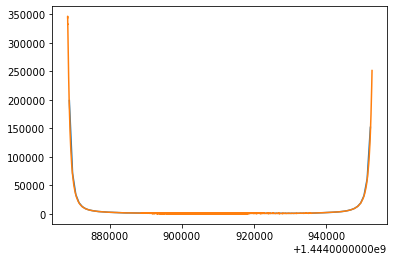

In [61]:
bintime = 10*60 #secs
i=1
# initialsec = timeslice[0]
# maxtime = timeslice[-1]
maxtime = times[-1]
initialsec = times[0]
multiples = int(round((maxtime-initialsec)/bintime))
print(multiples)
lenindex = len(times)
indexblock = int(round(lenindex/multiples))
print(type(indexblock))
binned_omega = []
binned_times = []
for i in np.arange(multiples):
    if i==0:
        avgomega = np.average(omega_e[0:((i+1)*indexblock)])
        avgtime = np.average(times[0:(i+1)*indexblock])
    else:
        avgomega = np.average(omega_e[i*indexblock:(i+1)*indexblock])
        avgtime = np.average(times[i*indexblock:(i+1)*indexblock])
    binned_omega.append(avgomega)
    binned_times.append(avgtime)
    
plt.figure()
plt.plot(binned_times,binned_omega)
plt.plot(times,omega_e)

In [62]:
# times in omega array that overlap with times in psd:
timeslice = []
omegaslice = []
for i in np.arange(len(binned_times)):
    tdiffi = binned_times[i]-data[0][0]
    tdifff = binned_times[i]-data[0][-1]
    if tdiffi >=0 and tdifff<=0:
        timeslice.append(binned_times[i])
        omegaslice.append(binned_omega[i])
        
print(len(timeslice))

def averagetime(time1, time2, data2, starttime1, endtime1):
    #time1 = data
    #time2 = omega_e
    
    time2slice = []
    data2slice = []
    for i in np.arange(len(time2)):
        tdiffi = time2[i]-starttime1
        tdifff = time2[i]-endtime1
        if tdiffi >=0 and tdifff<=0:
            time2slice.append(time2[i])
            data2slice.append(data2[i])
    avgdata2 = np.average(data2slice)
    avgtime2 = np.average(time2slice)
    return avgdata2, avgtime2

93


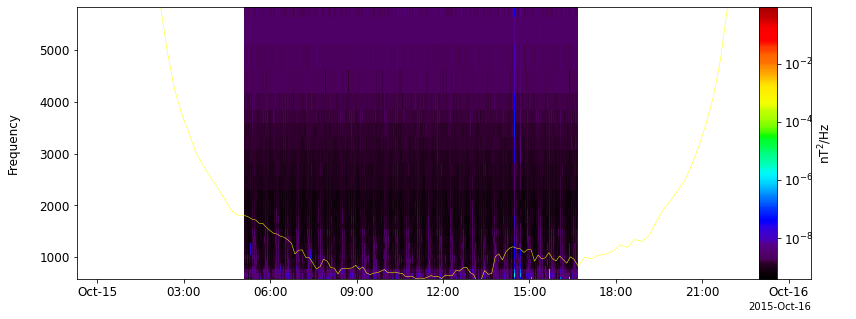

In [64]:
store_data('fcenans', data={'y': omega_e_nans, 'x': dataBfield[0]})
store_data('fce', data={'y': omega_e, 'x': times})


from pytplot import store_data
store_data('fcenans', data={'y': omega_e_nans, 'x': dataBfield[0]})
store_data('fceBinned', data={'y': binned_omega, 'x': binned_times})

store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fceBinned'])
options('psdwithfce', 'ytitle', 'Frequency')
options('fceBinned', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'white'])
options('fceBinned','color','yellow')
#options('psdwithfce', 'legend_names', ['psd', 'fce'])

tplot('psdwithfce')

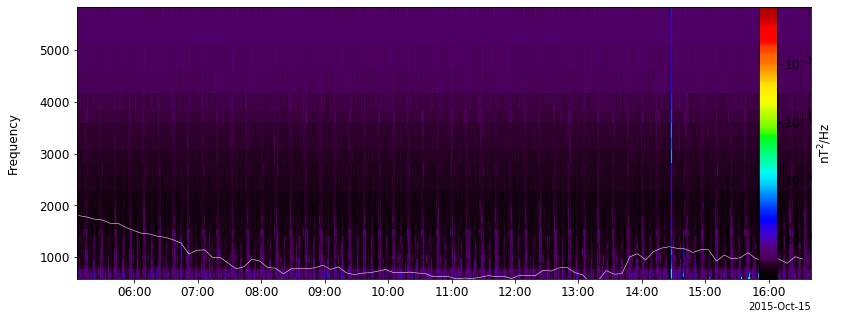

In [65]:

store_data('fceSlice', data={'y': omegaslice, 'x': timeslice})

store_data('psdwithfce', data=['mms1_dsp_bpsd_omni_fast_l2', 'fceSlice'])
options('psdwithfce', 'ytitle', 'Frequency')
options('fceSlice', 'ytitle', 'Frequency')
options('psdwithfce', 'color', ['rainbow', 'white'])
options('fceSlice','color','white')
#options('psdwithfce', 'legend_names', ['psd', 'fce'])

tplot('psdwithfce')

In [47]:
def findclosest(array1,array2,index1):
    value = array1[index1]
    diff = np.abs(array2-value)
    minimum = min(diff)
    
    index2 = np.where(diff==minimum)
    return index2

30-Apr-23 01:33:22: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151015040000_v3.3.0.cdf
30-Apr-23 01:33:22: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151015060000_v3.3.0.cdf
30-Apr-23 01:33:22: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151015080000_v3.3.0.cdf
30-Apr-23 01:33:22: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151015100000_v3.3.0.cdf
30-Apr-23 01:33:22: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151015120000_v3.3.0.cdf
30-Apr-23 01:33:22: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151015140000_v3.3.0.cdf
30-Apr-23 01:33:22: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151015160000_v3.3.0.cdf
30-Apr-23 01:33:22: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151016040000_v3.3.0.cdf
30-Apr-23 01:33:22: Loading pyda

30-Apr-23 01:33:37: mms1_dis_numberdensity_err_fast
30-Apr-23 01:33:37: mms1_dis_densityextrapolation_low_fast
30-Apr-23 01:33:37: mms1_dis_densityextrapolation_high_fast
30-Apr-23 01:33:37: mms1_dis_bulkv_dbcs_fast
30-Apr-23 01:33:37: mms1_dis_bulkv_spintone_dbcs_fast
30-Apr-23 01:33:37: mms1_dis_bulkv_gse_fast
30-Apr-23 01:33:37: mms1_dis_bulkv_spintone_gse_fast
30-Apr-23 01:33:37: mms1_dis_bulkv_err_fast
30-Apr-23 01:33:37: mms1_dis_prestensor_dbcs_fast
30-Apr-23 01:33:37: mms1_dis_prestensor_gse_fast
30-Apr-23 01:33:37: mms1_dis_prestensor_err_fast
30-Apr-23 01:33:37: mms1_dis_pres_bg_fast
30-Apr-23 01:33:37: mms1_dis_temptensor_dbcs_fast
30-Apr-23 01:33:37: mms1_dis_temptensor_gse_fast
30-Apr-23 01:33:37: mms1_dis_temptensor_err_fast
30-Apr-23 01:33:37: mms1_dis_heatq_dbcs_fast
30-Apr-23 01:33:37: mms1_dis_heatq_gse_fast
30-Apr-23 01:33:37: mms1_dis_heatq_err_fast
30-Apr-23 01:33:37: mms1_dis_energy_fast
30-Apr-23 01:33:37: mms1_dis_energy_delta_fast
30-Apr-23 01:33:37: mms1_dis_t

25982
0.09592691 105.97049


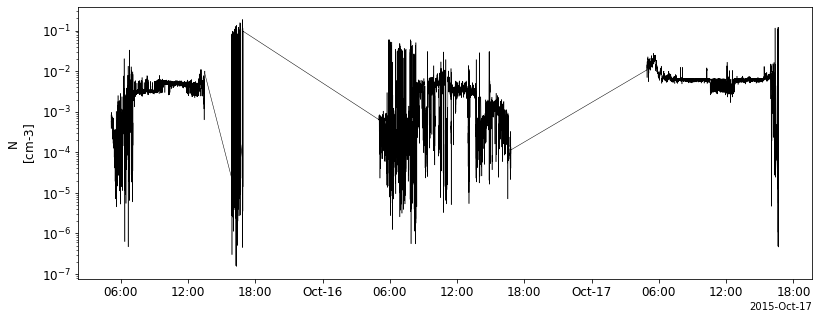

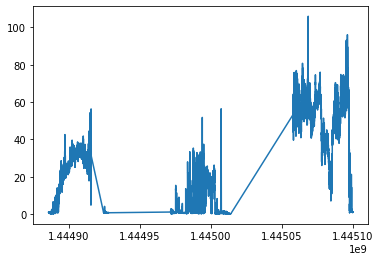

In [78]:
pyspedas.mms.fpi(center_measurement=True, 
                 datatype=['dis-moms', 'des-moms'], 
                 trange=['2015-10-15', '2015-10-18'], 
                 probe=1)
edensitydata = get_data('mms1_des_numberdensity_fast')
edensity = edensitydata.y

idensitydata = get_data('mms1_dis_numberdensity_fast')
idensity = idensitydata.y
print(len(edensity))
print(min(edensity),max(edensity))

tplot(['mms1_dis_densityextrapolation_high_fast']) 
plt.figure()
plt.plot(edensitydata.times,edensitydata.y)

densitythresh = 10 #cm^-3

(7386,)
0.13304783 56.328873


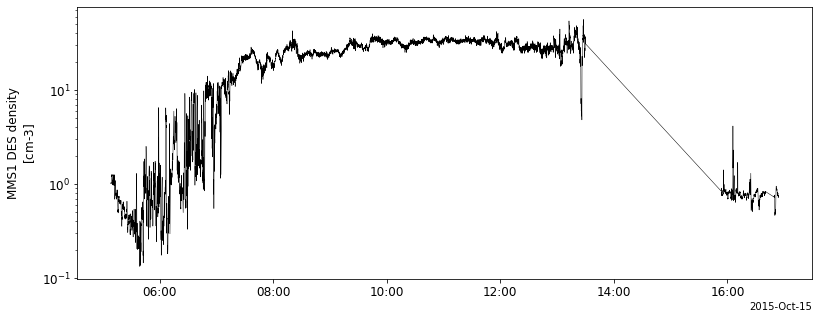

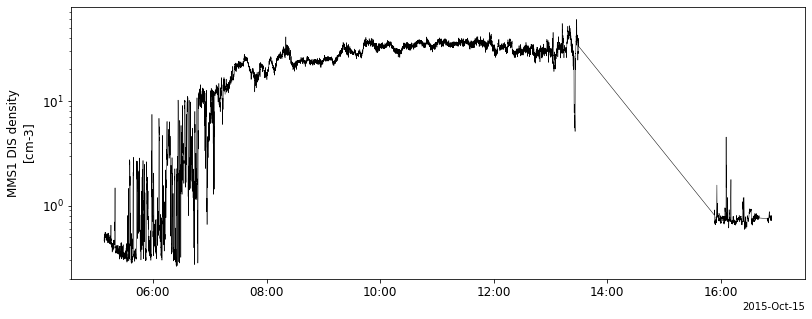

71
<class 'int'>
(array([15], dtype=int64),)
2015-10-15 07:09:09.926603


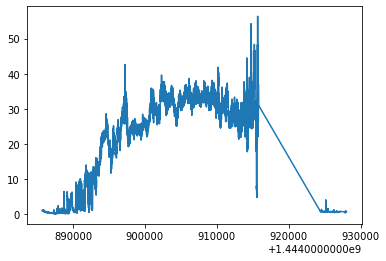

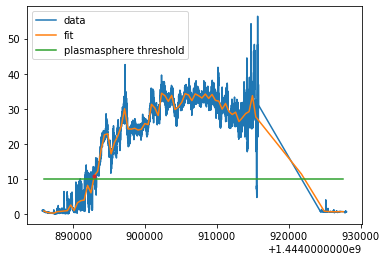

In [71]:
print(np.shape(edensity))
print(min(edensity),max(edensity))

tplot(['mms1_des_numberdensity_fast']) 
tplot(['mms1_dis_numberdensity_fast']) 
plt.figure()
plt.plot(edensitydata.times,edensitydata.y)
densitythresh = 10 #cm^-3
################################################### smooth density curve
bintime = 10*60 #secs
i=1
# initialsec = timeslice[0]
# maxtime = timeslice[-1]
edentimes = edensitydata.times
maxtime = edentimes[-1]
initialsec = edentimes[0]
multiples = int(round((maxtime-initialsec)/bintime))
print(multiples)
lenindex = len(edentimes)
indexblock = int(round(lenindex/multiples))
print(type(indexblock))
binned_eden = []
binned_edentimes = []
for i in np.arange(multiples):
    if i==0:
        avgeden = np.average(edensity[0:((i+1)*indexblock)])
        avgtimeeden = np.average(edentimes[0:(i+1)*indexblock])
    else:
        avgeden = np.average(edensity[i*indexblock:(i+1)*indexblock])
        avgtimeeden = np.average(edentimes[i*indexblock:(i+1)*indexblock])
    binned_eden.append(avgeden)
    binned_edentimes.append(avgtimeeden)
    
plt.figure()
plt.plot(edentimes,edensity)
plt.plot(binned_edentimes,binned_eden)
plt.plot(binned_edentimes,np.zeros(len(binned_edentimes))+densitythresh,'-')
plt.legend(['data','fit','plasmasphere threshold'])

binned_eden =np.array(binned_eden)
thresharray = [densitythresh]
identhresh = findclosest(thresharray,binned_eden,0)
print(identhresh)
print(time_string(binned_edentimes[identhresh[0][0]]))
plt.plot(binned_edentimes[identhresh[0][0]],binned_eden[identhresh[0][0]],'.')
dendiff = binned_eden-densitythresh

Starting...


30-Apr-23 01:09:13: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
30-Apr-23 01:09:13: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


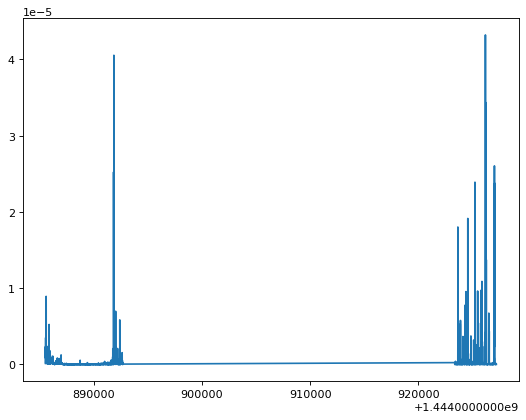

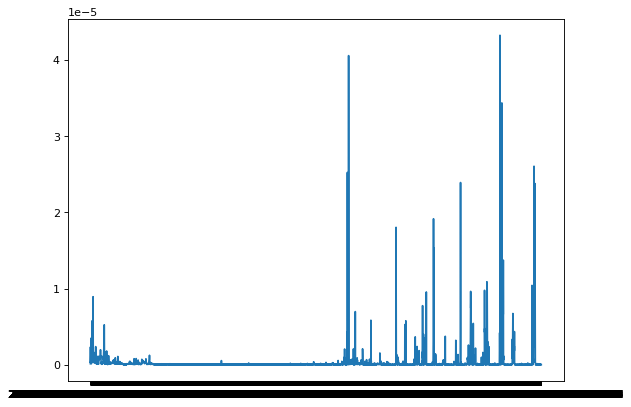

In [73]:
#data: [0,:] - x axis values - time
#[1,:] - power value (color bar)
#[2,:] - y axis values - frequency (Hz)


power_column_avged_array = []
powerarray = []
kepttimes=[]
for i in np.arange(len(data[0])):
    denti  = findclosest(data[0],binned_edentimes,i)
    dentii = denti[0][0]
    if dendiff[dentii]<=0:
        kepttimes.append(data[0][i])
        
        avg_omega_index = findclosest(data[0],timeslice,i)
        #print(avg_omega_index[0][0])
        avg_omega_e = omegaslice[avg_omega_index[0][0]]
        #print(avg_omega_e)
        powerarray = []
        for j in np.arange(len(data[2])):
            if data[2][j] > .1*avg_omega_e and data[2][j] <1*avg_omega_e:
                #print('averaging: '+str(data.times[i])+' at '+str(data[2][j]))
                power = data[1][i][j]
                powerarray.append(power)
            powerarray2 = np.array(powerarray)
        power_column_avged = np.mean(powerarray2)
            
        power_column_avged_array.append(power_column_avged)
        #print('for i: '+str(i)+' avg psd: '+str(power_column_avged))
        if i == 0:
            print('Starting...')
        elif i==np.round(len(data[0])/4):
            print('Quarter way...')
        elif i==np.round(len(data[0])/2):
            print('Half way...')
        elif i==np.round(3*len(data[0])/4):
            print('3/4 done.......')
        elif i == np.round(len(data[0]-1)):
            print('Finished')

powertimes = data.times
powertimes = time_string(data.times)
power_column_avged_array = np.array(power_column_avged_array)

plt.figure(figsize=(8, 6), dpi=80)

#plt.plot(powertimes,power_column_avged_array)
plt.plot(kepttimes,power_column_avged_array)

# plt.figure(figsize=(8, 6), dpi=80)

# #plt.plot(powertimes,power_column_avged_array)
# plt.plot(time_string(kepttimes),power_column_avged_array)


In [199]:
print(np.shape(power_column_avged_array))
print(power_column_avged_array[10000:10010])

(20843,)
[1.7979511e-07 5.0151189e-06 4.6240372e-04 1.2912649e-04 1.0731602e-06
 1.3186115e-05 7.4246714e-06 1.2463291e-05 1.4651760e-04 1.8758847e-05]


2015-10-15 08:20:00.000000


30-Apr-23 01:23:08: Loading pydata\mms1\mec\srvy\l2\epht89q\2015\10\mms1_mec_srvy_l2_epht89q_20151015_v2.0.0.cdf
30-Apr-23 01:23:08: Loading pydata\mms1\mec\srvy\l2\epht89q\2015\10\mms1_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf
30-Apr-23 01:23:08: Downloading mms1_mec_srvy_l2_epht89q_20151017_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\10
30-Apr-23 01:23:09: Downloading mms1_mec_srvy_l2_epht89q_20151018_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\10
30-Apr-23 01:23:09: Downloading mms1_mec_srvy_l2_epht89q_20151019_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\10
30-Apr-23 01:23:10: Downloading mms1_mec_srvy_l2_epht89q_20151020_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\10
30-Apr-23 01:23:10: Downloading mms1_mec_srvy_l2_epht89q_20151021_v2.0.0.cdf to pydata\mms1\mec\srvy\l2\epht89q\2015\10
30-Apr-23 01:23:10: Loading pydata\mms2\mec\srvy\l2\epht89q\2015\10\mms2_mec_srvy_l2_epht89q_20151015_v2.0.0.cdf
30-Apr-23 01:23:10: Loading pydata\mms2\mec\srvy\l2\epht89q\2

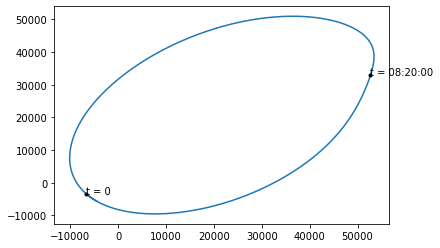

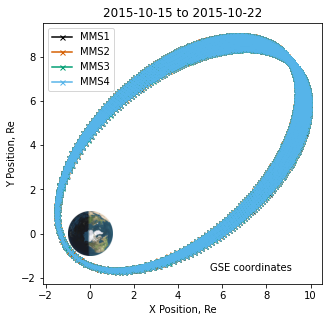

In [75]:

from pyspedas import time_string


plt.figure()
plt.plot(posx,posy)
plt.plot(posx[0],posy[0],'k.')
plt.text(posx[0],posy[0],'t = 0')
plt.plot(posx[1000],posy[1000],'k.')
print(time_string(postime[1000]))
plt.text(posx[1000],posy[1000],'t = '+str(time_string(postime[1000]))[-15:-7])


from pyspedas.mms.mms_orbit_plot import mms_orbit_plot

mms_orbit_plot(trange=['2015-10-15', '2015-10-22'])

In [37]:
import pickle


# Write the dictionary with inversion data to a pickle file
with open( 'data' + '.pickle', 'wb') as handle:
    pickle.dump([posx,posy], handle,
                protocol=pickle.HIGHEST_PROTOCOL)
    
with open('data.pickle', 'rb') as handle:
            dataaa,dataaaa = pickle.load(handle)
        
print(dataaa[0:10])
print(posx[0:10])


[-6732.110431712925, -6553.570426956698, -6370.164717247793, -6181.97210414512, -5989.086231917524, -5791.613124255345, -5589.6743238692, -5383.403924042368, -5172.949018629032, -4958.467704304909]
[-6732.110431712925, -6553.570426956698, -6370.164717247793, -6181.97210414512, -5989.086231917524, -5791.613124255345, -5589.6743238692, -5383.403924042368, -5172.949018629032, -4958.467704304909]
